# Search: Solving a Maze Using a Goal-based Agent

Student Name: Prashant Iyer

I have used the following AI tools: Minimal reference to Bard

I understand that my submission needs to be my own work: PI

## Instructions

Total Points: Undergrads 100 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.


## Introduction

The agent has a map of the maze it is in and the environment is assumed to be **deterministic, discrete, and known.** The agent must use the map to plan a path through the maze from the starting location $S$ to the goal location $G$.  This is a planing exercise for a goal-based agent, so you do not need to implement an environment, just use the map to search for a path. Once the plan is made, the agent in a deterministic environment (i.e., the transition function is deterministic with the outcome of each state/action pair fixed and no randomness) can just follow the path and does not need to care about the percepts.
This is also called an **[open-loop system](https://en.wikipedia.org/wiki/Open-loop_controller).**
The execution phase is trivial and we do not implement it in this exercise.

Tree search algorithm implementations that you find online and used in general algorithms courses have often a different aim. These algorithms assume that you already have a tree in memory. We are interested in dynamically creating a search tree with the aim of finding a good/the best path from the root noteto the goal state. Follow the pseudo code presented in the text book (and replicated in the slides) closely. Ideally, we would like to search only a small part of the maze, i.e., create a search tree with as few nodes as possible.

Several mazes for this exercise are stored as text files. Here is the small example maze:

In [85]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
%cd /content/drive/MyDrive/Colab\ Notebooks

/content/drive/MyDrive/Colab Notebooks


In [87]:
!pwd

/content/drive/MyDrive/Colab Notebooks


In [88]:
with open("small_maze.txt", "r") as f:
    maze_str = f.read()
print(maze_str)

XXXXXXXXXXXXXXXXXXXXXX
X XX        X X      X
X    XXXXXX X XXXXXX X
XXXXXX     S  X      X
X    X XXXXXX XX XXXXX
X XXXX X         X   X
X        XXX XXX   X X
XXXXXXXXXX    XXXXXX X
XG         XX        X
XXXXXXXXXXXXXXXXXXXXXX



__Note:__ The mazes above contains cycles and therefore the state space may not form proper trees unless cycles are prevented. Therfore, you will need to deal with cycle detection in your code.

## Parsing and pretty printing the maze

The maze can also be displayed in color using code in the module [maze_helper.py](maze_helper.py). The code parses the string representing the maze and converts it into a `numpy` 2d array which you can use in your implementation. Position are represented as a 2-tuple of the form `(row, col)`.

In [89]:
import maze_helper as mh

maze = mh.parse_maze(maze_str)

# look at a position in the maze by subsetting the 2d array
print("Position(0,0):", maze[0, 0])

# there is also a helper function called `look(maze, pos)` available
# which uses a 2-tuple for the position.
print("Position(8,1):", mh.look(maze, (8, 1)))

Position(0,0): X
Position(8,1): G


A helper function to visualize the maze is also available.

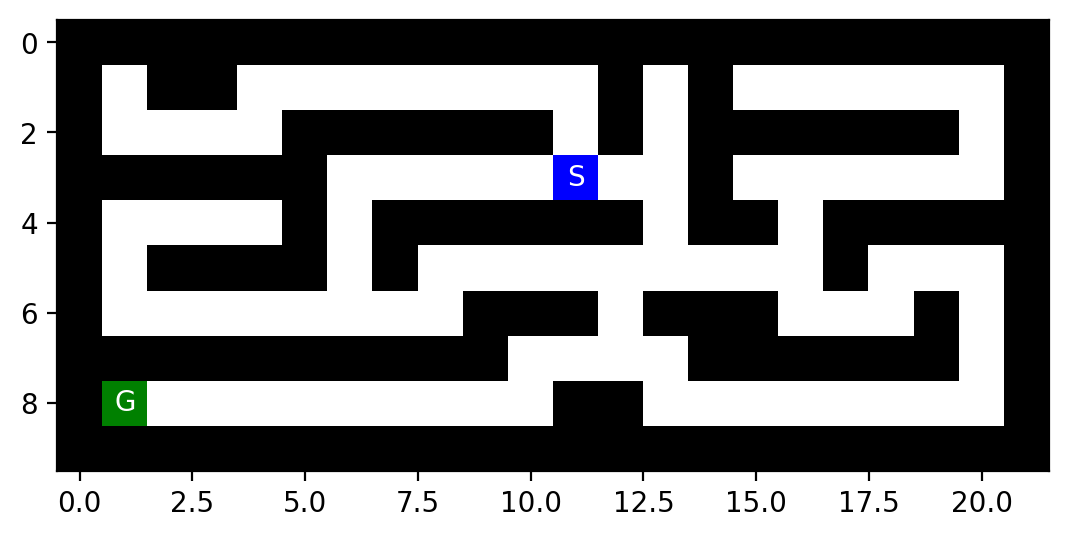

In [90]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# use higher resolution images in notebook

mh.show_maze(maze)

Find the position of the start and the goal using the helper function `find_pos()`

In [91]:
print("Start location:", mh.find_pos(maze, what = "S"))
print("Goal location:", mh.find_pos(maze, what = "G"))

Start location: (3, 11)
Goal location: (8, 1)


Helper function documentation.

In [92]:
help(mh)

Help on module maze_helper:

NAME
    maze_helper

DESCRIPTION
    Code for the Maze Assignment by Michael Hahsler
    Usage: 
        import maze_helper as mh
        mh.show_some_mazes()

FUNCTIONS
    find_all_pos(maze, what='S')
        Find all occurrences of a specific character in a maze.
        
        Parameters:
        maze: a 2D array with characters representing the maze.
        what: the character to be found.
        
        Returns:
        a list of tuples (x, y) for all found positions.
    
    find_pos(maze, what='S')
        Find start/goal in a maze and returns the first one. 
        Caution: there is no error checking!
        
        Parameters:
        maze: a array with characters prodced by parse_maze()
        what: the letter to be found ('S' for start and 'G' for goal)
        
        Returns:
        a tupple (x, y) for the found position.
    
    look(maze, pos)
        Look at the label of a square with the position as an array of the form (x, y

## Tree structure

Here is an implementation of the basic node structure for the search algorithms (see Fig 3.7 on page 73). I have added a method that extracts the path from the root node to the current node. It can be used to get the path when the search is completed.

In [93]:
class Node:
    def __init__(self, pos, parent, action, cost):
        self.pos = tuple(pos)    # the state; positions are (row,col)
        self.parent = parent     # reference to parent node. None means root node.
        self.action = action     # action used in the transition function (root node has None)
        self.cost = cost         # for uniform cost this is the depth. It is also g(n) for A* search


    def estimated_cost_distance(self, goal):
      #return the manhatten distance heuristic between the node position and goal
      if goal is not None:
        self.estimated_cost = abs(self.pos[0] - goal[0]) + abs(self.pos[1] - goal[1])
        return self.estimated_cost
      else:
        return None

    def __lt__(self, other):
      return self.cost < other.cost

    def __str__(self):
        return f"Node - pos = {self.pos}; action = {self.action}; cost = {self.cost}"

    def get_path_from_root(self):
        """returns nodes on the path from the root to the current node."""
        node = self
        path = [node]

        while not node.parent is None:
            node = node.parent
            path.append(node)

        path.reverse()

        return(path)

If needed, then you can add more fields to the class like the heuristic value $h(n)$ or $f(n)$.

Examples for how to create and use a tree and information on memory management can be found [here](../HOWTOs/trees.ipynb).

# Tasks

The goal is to:

1. Implement the following search algorithms for solving different mazes:

    - Breadth-first search (BFS)
    - Depth-first search (DFS)
    - Greedy best-first search (GBFS)
    - A* search

2. Run each of the above algorithms on the
    - [small maze](small_maze.txt),
    - [medium maze](medium_maze.txt),
    - [large maze](large_maze.txt),
    - [open maze](open_maze.txt),
    - [wall maze](wall_maze.txt),
    - [loops maze](loops_maze.txt),
    - [empty maze](empty_maze.txt), and
    - [empty 2_maze](empty_2_maze.txt).
    
3. For each problem instance and each search algorithm, report the following in a table:

    - The solution and its path cost
    - Total number of nodes expanded
    - Maximum tree depth
    - Maximum size of the frontier

4. Display each solution by marking every maze square (or state) visited and the squares on the final path.

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Defining the search problem and determining the problem size [10 Points]

Define the components of the search problem:

* Initial state
* Actions
* Transition model
* Goal state
* Path cost

Use verbal descriptions, variables and equations as appropriate.

*Note:* You can swich the next block from code to Markdown and use formating.

Initial State: The starting postion of the search Algorithm. For a maze, the initial state is generally the start state (In this case, denoted by 'S')

Actions: the possible set of actions. In this case, {North, South, East, West}

Transition Models: It can be defined as the posible action from a state and the possible resultant state after executing the given set of actions.

Goal State: The Final state that the search algorithm is trying to reach. It is represented by 'G' in this case.

Path Cost: It is the cost involved from a one state to another. Generally, it is measured as the cost needed to reach the Goal state from the start state in the mazes.


In [ ]:
# Your answer goes here

Give some estimates for the problem size:

* $n$: state space size
* $d$: depth of the optimal solution
* $m$: maximum depth of tree
* $b$: maximum branching factor

Describe how you would determin these values for a given maze.

n: This denotes the expansion size of the nodes in the search tree.

d: The cost path (depth) for the optimal path from start to Goal state.

m: The maximum possible or worst case cost (depth) for any path from the start to goal state.

b: the maxium number of children for any given node. In this case, as a maximum of 4 actions are possible, the max branching factor can be 4.

In [ ]:
# Your answer goes here

## Task 2: Uninformed search: Breadth-first and depth-first [40 Points]

Implement these search strategies. Follow the pseudocode in the textbook/slides. You can use the tree structure shown above to extract the final path from your solution.

__Notes:__
* You can find maze solving implementations online that use the map to store information. While this is an effective idea for this two-dimensional navigation problem, it typically cannot be used for other search problems. Therefore, follow the textbook and only store information in the tree created during search, and use the `reached` and `frontier` data structures.
* DSF can be implemented using the BFS tree search algorithm and simply changing the order in which the frontier is expanded (this is equivalent to best-first search with path length as the criterion to expand the next node). However, to take advantage of the significantly smaller memory footprint of DFS, you need to implement DFS in a different way without a `reached` data structure and by releasing the memory for nodes that are not needed anymore.
* If DFS does not use a `reached` data structure, then its cycle checking abilities are limited. Remember, that DSF is incomplete if cycles cannot be prevented. You will see in your experiments that open spaces are a problem.

In [94]:
import pandas as pd
import warnings

df_stats = pd.DataFrame(columns=['Algorithm', 'Maze', 'Size', 'Optimal_Depth', 'Max_Depth', 'Max_Branching_Factor','Frontier_Size','Max_Nodes_in_Memory']) # Store all the stats to a data frame for comparison
warnings.filterwarnings("ignore", category=FutureWarning)

In [95]:
#Common functions for all the searches

def reached_goal(pos,goal):
    return pos == goal

def walls(pos, maze):
    return maze[pos[0]][pos[1]] == 'X'

def valid_moves(pos, maze):
    actions = {
        "South": (pos[0] + 1, pos[1]),
        "North": (pos[0] - 1, pos[1]),
        "West": (pos[0], pos[1] + 1),
        "East": (pos[0], pos[1] - 1),
    }
    valid_moves = {}
    for direction, new_pos in actions.items():
        if 0 <= new_pos[0] < len(maze) and 0 <= new_pos[1] < len(maze[0]):
          if not walls(new_pos, maze): #and not walls(new_pos, maze):
            valid_moves[new_pos] = direction
    return valid_moves

In [96]:
#BFS
def breadth_first_search(maze, root, goal,debug = False):
    frontier = []
    frontier.append(root)
    reached = {root.pos: root}
    frontier_size = 1
    max_nodes_in_memory = 1

    n = 1 #size
    d=0 #Optiml depth
    m=0 #max depth
    b = 0 #branching factor

    while frontier:
      node = frontier.pop(0)

      if reached_goal(node.pos, goal):
        d = node.cost
        return node.get_path_from_root(), n, d, m, b, frontier_size, max_nodes_in_memory

      branches = len(valid_moves(node.pos, maze))
      b = max(b, branches)

      for child_pos, direction in valid_moves(node.pos, maze).items():
        child_cost = node.cost + 1
        child = Node(child_pos, node, direction, child_cost)
        n +=1
        if child_pos not in reached:
          frontier.append(child)
          reached[child_pos] = child
          m = max(m, child_cost)
          frontier_size += 1
          max_nodes_in_memory = max(max_nodes_in_memory, frontier_size)
          if node.pos != root.pos and node.pos != goal and child.pos != goal:
            maze[node.pos[0]][node.pos[1]] = "."
            maze[child.pos[0]][child.pos[1]] = "F"
            if debug: mh.show_maze(maze)

    print("Not Reachable!! No Path Found")
    return None

small_maze.txt


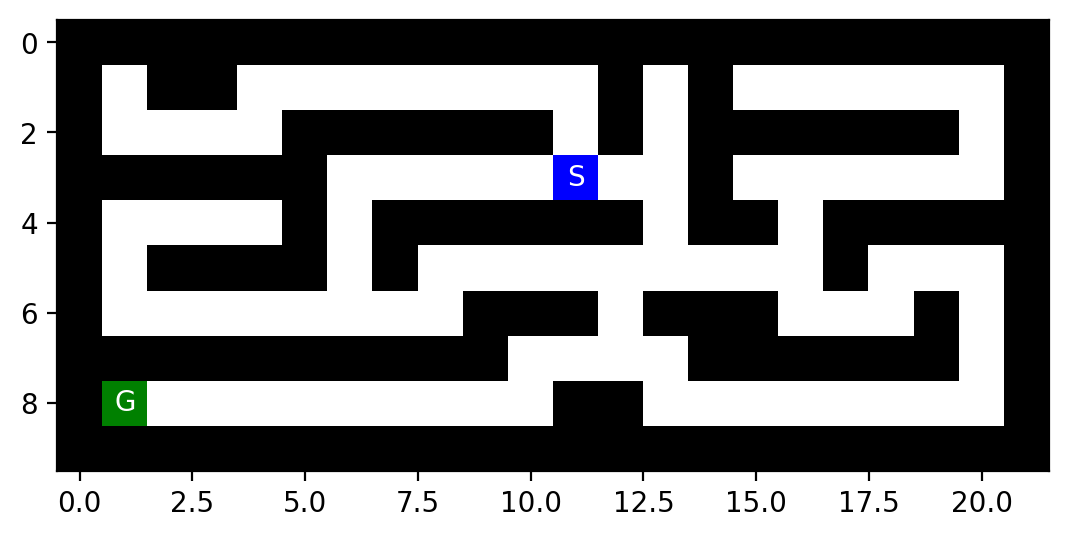

(3, 11)
(8, 1)
size: 189
optimal; depth: 19
max depth: 20
max bf: 3
Frontier Size: 94
Max Nodes in Memory 94
Path found:
Action and Updated Postion: (West, (3, 12)), (West, (3, 13)), (South, (4, 13)), (South, (5, 13)), (East, (5, 12)), (South, (6, 12)), (South, (7, 12)), (East, (7, 11)), (East, (7, 10)), (South, (8, 10)), (East, (8, 9)), (East, (8, 8)), (East, (8, 7)), (East, (8, 6)), (East, (8, 5)), (East, (8, 4)), (East, (8, 3)), (East, (8, 2)), (East, (8, 1))


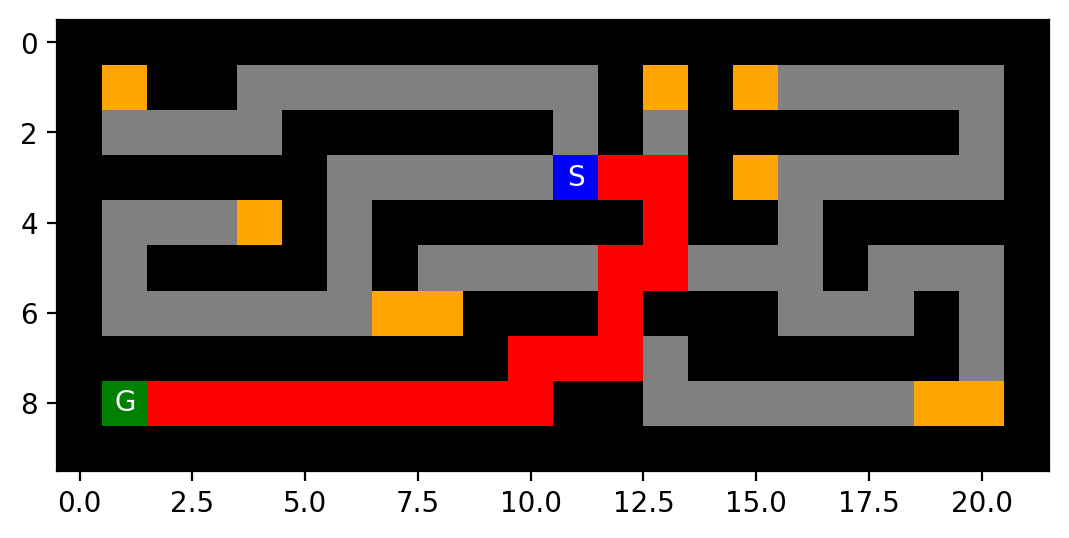

medium_maze.txt


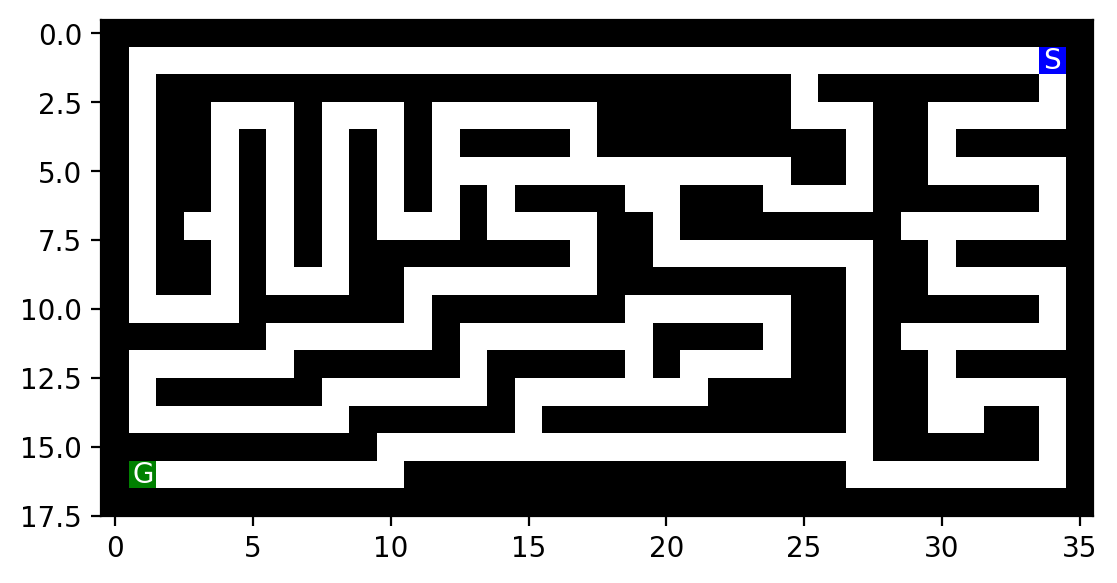

(1, 34)
(16, 1)
size: 552
optimal; depth: 68
max depth: 69
max bf: 3
Frontier Size: 272
Max Nodes in Memory 272
Path found:
Action and Updated Postion: (East, (1, 33)), (East, (1, 32)), (East, (1, 31)), (East, (1, 30)), (East, (1, 29)), (East, (1, 28)), (East, (1, 27)), (East, (1, 26)), (East, (1, 25)), (South, (2, 25)), (South, (3, 25)), (West, (3, 26)), (West, (3, 27)), (South, (4, 27)), (South, (5, 27)), (South, (6, 27)), (East, (6, 26)), (East, (6, 25)), (East, (6, 24)), (North, (5, 24)), (East, (5, 23)), (East, (5, 22)), (East, (5, 21)), (East, (5, 20)), (South, (6, 20)), (South, (7, 20)), (South, (8, 20)), (West, (8, 21)), (West, (8, 22)), (West, (8, 23)), (West, (8, 24)), (West, (8, 25)), (West, (8, 26)), (West, (8, 27)), (South, (9, 27)), (South, (10, 27)), (South, (11, 27)), (South, (12, 27)), (South, (13, 27)), (South, (14, 27)), (South, (15, 27)), (East, (15, 26)), (East, (15, 25)), (East, (15, 24)), (East, (15, 23)), (East, (15, 22)), (East, (15, 21)), (East, (15, 20)), (Ea

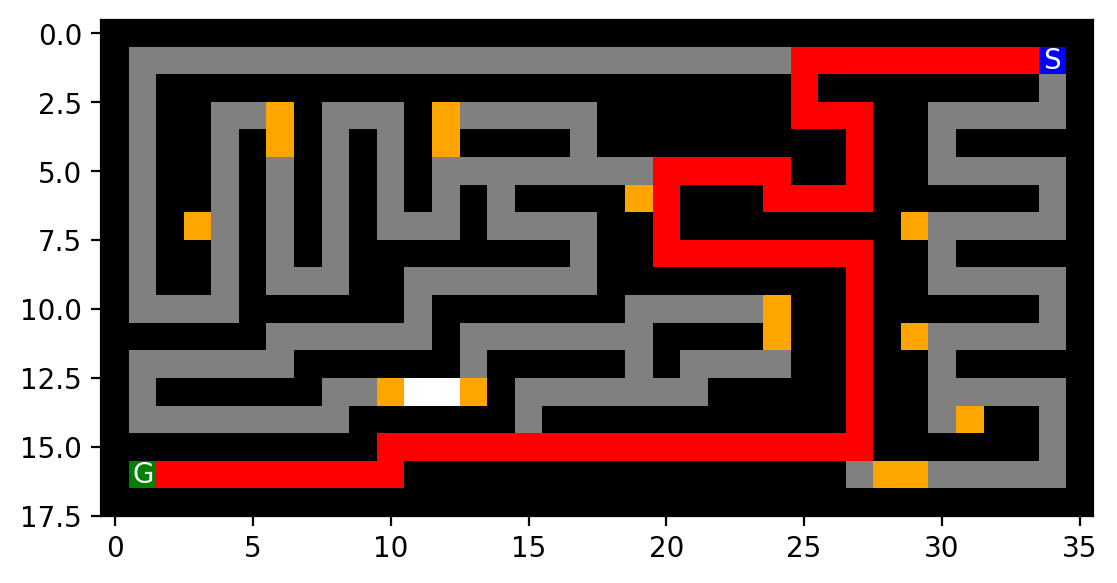

large_maze.txt


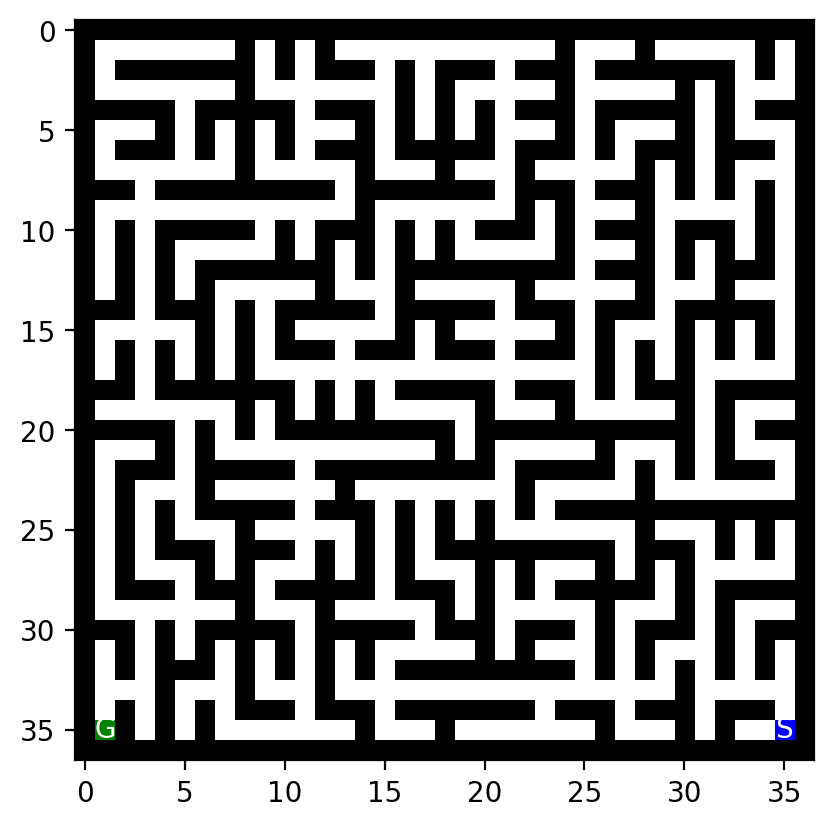

(35, 35)
(35, 1)
size: 1241
optimal; depth: 210
max depth: 210
max bf: 4
Frontier Size: 623
Max Nodes in Memory 623
Path found:
Action and Updated Postion: (North, (34, 35)), (North, (33, 35)), (East, (33, 34)), (East, (33, 33)), (East, (33, 32)), (East, (33, 31)), (North, (32, 31)), (North, (31, 31)), (East, (31, 30)), (East, (31, 29)), (South, (32, 29)), (South, (33, 29)), (East, (33, 28)), (East, (33, 27)), (East, (33, 26)), (East, (33, 25)), (East, (33, 24)), (East, (33, 23)), (East, (33, 22)), (East, (33, 21)), (East, (33, 20)), (East, (33, 19)), (East, (33, 18)), (East, (33, 17)), (East, (33, 16)), (East, (33, 15)), (North, (32, 15)), (North, (31, 15)), (West, (31, 16)), (West, (31, 17)), (North, (30, 17)), (North, (29, 17)), (East, (29, 16)), (East, (29, 15)), (North, (28, 15)), (North, (27, 15)), (North, (26, 15)), (North, (25, 15)), (North, (24, 15)), (North, (23, 15)), (West, (23, 16)), (West, (23, 17)), (West, (23, 18)), (West, (23, 19)), (West, (23, 20)), (West, (23, 21)), 

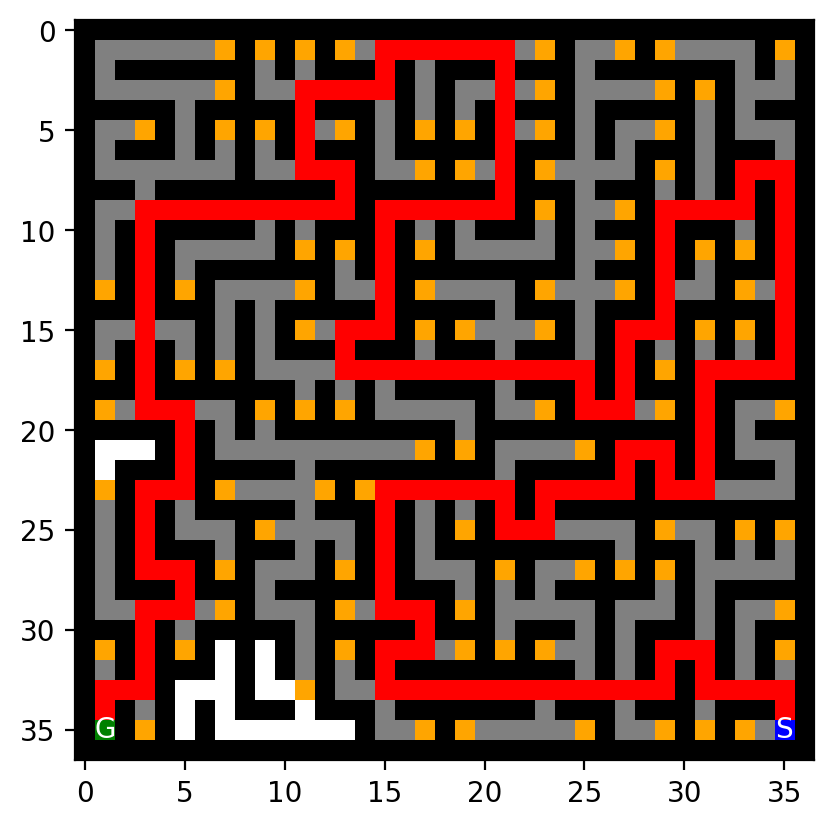

empty_maze.txt


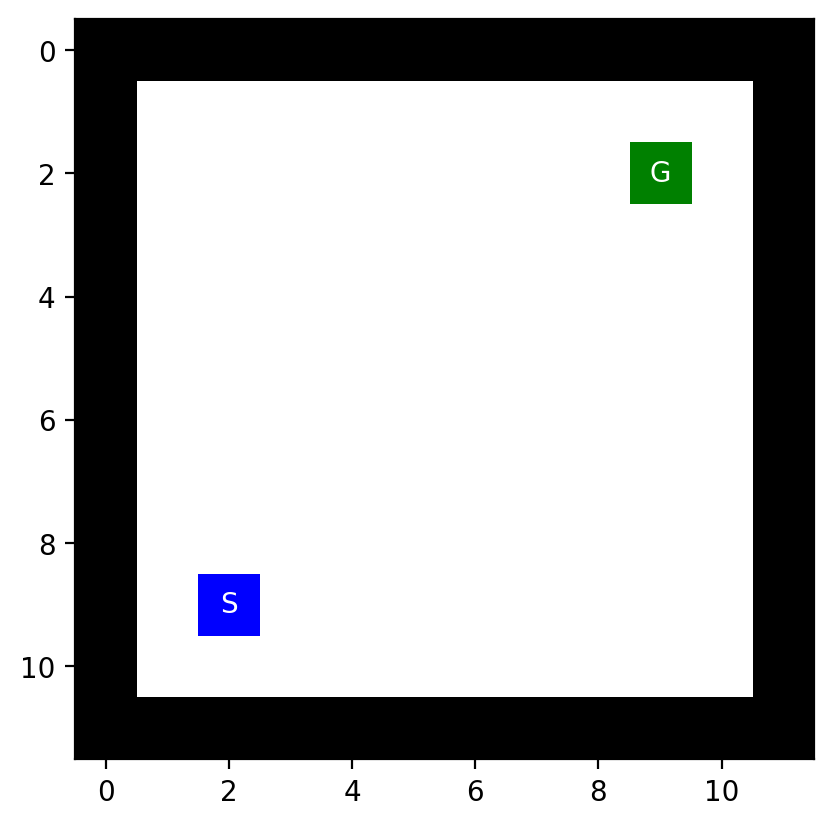

(9, 2)
(2, 9)
size: 346
optimal; depth: 14
max depth: 15
max bf: 4
Frontier Size: 98
Max Nodes in Memory 98
Path found:
Action and Updated Postion: (North, (8, 2)), (North, (7, 2)), (North, (6, 2)), (North, (5, 2)), (North, (4, 2)), (North, (3, 2)), (North, (2, 2)), (West, (2, 3)), (West, (2, 4)), (West, (2, 5)), (West, (2, 6)), (West, (2, 7)), (West, (2, 8)), (West, (2, 9))


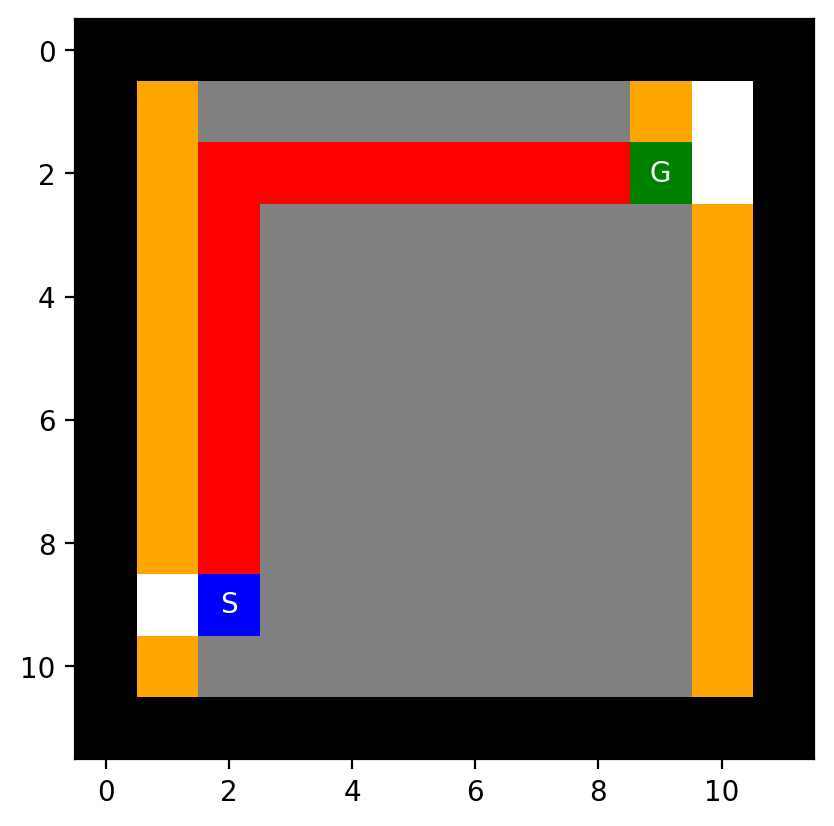

empty_2_maze.txt


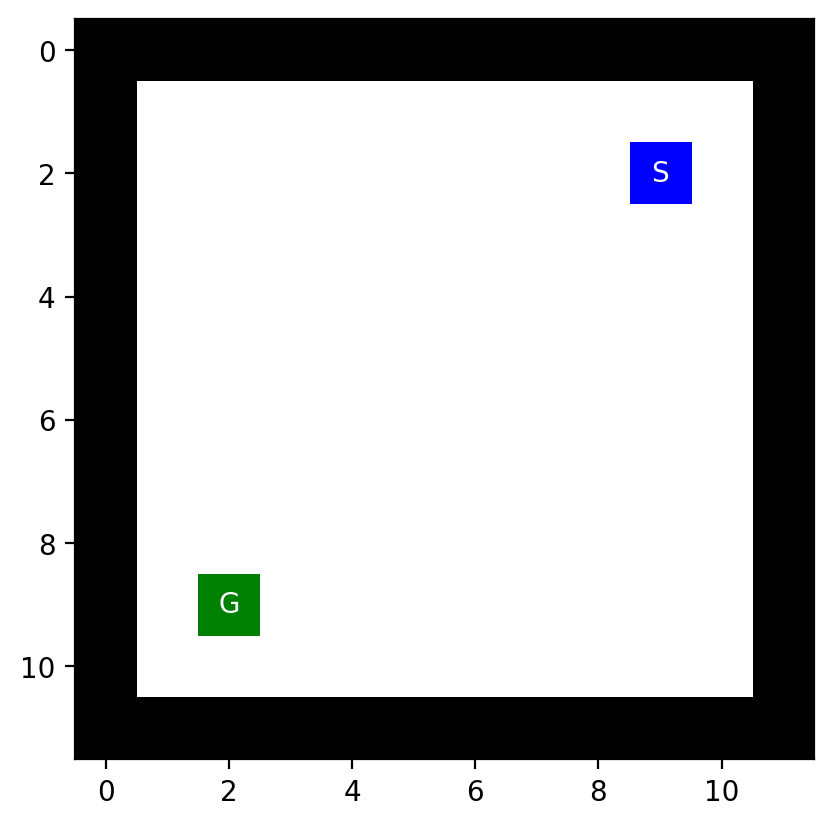

(2, 9)
(9, 2)
size: 346
optimal; depth: 14
max depth: 15
max bf: 4
Frontier Size: 98
Max Nodes in Memory 98
Path found:
Action and Updated Postion: (South, (3, 9)), (South, (4, 9)), (South, (5, 9)), (South, (6, 9)), (South, (7, 9)), (South, (8, 9)), (South, (9, 9)), (East, (9, 8)), (East, (9, 7)), (East, (9, 6)), (East, (9, 5)), (East, (9, 4)), (East, (9, 3)), (East, (9, 2))


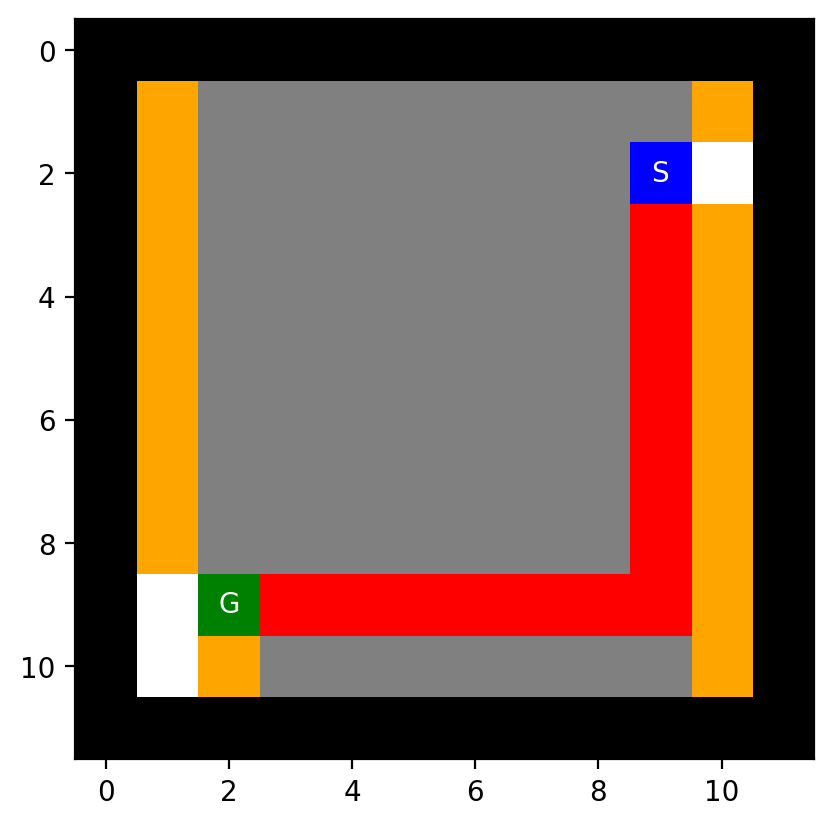

loops_maze.txt


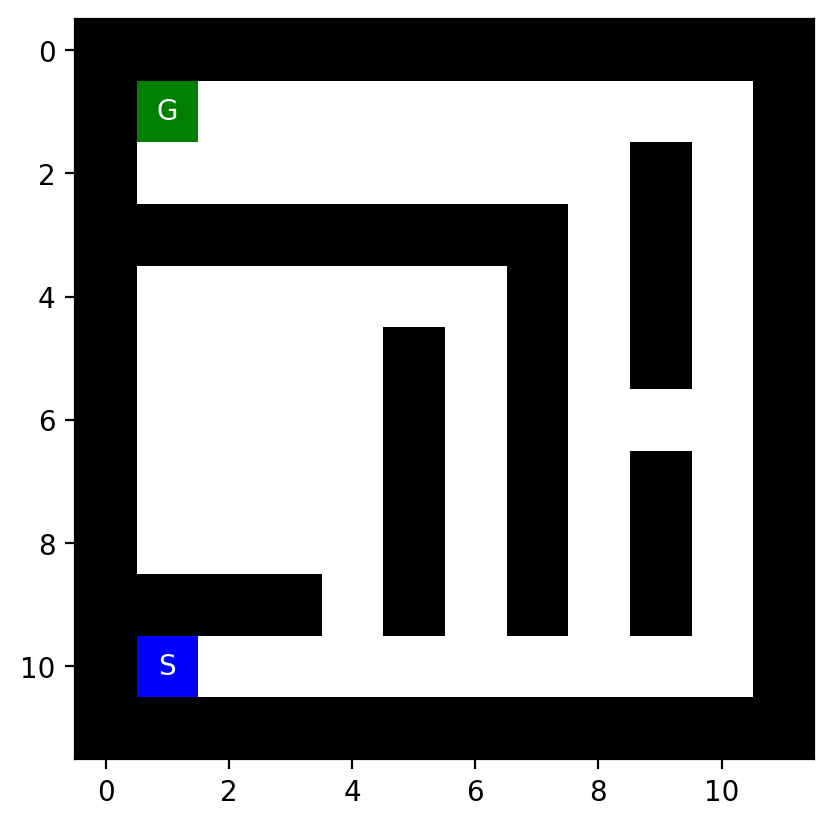

(10, 1)
(1, 1)
size: 185
optimal; depth: 23
max depth: 23
max bf: 4
Frontier Size: 72
Max Nodes in Memory 72
Path found:
Action and Updated Postion: (West, (10, 2)), (West, (10, 3)), (West, (10, 4)), (West, (10, 5)), (West, (10, 6)), (West, (10, 7)), (West, (10, 8)), (North, (9, 8)), (North, (8, 8)), (North, (7, 8)), (North, (6, 8)), (North, (5, 8)), (North, (4, 8)), (North, (3, 8)), (North, (2, 8)), (North, (1, 8)), (East, (1, 7)), (East, (1, 6)), (East, (1, 5)), (East, (1, 4)), (East, (1, 3)), (East, (1, 2)), (East, (1, 1))


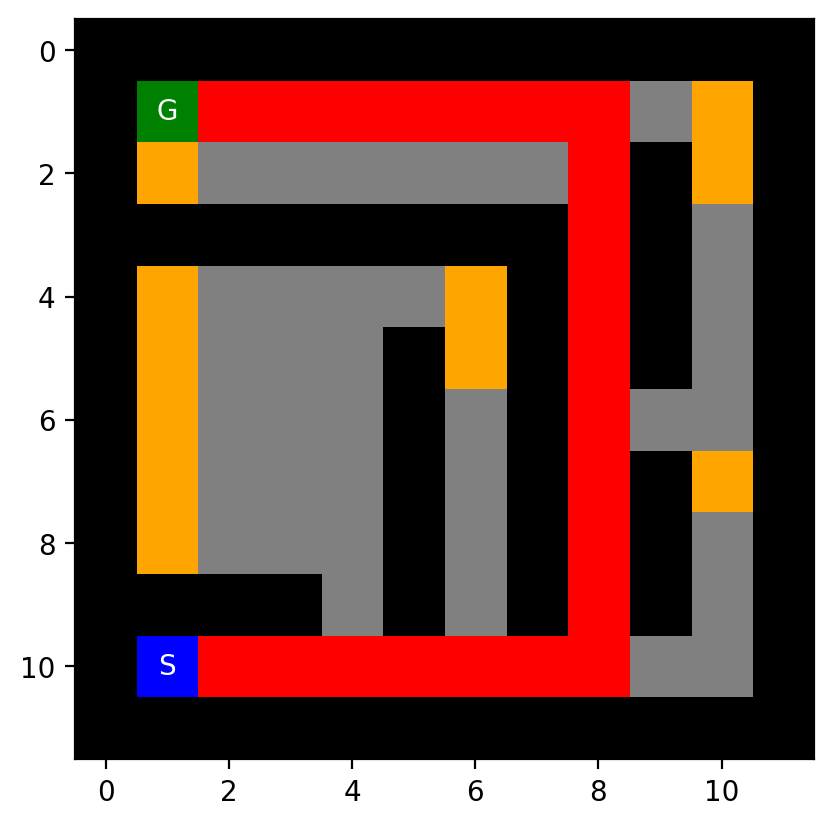

open_maze.txt


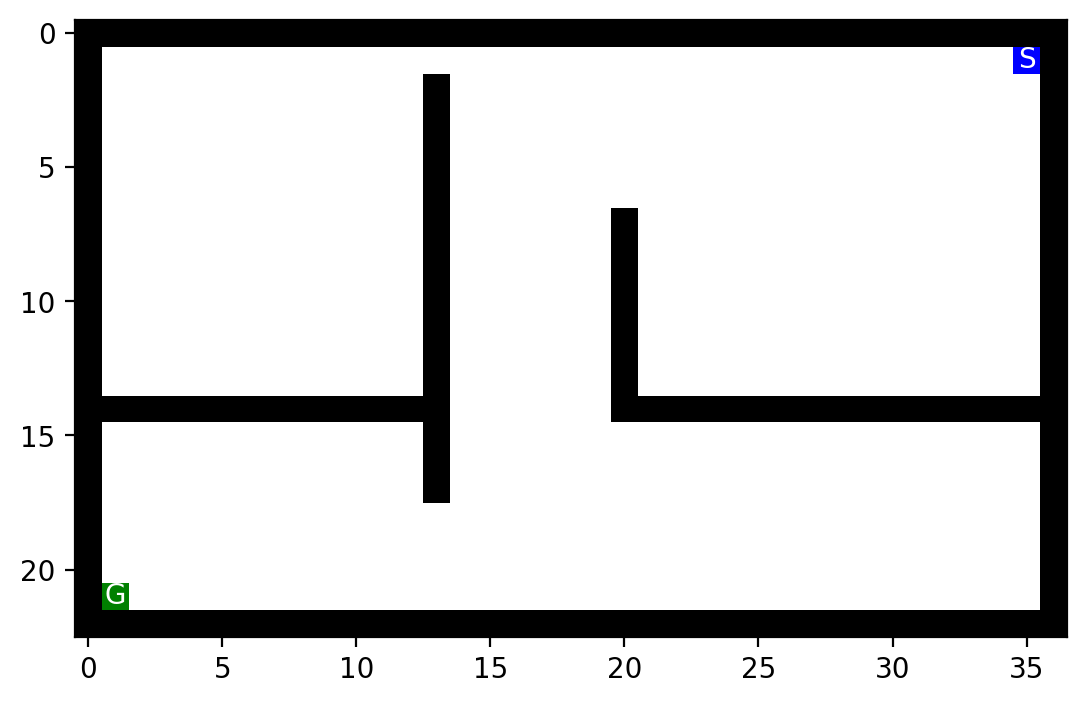

(1, 35)
(21, 1)
size: 2519
optimal; depth: 54
max depth: 54
max bf: 4
Frontier Size: 684
Max Nodes in Memory 684
Path found:
Action and Updated Postion: (South, (2, 35)), (South, (3, 35)), (South, (4, 35)), (South, (5, 35)), (South, (6, 35)), (East, (6, 34)), (East, (6, 33)), (East, (6, 32)), (East, (6, 31)), (East, (6, 30)), (East, (6, 29)), (East, (6, 28)), (East, (6, 27)), (East, (6, 26)), (East, (6, 25)), (East, (6, 24)), (East, (6, 23)), (East, (6, 22)), (East, (6, 21)), (East, (6, 20)), (East, (6, 19)), (South, (7, 19)), (South, (8, 19)), (South, (9, 19)), (South, (10, 19)), (South, (11, 19)), (South, (12, 19)), (South, (13, 19)), (South, (14, 19)), (South, (15, 19)), (South, (16, 19)), (South, (17, 19)), (South, (18, 19)), (South, (19, 19)), (South, (20, 19)), (South, (21, 19)), (East, (21, 18)), (East, (21, 17)), (East, (21, 16)), (East, (21, 15)), (East, (21, 14)), (East, (21, 13)), (East, (21, 12)), (East, (21, 11)), (East, (21, 10)), (East, (21, 9)), (East, (21, 8)), (East, 

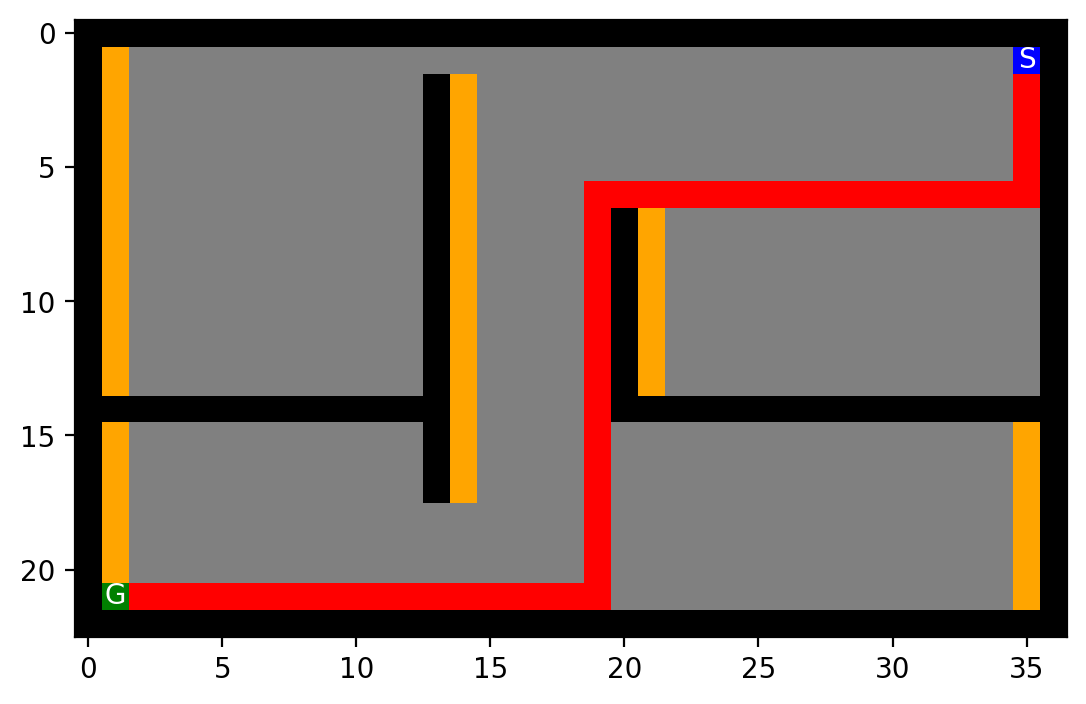

wall_maze.txt


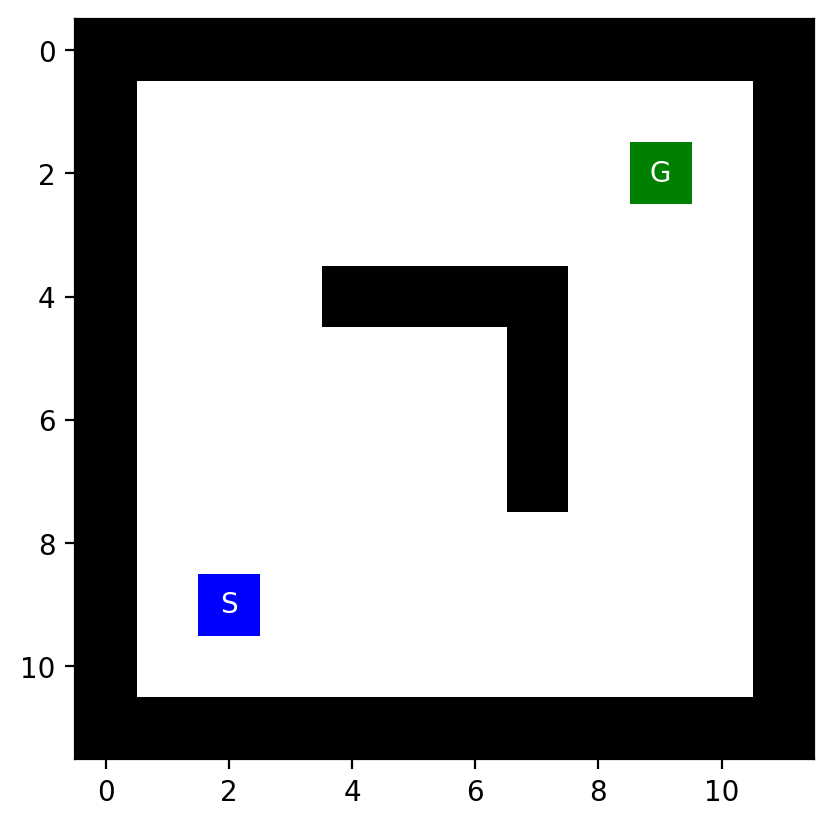

(9, 2)
(2, 9)
size: 302
optimal; depth: 14
max depth: 15
max bf: 4
Frontier Size: 91
Max Nodes in Memory 91
Path found:
Action and Updated Postion: (North, (8, 2)), (North, (7, 2)), (North, (6, 2)), (North, (5, 2)), (North, (4, 2)), (North, (3, 2)), (North, (2, 2)), (West, (2, 3)), (West, (2, 4)), (West, (2, 5)), (West, (2, 6)), (West, (2, 7)), (West, (2, 8)), (West, (2, 9))


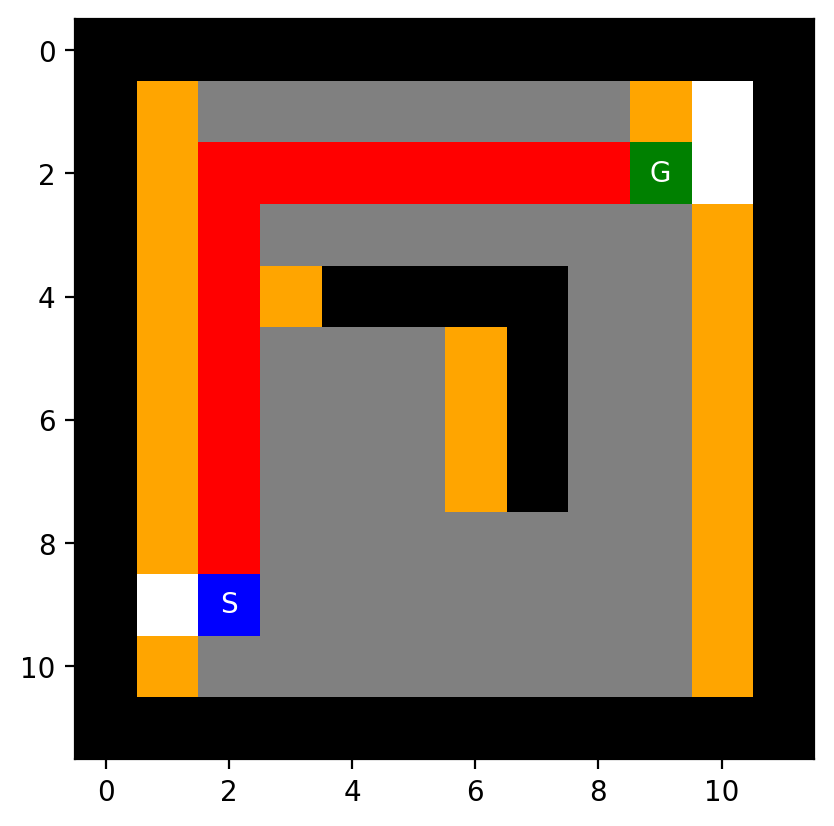

In [97]:
# Your code goes here
mazeSizes = ["small_maze.txt","medium_maze.txt","large_maze.txt","empty_maze.txt","empty_2_maze.txt","loops_maze.txt","open_maze.txt","wall_maze.txt"]
for mazes in mazeSizes:
    print(mazes)
    with open(mazes, "r") as f:
        maze_str = f.read()
    maze = mh.parse_maze(maze_str)
    mh.show_maze(maze)
    start = mh.find_pos(maze, what="S")
    goal = mh.find_pos(maze, what="G")
    print(start)
    print(goal)
    root = Node(start, None, None, 0)
    path,n, d, m, b, frontier_size, max_nodes_in_memory = breadth_first_search(maze, root, goal)
    print('size:',n)
    print('optimal; depth:',d)
    print('max depth:',m)
    print('max bf:',b)
    print('Frontier Size:', frontier_size)
    print('Max Nodes in Memory', max_nodes_in_memory)

    if path:
        df_stats = df_stats.append({'Algorithm': 'BFS',
                            'Maze': mazes,
                            'Size': n,
                            'Optimal_Depth': d,
                            'Max_Depth': m,
                            'Max_Branching_Factor': b,
                            'Frontier_Size':frontier_size,
                            'Max_Nodes_in_Memory':max_nodes_in_memory}, ignore_index=True)
        print("Path found:")
        actions_and_positions = []
        for i, node in enumerate(path):
            if i == 0:
                continue  # Skip the start node
            action = node.action
            current_position = node.pos
            actions_and_positions.append((action, current_position))
            if node.pos != start and node.pos != goal:
                maze[node.pos[0]][node.pos[1]] = "P"
        print("Action and Updated Postion:", ", ".join([f"({action}, {current_position})" for action, current_position in actions_and_positions]))
    else:
        print("No path found")
    mh.show_maze(maze)

In [98]:
#DFS
def depth_first_search(maze, root, goal, l, debug = False):
  frontier = [root]
  frontier_size = 1
  max_nodes_in_memory = 1

  n = 1
  d=0
  m=0
  b = 0

  while(frontier):
    node = frontier.pop() #Pop from end

    path = node.get_path_from_root()
    if path is not None and len(path) != len(set(path)):
      print('Cycle Detected!!')
      continue

    if reached_goal(node.pos, goal):
      d = node.cost
      return node.get_path_from_root(),n,d,m,b,frontier_size,max_nodes_in_memory

    if node.cost > l:
      return 'Break'

    branches = len(valid_moves(node.pos, maze))
    b = max(b, branches)
    for child_pos, direction in valid_moves(node.pos, maze).items():
      n +=1
      if child_pos not in (i.pos for i in path):
        child = Node(child_pos, node, direction, node.cost + 1)
        frontier.append(child)
        m = max(m, child.cost)
        frontier_size +=1
        max_nodes_in_memory = max(max_nodes_in_memory, frontier_size)
        if node.pos != root.pos and node.pos != goal and child.pos != goal:
            maze[node.pos[0]][node.pos[1]] = "."
            maze[child.pos[0]][child.pos[1]] = "F"
            if debug: mh.show_maze(maze)

  print("Not Reachable!! No Path Found")
  return None


small_maze.txt


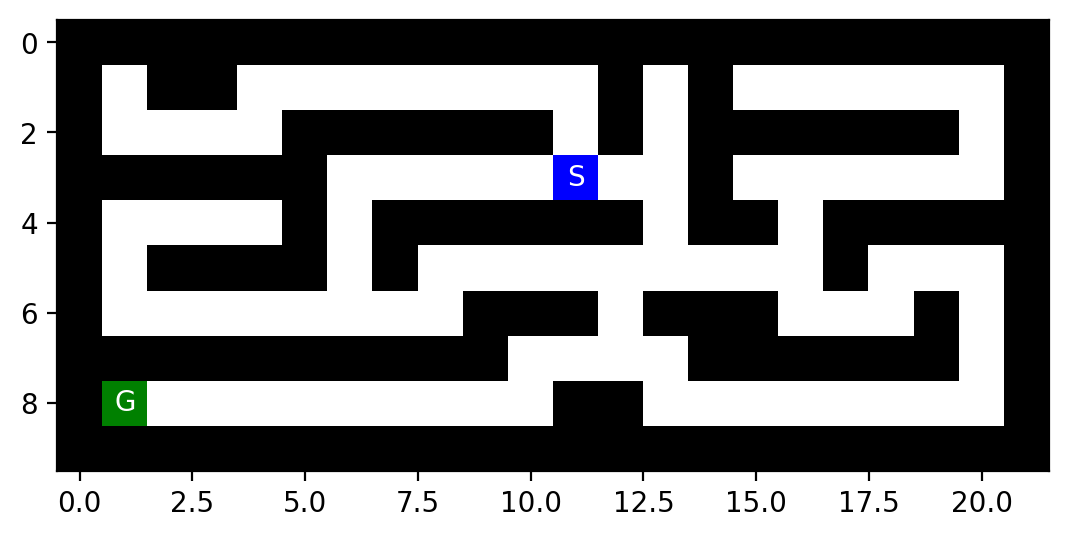

(3, 11)
(8, 1)
size: 151
optimal depth: 49
max depth: 49
max bf: 3
Frontier Size 79
Max Memory Nodes 79
Path found:
Action and Updated Postion: (East, (3, 10)), (East, (3, 9)), (East, (3, 8)), (East, (3, 7)), (East, (3, 6)), (South, (4, 6)), (South, (5, 6)), (South, (6, 6)), (West, (6, 7)), (West, (6, 8)), (North, (5, 8)), (West, (5, 9)), (West, (5, 10)), (West, (5, 11)), (West, (5, 12)), (West, (5, 13)), (West, (5, 14)), (West, (5, 15)), (West, (5, 16)), (South, (6, 16)), (West, (6, 17)), (West, (6, 18)), (North, (5, 18)), (West, (5, 19)), (West, (5, 20)), (South, (6, 20)), (South, (7, 20)), (South, (8, 20)), (East, (8, 19)), (East, (8, 18)), (East, (8, 17)), (East, (8, 16)), (East, (8, 15)), (East, (8, 14)), (East, (8, 13)), (North, (7, 13)), (East, (7, 12)), (East, (7, 11)), (East, (7, 10)), (South, (8, 10)), (East, (8, 9)), (East, (8, 8)), (East, (8, 7)), (East, (8, 6)), (East, (8, 5)), (East, (8, 4)), (East, (8, 3)), (East, (8, 2)), (East, (8, 1))


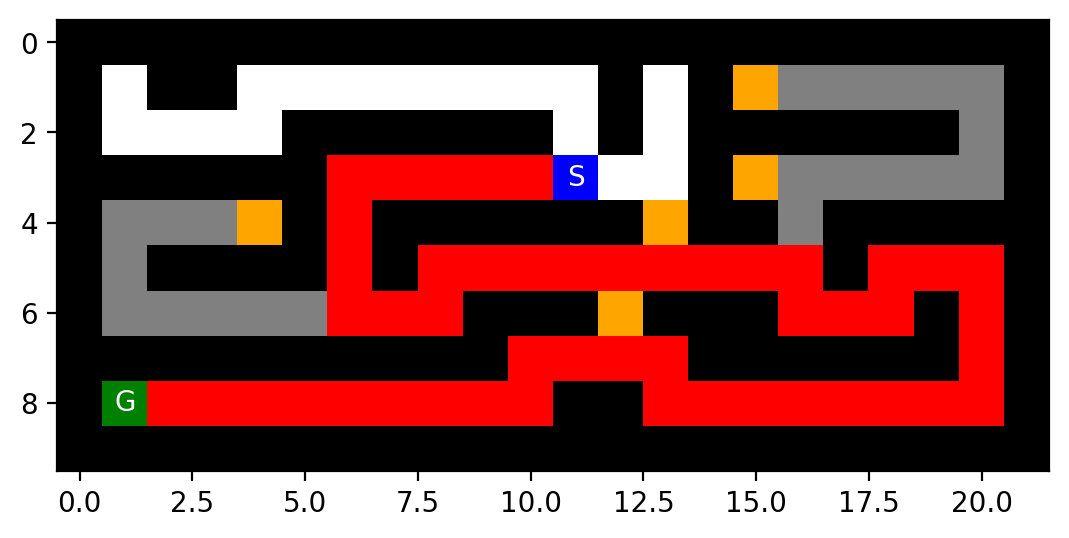

medium_maze.txt


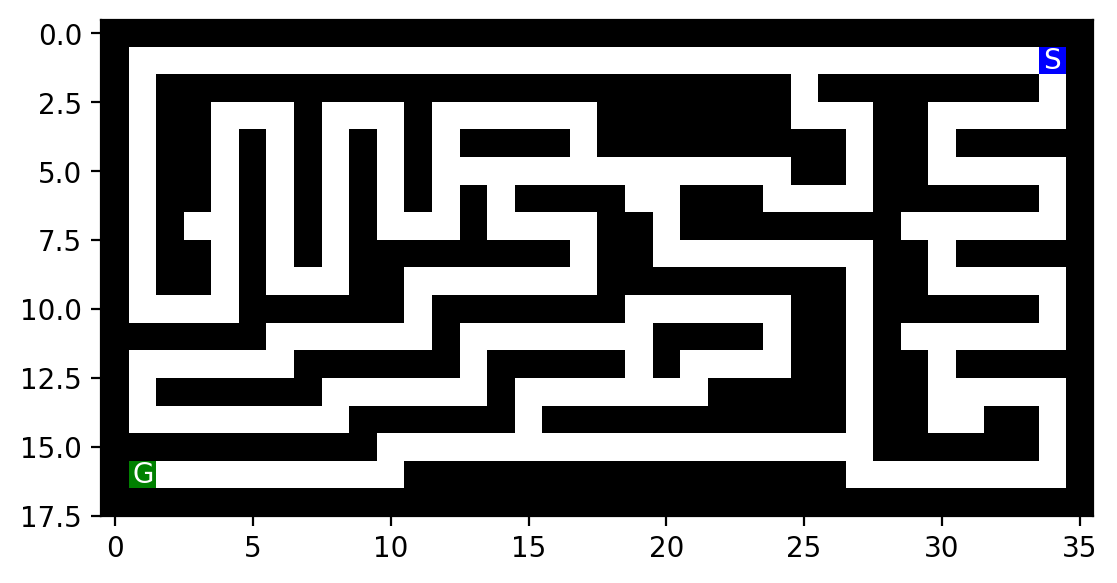

(1, 34)
(16, 1)
size: 302
optimal depth: 130
max depth: 130
max bf: 3
Frontier Size 155
Max Memory Nodes 155
Path found:
Action and Updated Postion: (East, (1, 33)), (East, (1, 32)), (East, (1, 31)), (East, (1, 30)), (East, (1, 29)), (East, (1, 28)), (East, (1, 27)), (East, (1, 26)), (East, (1, 25)), (East, (1, 24)), (East, (1, 23)), (East, (1, 22)), (East, (1, 21)), (East, (1, 20)), (East, (1, 19)), (East, (1, 18)), (East, (1, 17)), (East, (1, 16)), (East, (1, 15)), (East, (1, 14)), (East, (1, 13)), (East, (1, 12)), (East, (1, 11)), (East, (1, 10)), (East, (1, 9)), (East, (1, 8)), (East, (1, 7)), (East, (1, 6)), (East, (1, 5)), (East, (1, 4)), (East, (1, 3)), (East, (1, 2)), (East, (1, 1)), (South, (2, 1)), (South, (3, 1)), (South, (4, 1)), (South, (5, 1)), (South, (6, 1)), (South, (7, 1)), (South, (8, 1)), (South, (9, 1)), (South, (10, 1)), (West, (10, 2)), (West, (10, 3)), (West, (10, 4)), (North, (9, 4)), (North, (8, 4)), (North, (7, 4)), (North, (6, 4)), (North, (5, 4)), (North, (

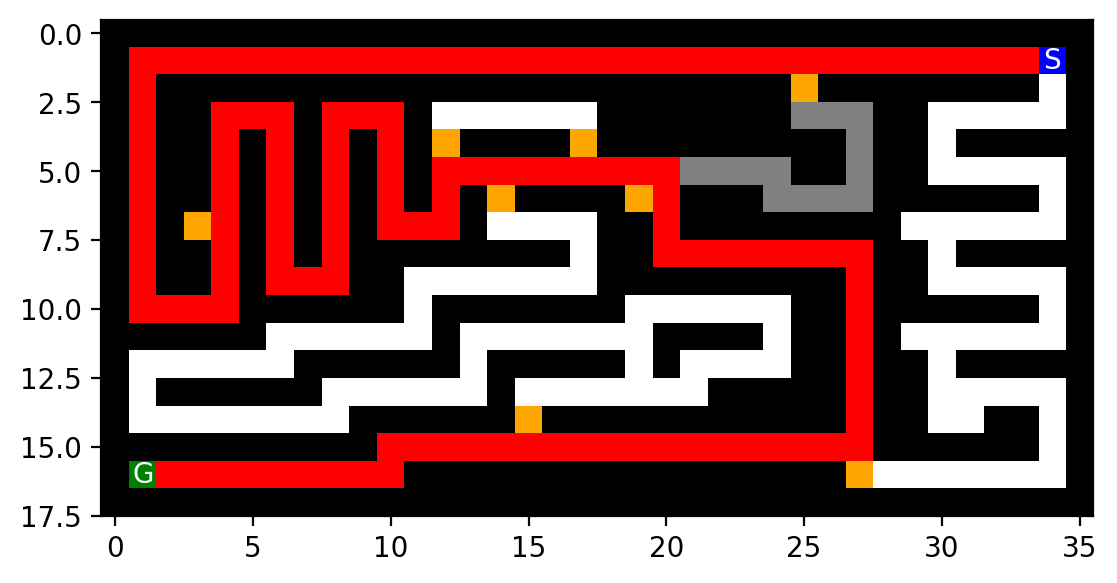

large_maze.txt


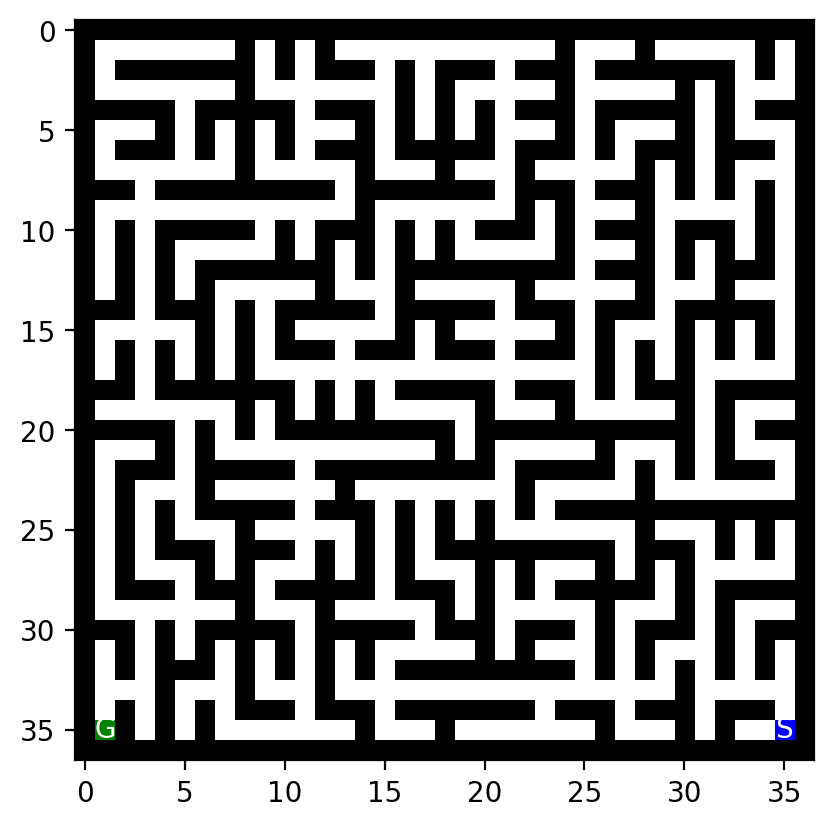

(35, 35)
(35, 1)
size: 887
optimal depth: 210
max depth: 222
max bf: 4
Frontier Size 462
Max Memory Nodes 462
Path found:
Action and Updated Postion: (North, (34, 35)), (North, (33, 35)), (East, (33, 34)), (East, (33, 33)), (East, (33, 32)), (East, (33, 31)), (North, (32, 31)), (North, (31, 31)), (East, (31, 30)), (East, (31, 29)), (South, (32, 29)), (South, (33, 29)), (East, (33, 28)), (East, (33, 27)), (East, (33, 26)), (East, (33, 25)), (East, (33, 24)), (East, (33, 23)), (East, (33, 22)), (East, (33, 21)), (East, (33, 20)), (East, (33, 19)), (East, (33, 18)), (East, (33, 17)), (East, (33, 16)), (East, (33, 15)), (North, (32, 15)), (North, (31, 15)), (West, (31, 16)), (West, (31, 17)), (North, (30, 17)), (North, (29, 17)), (East, (29, 16)), (East, (29, 15)), (North, (28, 15)), (North, (27, 15)), (North, (26, 15)), (North, (25, 15)), (North, (24, 15)), (North, (23, 15)), (West, (23, 16)), (West, (23, 17)), (West, (23, 18)), (West, (23, 19)), (West, (23, 20)), (West, (23, 21)), (South

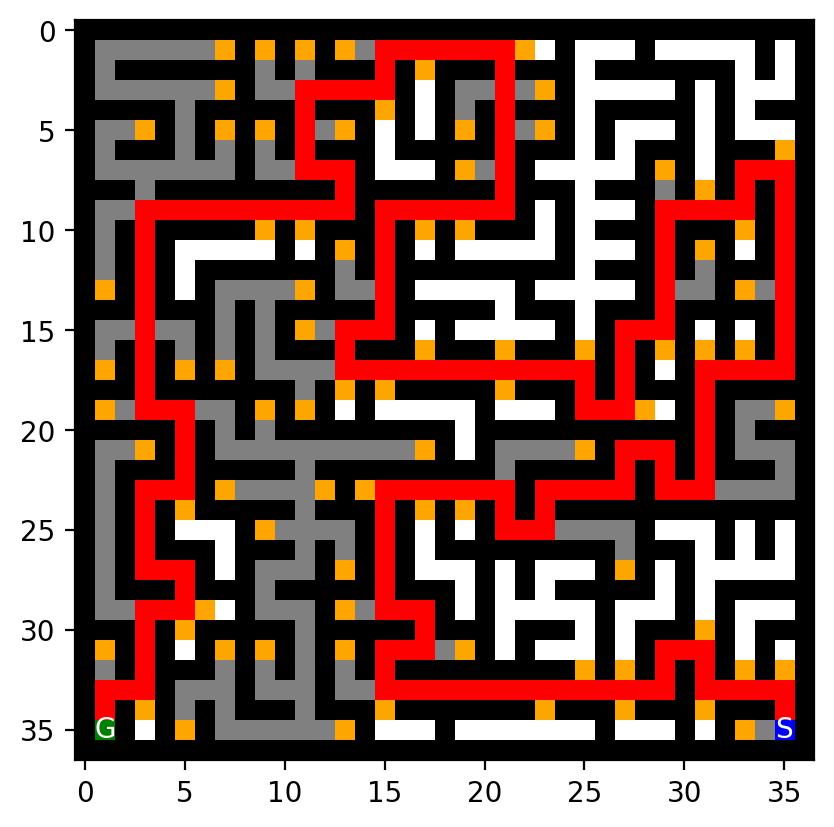

empty_maze.txt


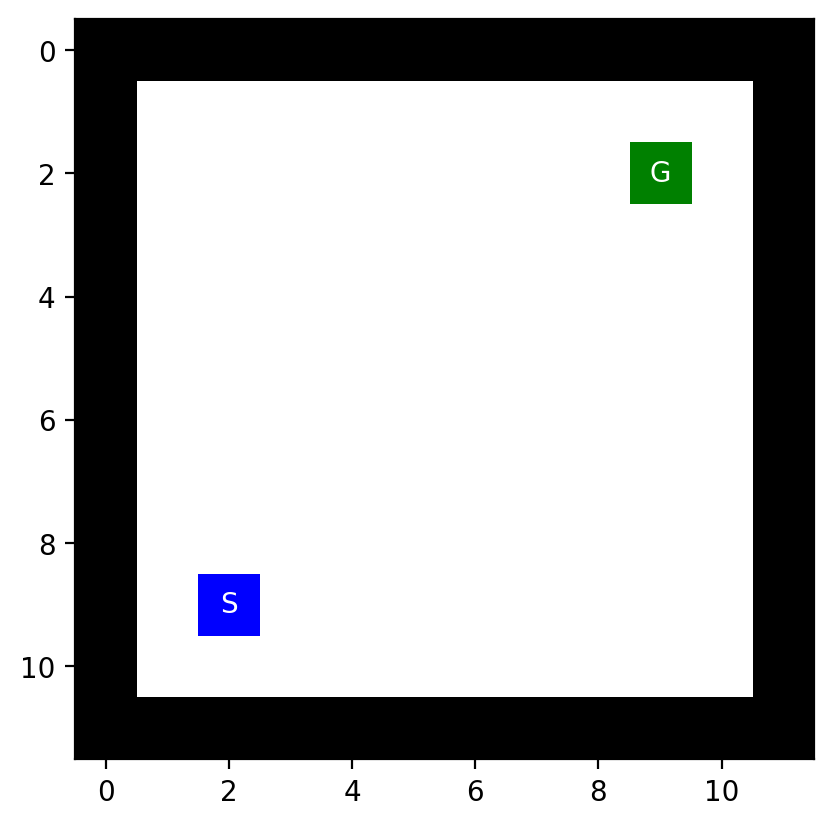

(9, 2)
(2, 9)
size: 267
optimal depth: 70
max depth: 70
max bf: 4
Frontier Size 145
Max Memory Nodes 145
Path found:
Action and Updated Postion: (East, (9, 1)), (North, (8, 1)), (West, (8, 2)), (West, (8, 3)), (West, (8, 4)), (West, (8, 5)), (West, (8, 6)), (West, (8, 7)), (West, (8, 8)), (West, (8, 9)), (West, (8, 10)), (North, (7, 10)), (East, (7, 9)), (East, (7, 8)), (East, (7, 7)), (East, (7, 6)), (East, (7, 5)), (East, (7, 4)), (East, (7, 3)), (East, (7, 2)), (East, (7, 1)), (North, (6, 1)), (West, (6, 2)), (West, (6, 3)), (West, (6, 4)), (West, (6, 5)), (West, (6, 6)), (West, (6, 7)), (West, (6, 8)), (West, (6, 9)), (West, (6, 10)), (North, (5, 10)), (East, (5, 9)), (East, (5, 8)), (East, (5, 7)), (East, (5, 6)), (East, (5, 5)), (East, (5, 4)), (East, (5, 3)), (East, (5, 2)), (East, (5, 1)), (North, (4, 1)), (West, (4, 2)), (West, (4, 3)), (West, (4, 4)), (West, (4, 5)), (West, (4, 6)), (West, (4, 7)), (West, (4, 8)), (West, (4, 9)), (West, (4, 10)), (North, (3, 10)), (East, (3, 

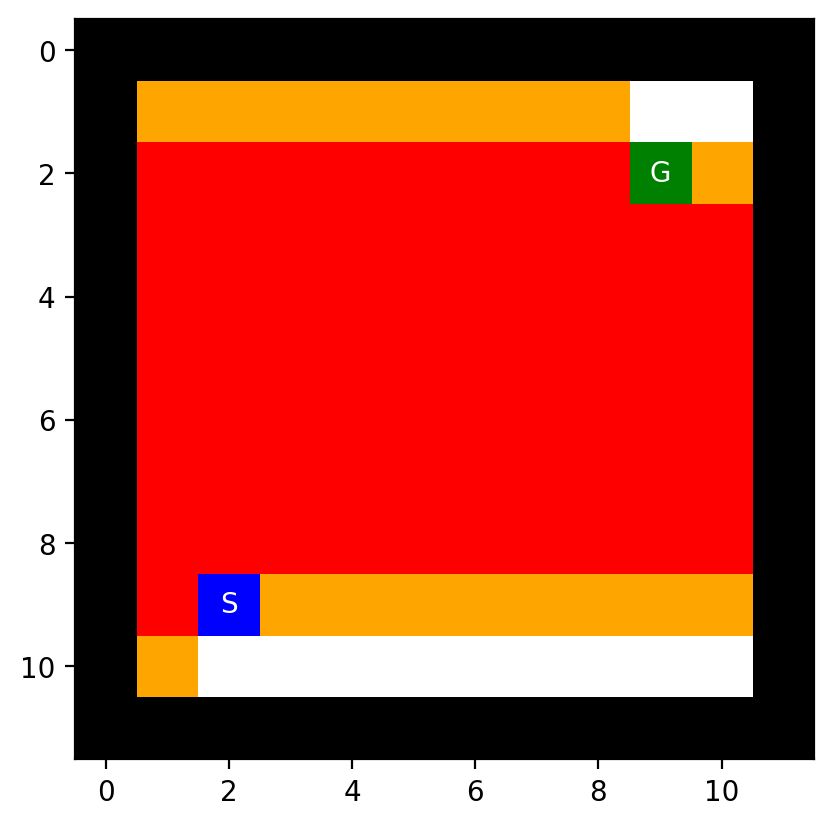

empty_2_maze.txt


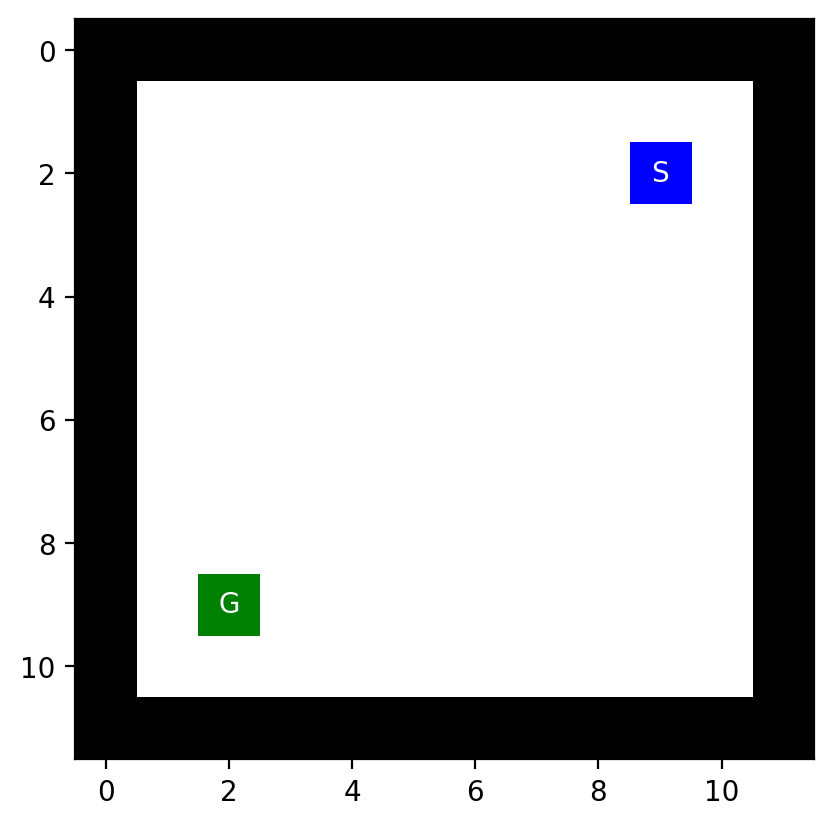

(2, 9)
(9, 2)
size: 326
optimal depth: 88
max depth: 88
max bf: 4
Frontier Size 169
Max Memory Nodes 169
Path found:
Action and Updated Postion: (East, (2, 8)), (East, (2, 7)), (East, (2, 6)), (East, (2, 5)), (East, (2, 4)), (East, (2, 3)), (East, (2, 2)), (East, (2, 1)), (North, (1, 1)), (West, (1, 2)), (West, (1, 3)), (West, (1, 4)), (West, (1, 5)), (West, (1, 6)), (West, (1, 7)), (West, (1, 8)), (West, (1, 9)), (West, (1, 10)), (South, (2, 10)), (South, (3, 10)), (East, (3, 9)), (East, (3, 8)), (East, (3, 7)), (East, (3, 6)), (East, (3, 5)), (East, (3, 4)), (East, (3, 3)), (East, (3, 2)), (East, (3, 1)), (South, (4, 1)), (West, (4, 2)), (West, (4, 3)), (West, (4, 4)), (West, (4, 5)), (West, (4, 6)), (West, (4, 7)), (West, (4, 8)), (West, (4, 9)), (West, (4, 10)), (South, (5, 10)), (East, (5, 9)), (East, (5, 8)), (East, (5, 7)), (East, (5, 6)), (East, (5, 5)), (East, (5, 4)), (East, (5, 3)), (East, (5, 2)), (East, (5, 1)), (South, (6, 1)), (West, (6, 2)), (West, (6, 3)), (West, (6, 4

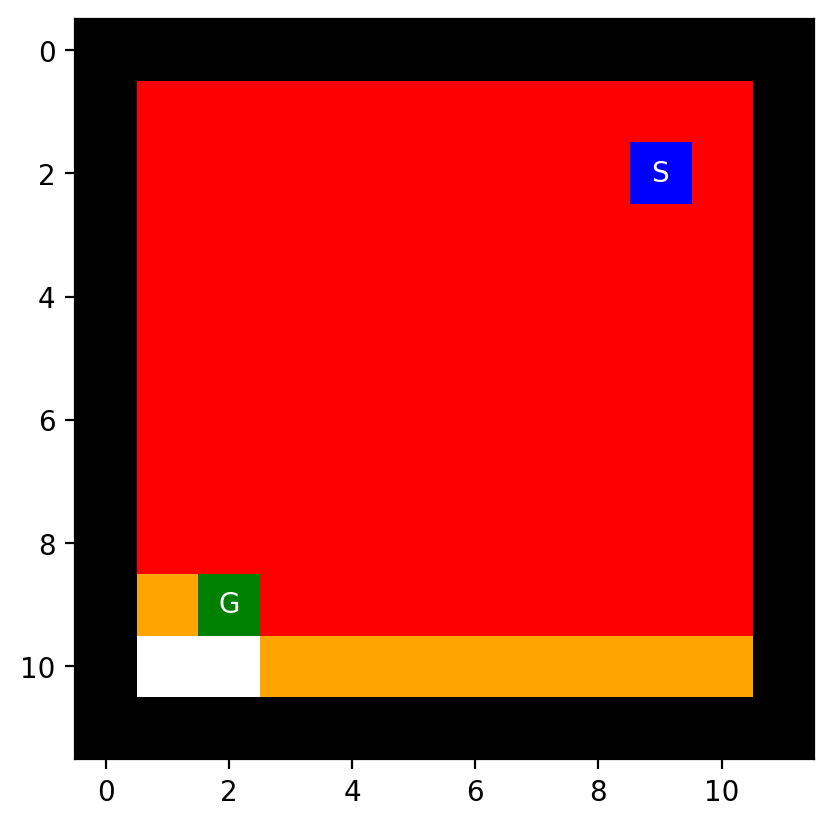

loops_maze.txt


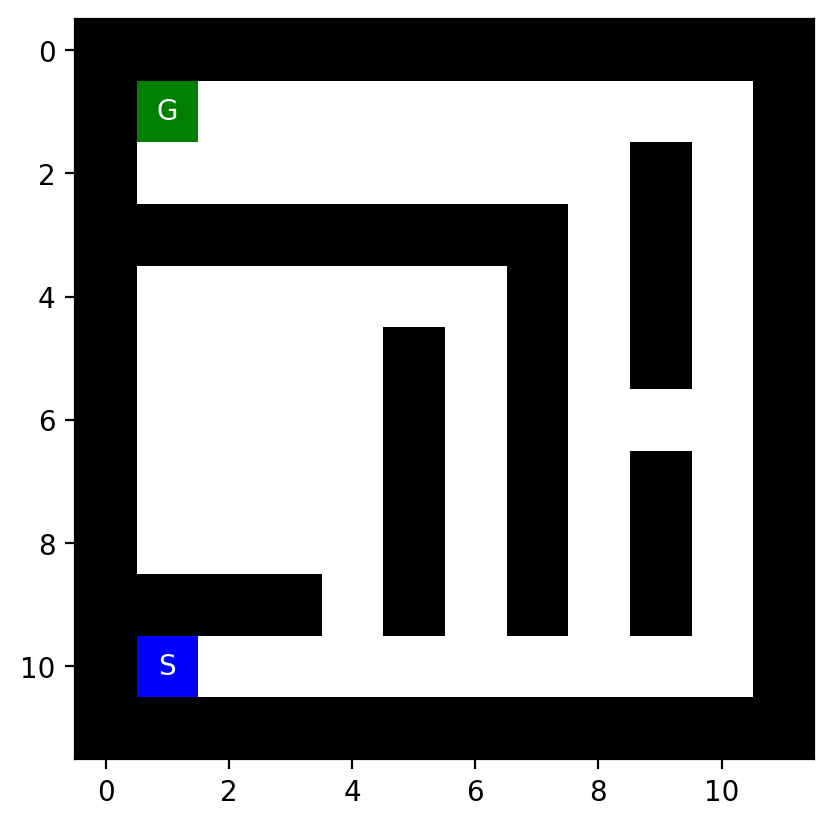

(10, 1)
(1, 1)
size: 66
optimal depth: 27
max depth: 27
max bf: 3
Frontier Size 40
Max Memory Nodes 40
Path found:
Action and Updated Postion: (West, (10, 2)), (West, (10, 3)), (West, (10, 4)), (West, (10, 5)), (West, (10, 6)), (West, (10, 7)), (West, (10, 8)), (West, (10, 9)), (West, (10, 10)), (North, (9, 10)), (North, (8, 10)), (North, (7, 10)), (North, (6, 10)), (East, (6, 9)), (East, (6, 8)), (North, (5, 8)), (North, (4, 8)), (North, (3, 8)), (North, (2, 8)), (East, (2, 7)), (East, (2, 6)), (East, (2, 5)), (East, (2, 4)), (East, (2, 3)), (East, (2, 2)), (East, (2, 1)), (North, (1, 1))


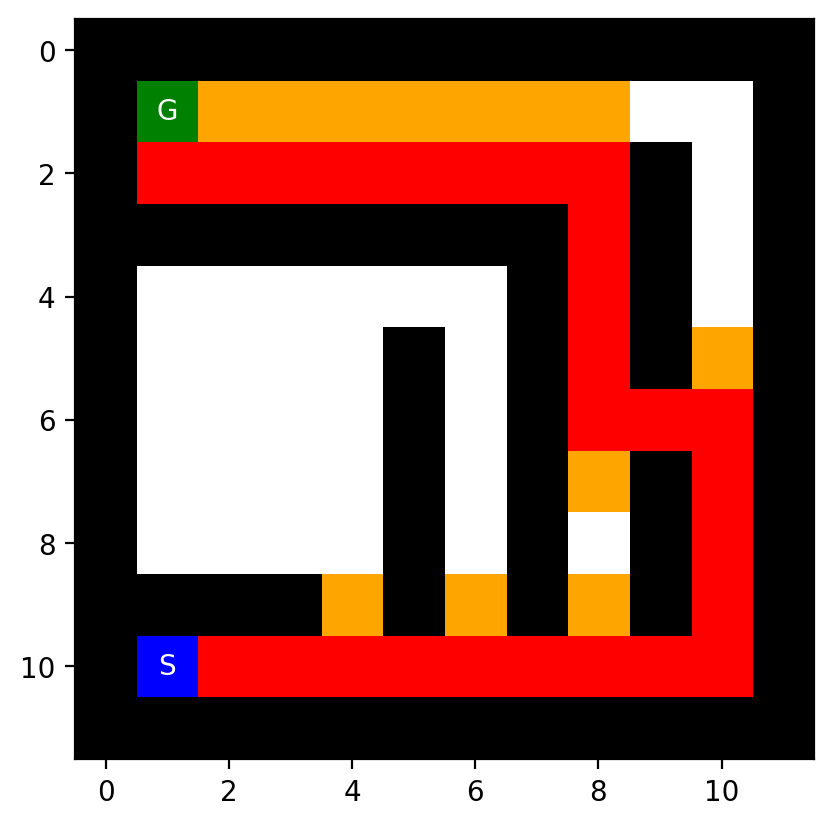

wall_maze.txt


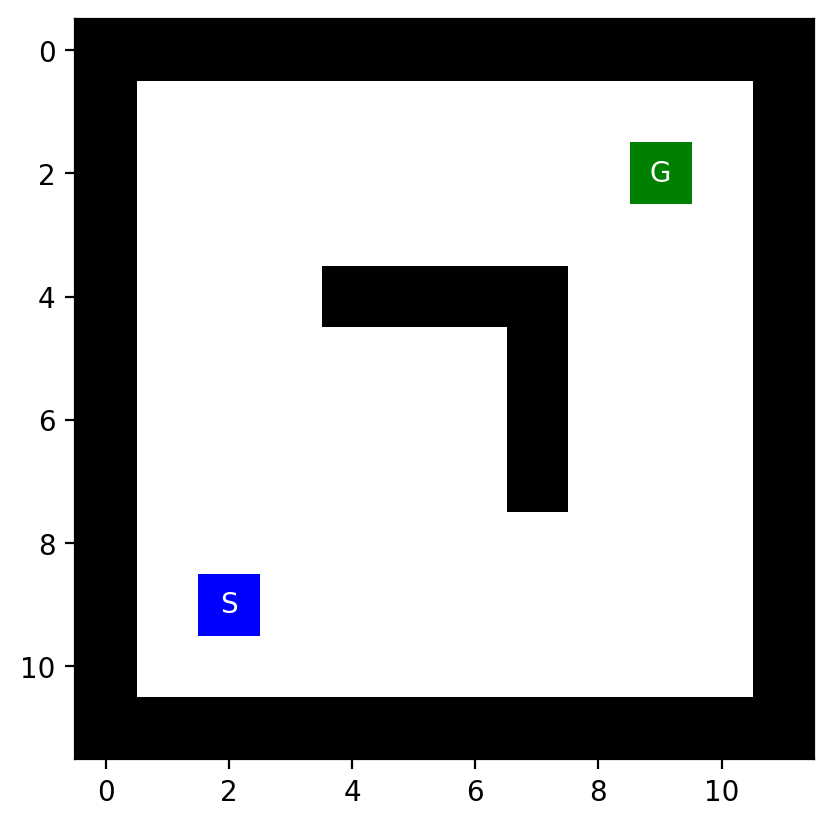

(9, 2)
(2, 9)
size: 150
optimal depth: 42
max depth: 42
max bf: 4
Frontier Size 91
Max Memory Nodes 91
Path found:
Action and Updated Postion: (East, (9, 1)), (North, (8, 1)), (West, (8, 2)), (West, (8, 3)), (West, (8, 4)), (West, (8, 5)), (West, (8, 6)), (West, (8, 7)), (West, (8, 8)), (West, (8, 9)), (West, (8, 10)), (North, (7, 10)), (East, (7, 9)), (East, (7, 8)), (North, (6, 8)), (West, (6, 9)), (West, (6, 10)), (North, (5, 10)), (East, (5, 9)), (East, (5, 8)), (North, (4, 8)), (West, (4, 9)), (West, (4, 10)), (North, (3, 10)), (East, (3, 9)), (East, (3, 8)), (East, (3, 7)), (East, (3, 6)), (East, (3, 5)), (East, (3, 4)), (East, (3, 3)), (East, (3, 2)), (East, (3, 1)), (North, (2, 1)), (West, (2, 2)), (West, (2, 3)), (West, (2, 4)), (West, (2, 5)), (West, (2, 6)), (West, (2, 7)), (West, (2, 8)), (West, (2, 9))


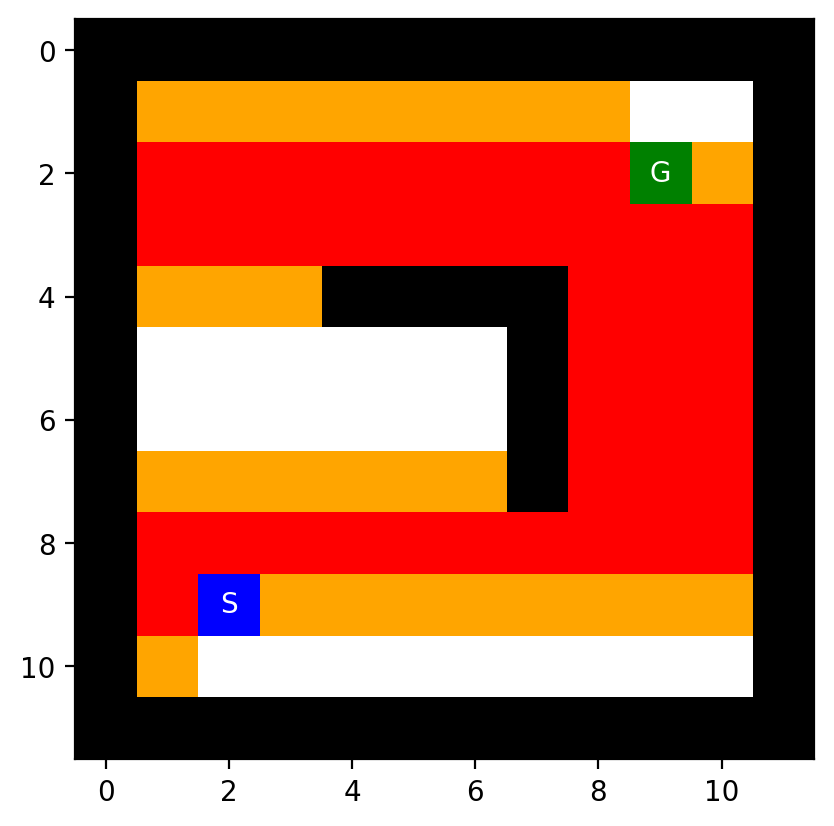

In [99]:
# Your code goes here
mazeSizes = ["small_maze.txt","medium_maze.txt","large_maze.txt","empty_maze.txt","empty_2_maze.txt","loops_maze.txt","wall_maze.txt"] #"open_maze.txt"
for mazes in mazeSizes:
    print(mazes)
    with open(mazes, "r") as f:
        maze_str = f.read()
    maze = mh.parse_maze(maze_str)
    mh.show_maze(maze)
    start = mh.find_pos(maze, what="S")
    goal = mh.find_pos(maze, what="G")
    print(start)
    print(goal)
    root = Node(start, None, None, 0)
    path,n,d,m,b, frontier_size,max_nodes_in_memory = depth_first_search(maze, root, goal, 100000) #Used a very large value for l here
    print('size:',n)
    print('optimal depth:',d)
    print('max depth:',m)
    print('max bf:',b)
    print('Frontier Size', frontier_size)
    print('Max Memory Nodes', max_nodes_in_memory )

    if path:
        df_stats = df_stats.append({'Algorithm': 'DFS',
                            'Maze': mazes,
                            'Size': n,
                            'Optimal_Depth': d,
                            'Max_Depth': m,
                            'Max_Branching_Factor': b,
                            'Frontier_Size': frontier_size,
                            'Max_Nodes_in_Memory':max_nodes_in_memory}, ignore_index=True)
        print("Path found:")
        actions_and_positions = []
        for i, node in enumerate(path):
            if i == 0:
                continue  # Skip the first node as it is the starting position
            action = node.action
            current_position = node.pos
            actions_and_positions.append((action, current_position))
            if node.pos != start and node.pos != goal:
                maze[node.pos[0]][node.pos[1]] = "P"
        print("Action and Updated Postion:", ", ".join([f"({action}, {current_position})" for action, current_position in actions_and_positions]))
    else:
        print("No path found")
    mh.show_maze(maze)


How does BFS and DFS deal with loops (cycles)?

**BFS:** BFS maintains the "reached" data structure to keep track of the all the nodes added to the path. Before adding any child node to the frontier, a check (if child_pos not in reached) is done to ensure the node is not already visited. This avoids any cycle in the path.

**DFS:** Unlike BFS, there is no separate data structure used to maintain or track the current path of the. Instead, every time a new node is visited, the actual path from the root is retrieved and check if the node is alreaady visited to avoid any cycles.

Are your implementations complete and optimal? Explain why. What is the time and space complexity of each of **your** implementations?

Yes, the solutions for BFS and DFS work for all the mazes except for the one following case:

1. DFS for open maze where in it runs into an infinite loop. Probably, triggering a direction change when entering the the room in open maze might help solve and overcome the infinite loop. Or maintaining a tracker that prevents entering the loop might be another way out.

b: max branching factor
d: depth of optimal solution
m: max depth of the tree

Space Complexity:
1. BFS: O(b^d)
2. DFS: O(bm)

Time Complexity:
1. BFS: O(b^d)
2. DFS: O(b^m)

## Task 3: Informed search: Implement greedy best-first search and A* search  [20 Points]

You can use the map to estimate the distance from your current position to the goal using the Manhattan distance (see https://en.wikipedia.org/wiki/Taxicab_geometry) as a heuristic function. Both algorithms are based on Best-First search which requires only a small change from the BFS algorithm you have already implemented (see textbook/slides).

In [100]:
# Your code goes here
#Greedy Best First Search

from queue import PriorityQueue

def uniform_greedy_cost_search(maze, root, goal):
  return greedy_best_first_search(maze, root, goal, lambda node: node.estimated_cost_distance(goal))

def greedy_best_first_search(maze, root, goal, h, debug = False):
  n = 1
  d = 0
  m = 0
  b = 0
  frontier = PriorityQueue()
  frontier.put((h(root), root))
  reached = {root.pos: root}
  frontier_size = 1
  max_nodes_in_memory = 1
  while frontier:
      priority, node = frontier.get()
      m = max(m, node.cost)
      if reached_goal(node.pos, goal):
        d = node.cost #depth of optimal solution
        return node.get_path_from_root(), n, d, m, b, frontier_size, max_nodes_in_memory


      branches = len(valid_moves(node.pos, maze))
      b = max(b, branches)

      for child_pos, direction in valid_moves(node.pos, maze).items():
        child_cost = node.cost + 1
        child = Node(child_pos, node, direction, child_cost)
        n += 1
        if child_pos not in reached or child.cost < reached[child_pos].cost: #Check if the current_path cost is less than the existing one
            frontier.put((h(child),child)) #Add the cost associated with each child action as well
            reached[child_pos] = child
            frontier_size += 1
            max_nodes_in_memory = max(max_nodes_in_memory, frontier_size)
            if node.pos != root.pos and node.pos != goal and child.pos != goal:
              maze[node.pos[0]][node.pos[1]] = "."
              maze[child.pos[0]][child.pos[1]] = "F"
              if debug: mh.show_maze(maze)

  return None

small_maze.txt


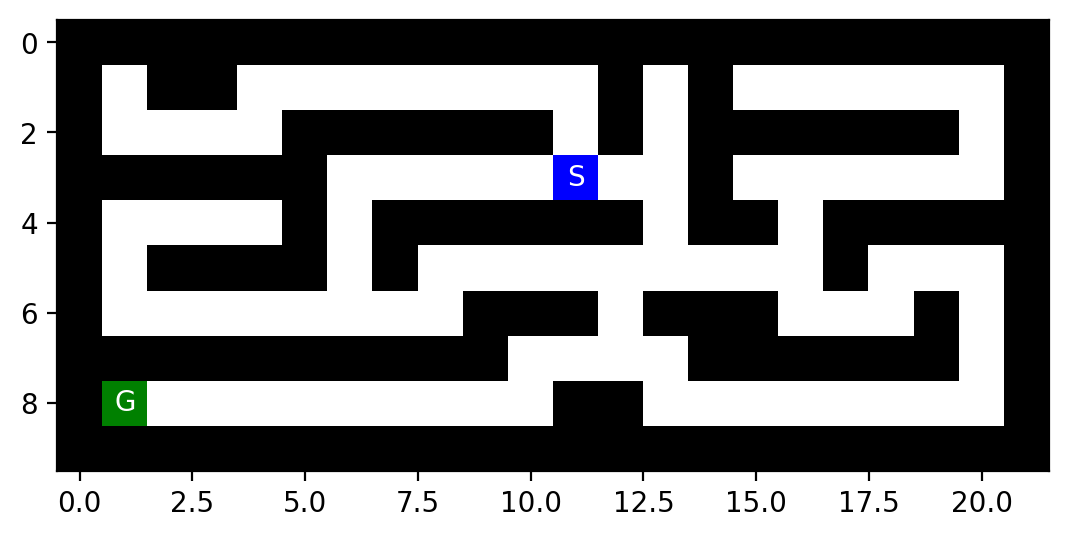

(3, 11)
(8, 1)
size: 82
optimal; depth: 29
max depth: 29
max bf: 3
Frontier Size: 44
Max Nodes in Memory: 44
Path found:
Action and Updated Postion: (East, (3, 10)), (East, (3, 9)), (East, (3, 8)), (East, (3, 7)), (East, (3, 6)), (South, (4, 6)), (South, (5, 6)), (South, (6, 6)), (West, (6, 7)), (West, (6, 8)), (North, (5, 8)), (West, (5, 9)), (West, (5, 10)), (West, (5, 11)), (West, (5, 12)), (South, (6, 12)), (South, (7, 12)), (East, (7, 11)), (East, (7, 10)), (South, (8, 10)), (East, (8, 9)), (East, (8, 8)), (East, (8, 7)), (East, (8, 6)), (East, (8, 5)), (East, (8, 4)), (East, (8, 3)), (East, (8, 2)), (East, (8, 1))


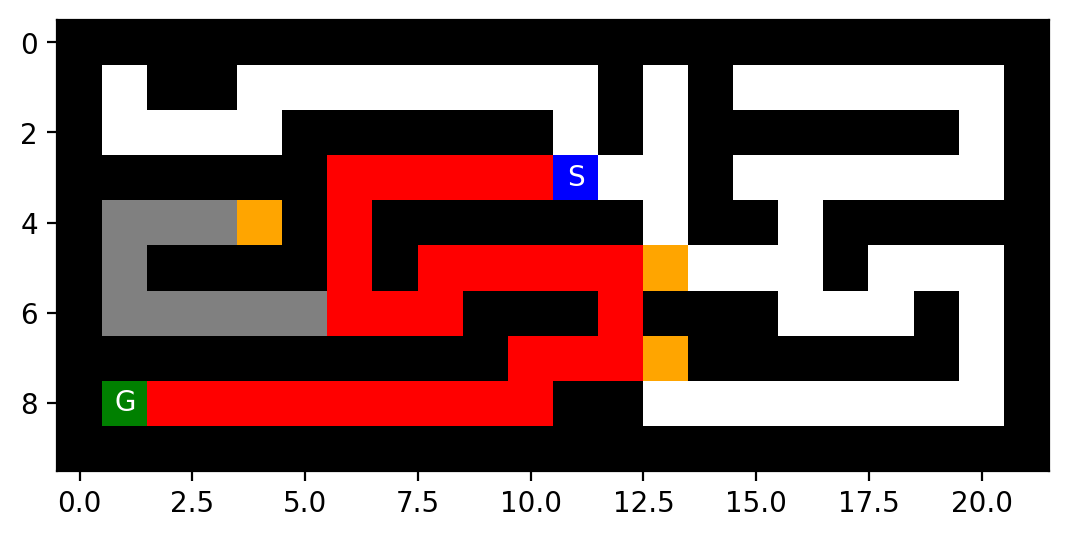

medium_maze.txt


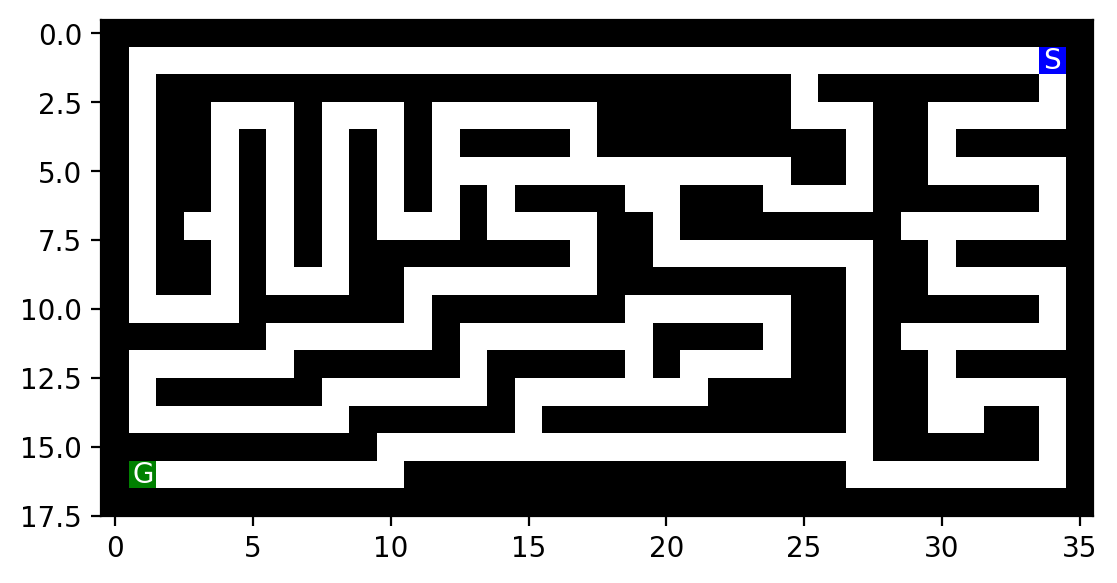

(1, 34)
(16, 1)
size: 161
optimal; depth: 74
max depth: 74
max bf: 3
Frontier Size: 82
Max Nodes in Memory: 82
Path found:
Action and Updated Postion: (South, (2, 34)), (South, (3, 34)), (East, (3, 33)), (East, (3, 32)), (East, (3, 31)), (East, (3, 30)), (South, (4, 30)), (South, (5, 30)), (West, (5, 31)), (West, (5, 32)), (West, (5, 33)), (West, (5, 34)), (South, (6, 34)), (South, (7, 34)), (East, (7, 33)), (East, (7, 32)), (East, (7, 31)), (East, (7, 30)), (South, (8, 30)), (South, (9, 30)), (West, (9, 31)), (West, (9, 32)), (West, (9, 33)), (West, (9, 34)), (South, (10, 34)), (South, (11, 34)), (East, (11, 33)), (East, (11, 32)), (East, (11, 31)), (East, (11, 30)), (South, (12, 30)), (South, (13, 30)), (West, (13, 31)), (West, (13, 32)), (West, (13, 33)), (West, (13, 34)), (South, (14, 34)), (South, (15, 34)), (South, (16, 34)), (East, (16, 33)), (East, (16, 32)), (East, (16, 31)), (East, (16, 30)), (East, (16, 29)), (East, (16, 28)), (East, (16, 27)), (North, (15, 27)), (East, (15,

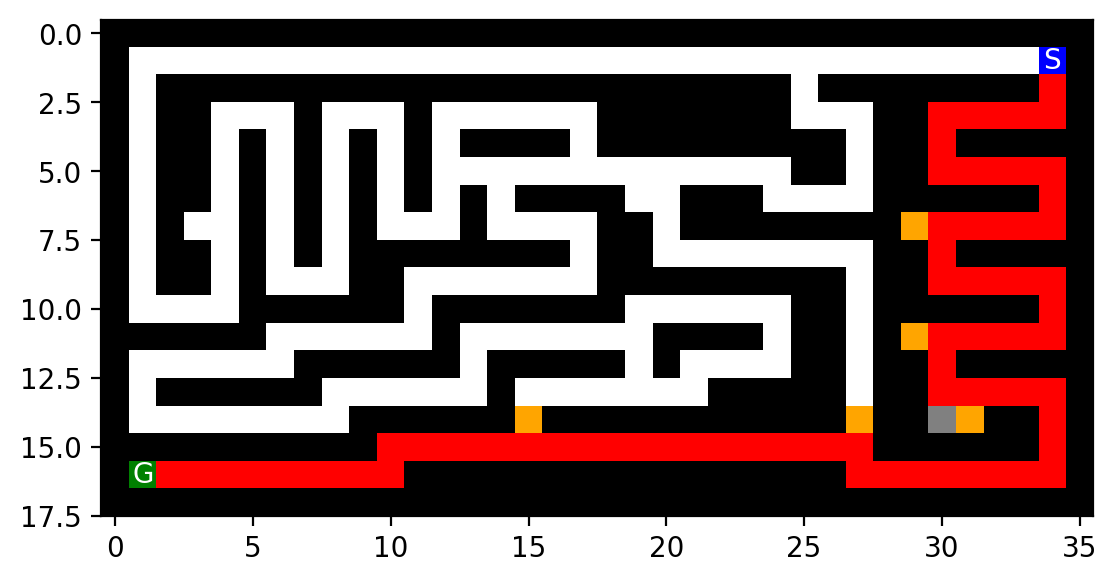

large_maze.txt


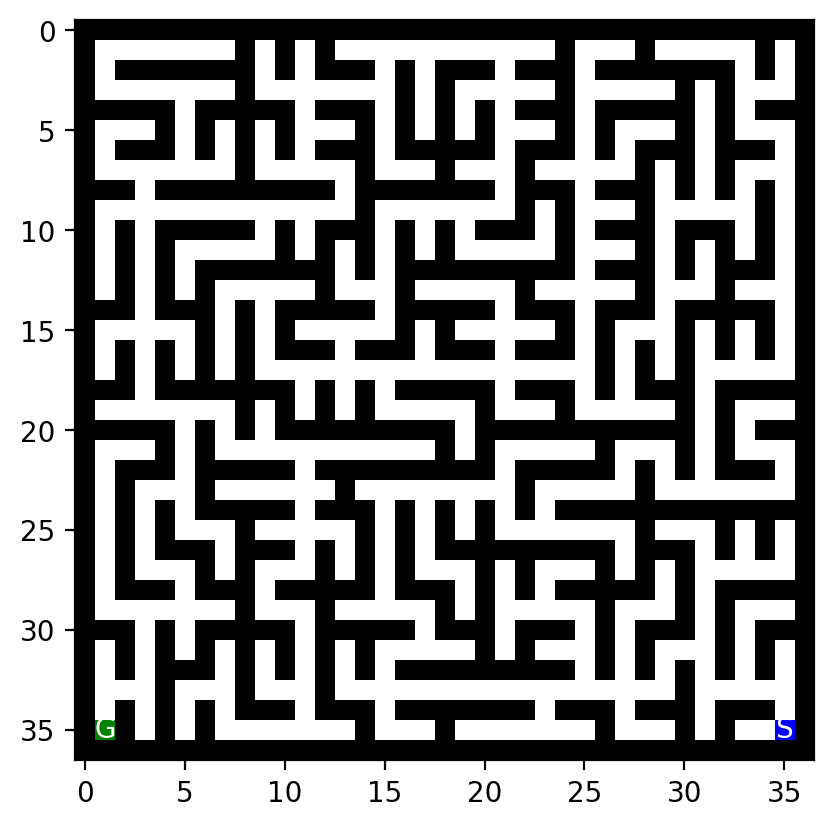

(35, 35)
(35, 1)
size: 953
optimal; depth: 210
max depth: 210
max bf: 4
Frontier Size: 487
Max Nodes in Memory: 487
Path found:
Action and Updated Postion: (North, (34, 35)), (North, (33, 35)), (East, (33, 34)), (East, (33, 33)), (East, (33, 32)), (East, (33, 31)), (North, (32, 31)), (North, (31, 31)), (East, (31, 30)), (East, (31, 29)), (South, (32, 29)), (South, (33, 29)), (East, (33, 28)), (East, (33, 27)), (East, (33, 26)), (East, (33, 25)), (East, (33, 24)), (East, (33, 23)), (East, (33, 22)), (East, (33, 21)), (East, (33, 20)), (East, (33, 19)), (East, (33, 18)), (East, (33, 17)), (East, (33, 16)), (East, (33, 15)), (North, (32, 15)), (North, (31, 15)), (West, (31, 16)), (West, (31, 17)), (North, (30, 17)), (North, (29, 17)), (East, (29, 16)), (East, (29, 15)), (North, (28, 15)), (North, (27, 15)), (North, (26, 15)), (North, (25, 15)), (North, (24, 15)), (North, (23, 15)), (West, (23, 16)), (West, (23, 17)), (West, (23, 18)), (West, (23, 19)), (West, (23, 20)), (West, (23, 21)), 

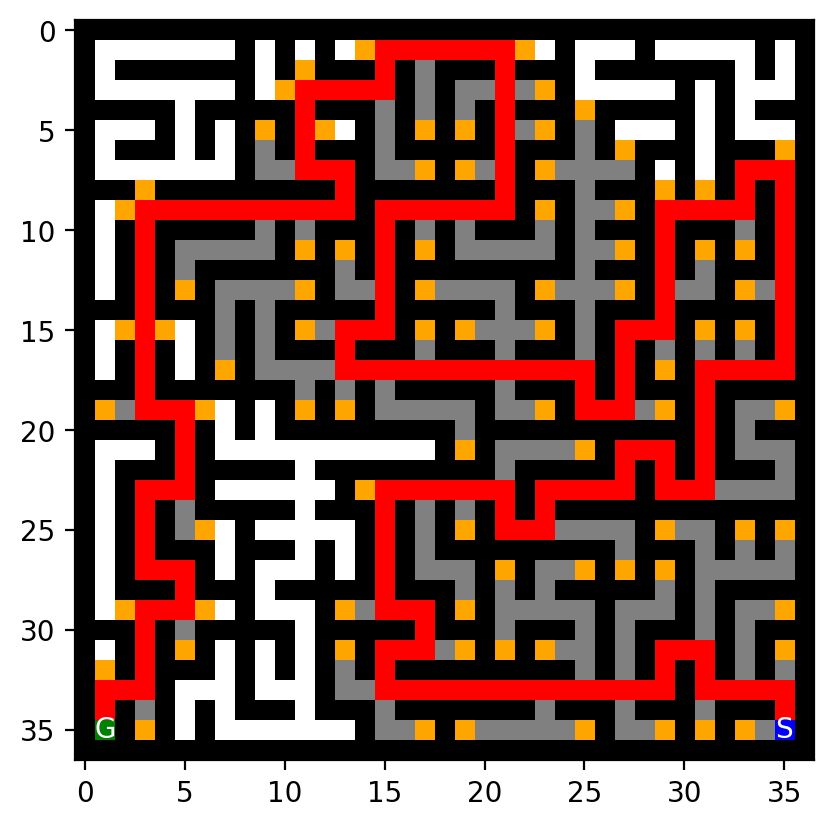

empty_maze.txt


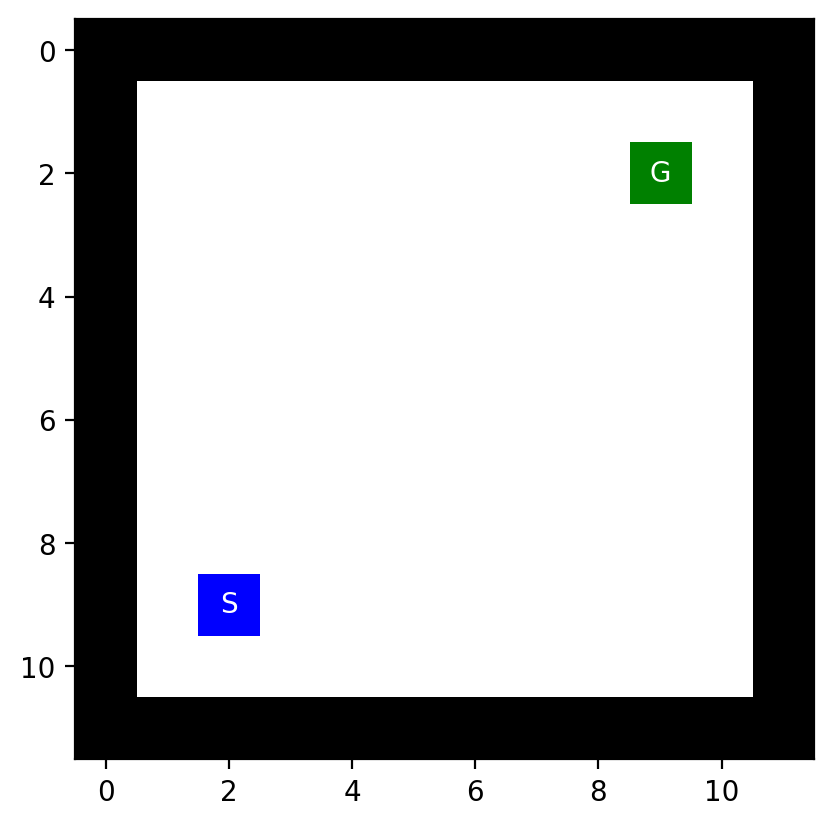

(9, 2)
(2, 9)
size: 57
optimal; depth: 14
max depth: 14
max bf: 4
Frontier Size: 43
Max Nodes in Memory: 43
Path found:
Action and Updated Postion: (North, (8, 2)), (North, (7, 2)), (North, (6, 2)), (North, (5, 2)), (North, (4, 2)), (North, (3, 2)), (North, (2, 2)), (West, (2, 3)), (West, (2, 4)), (West, (2, 5)), (West, (2, 6)), (West, (2, 7)), (West, (2, 8)), (West, (2, 9))


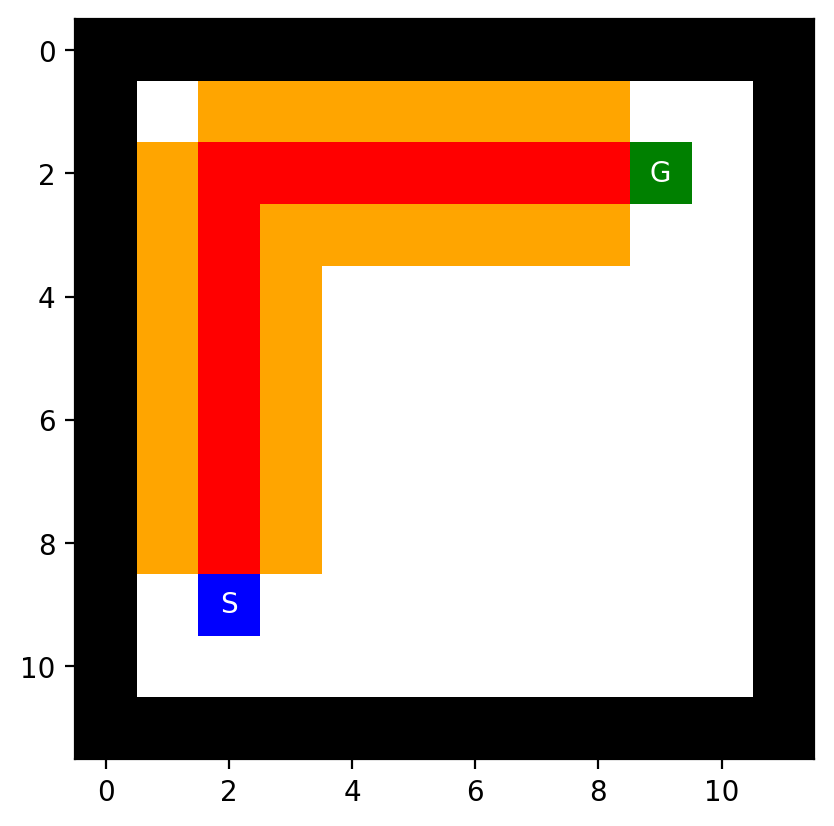

empty_2_maze.txt


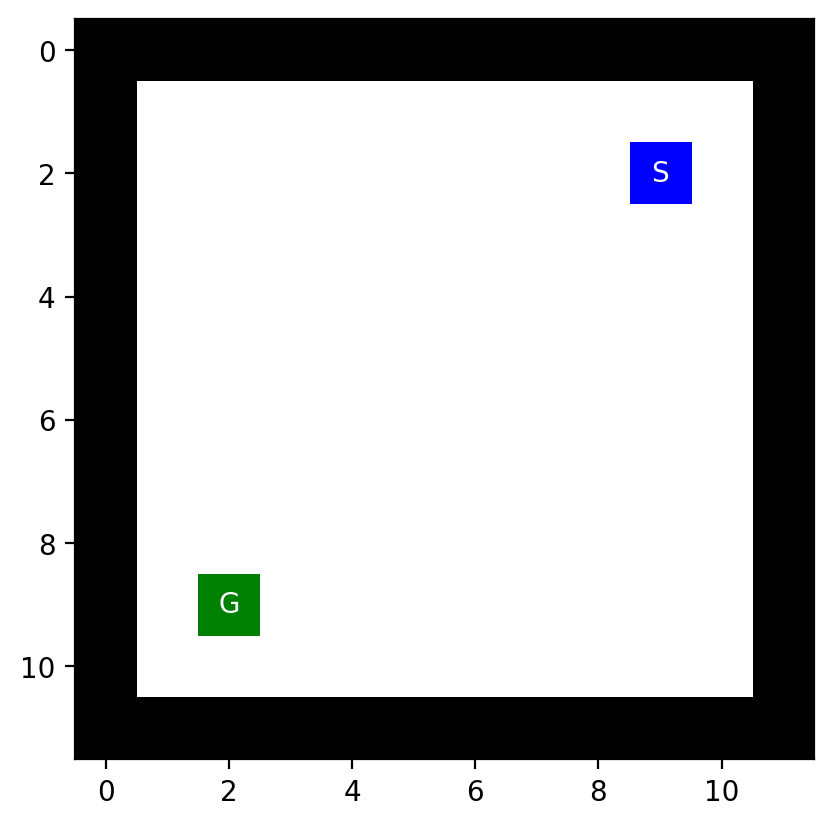

(2, 9)
(9, 2)
size: 57
optimal; depth: 14
max depth: 14
max bf: 4
Frontier Size: 43
Max Nodes in Memory: 43
Path found:
Action and Updated Postion: (South, (3, 9)), (South, (4, 9)), (South, (5, 9)), (South, (6, 9)), (South, (7, 9)), (South, (8, 9)), (South, (9, 9)), (East, (9, 8)), (East, (9, 7)), (East, (9, 6)), (East, (9, 5)), (East, (9, 4)), (East, (9, 3)), (East, (9, 2))


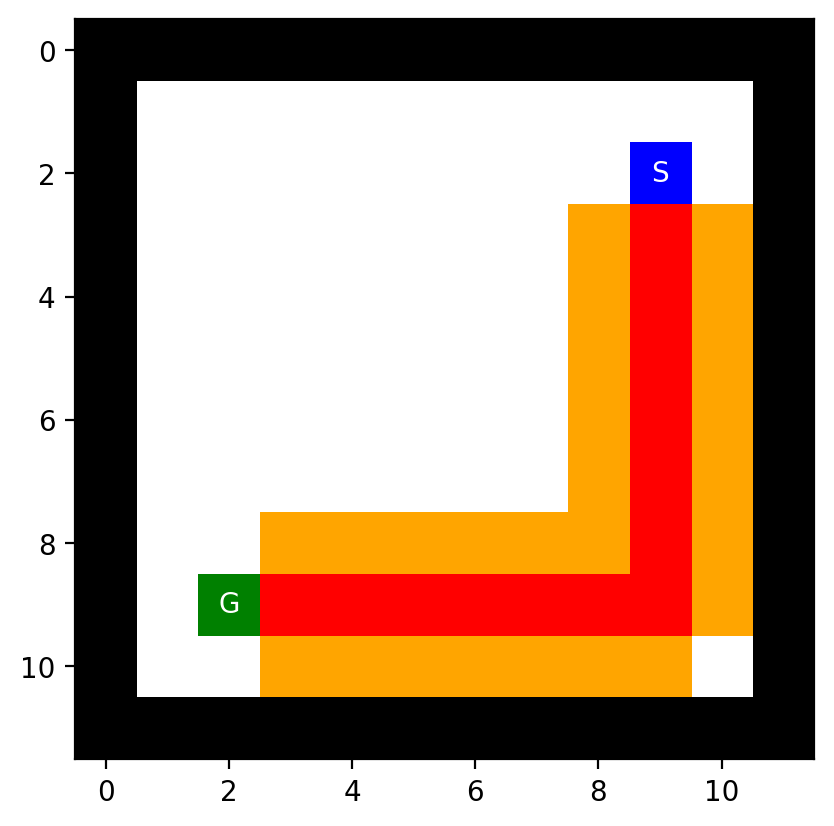

loops_maze.txt


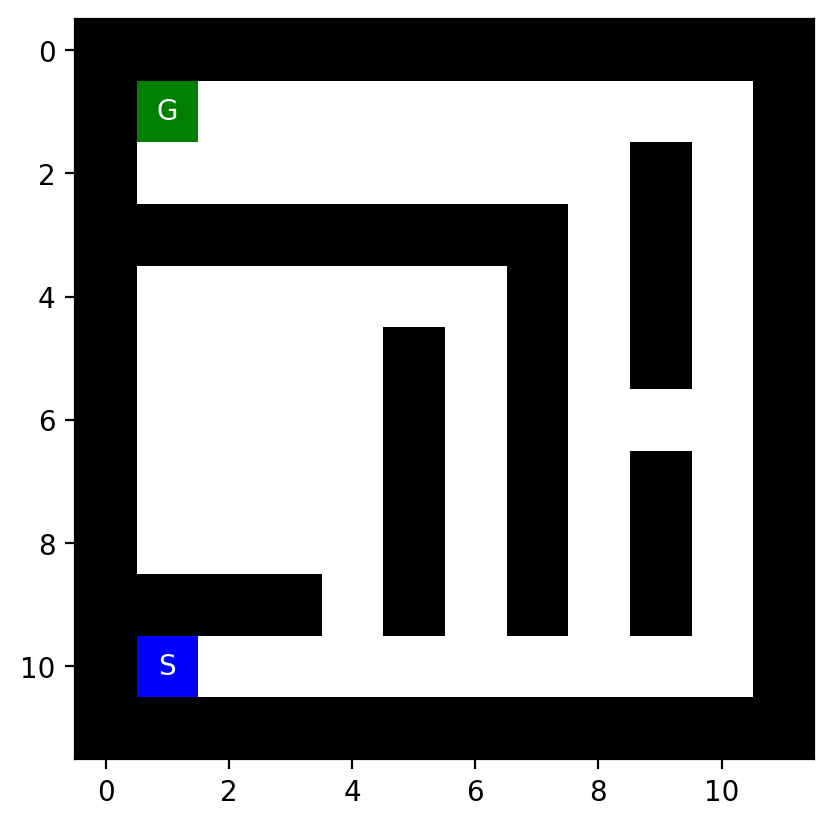

(10, 1)
(1, 1)
size: 198
optimal; depth: 23
max depth: 23
max bf: 4
Frontier Size: 82
Max Nodes in Memory: 82
Path found:
Action and Updated Postion: (West, (10, 2)), (West, (10, 3)), (West, (10, 4)), (West, (10, 5)), (West, (10, 6)), (West, (10, 7)), (West, (10, 8)), (North, (9, 8)), (North, (8, 8)), (North, (7, 8)), (North, (6, 8)), (North, (5, 8)), (North, (4, 8)), (North, (3, 8)), (North, (2, 8)), (North, (1, 8)), (East, (1, 7)), (East, (1, 6)), (East, (1, 5)), (East, (1, 4)), (East, (1, 3)), (East, (1, 2)), (East, (1, 1))


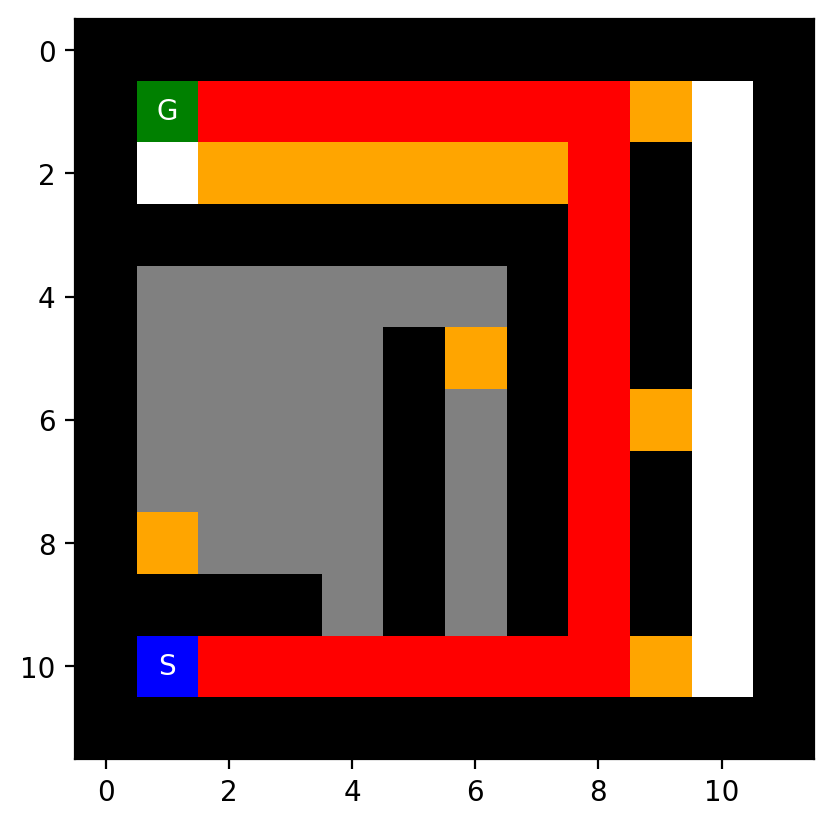

open_maze.txt


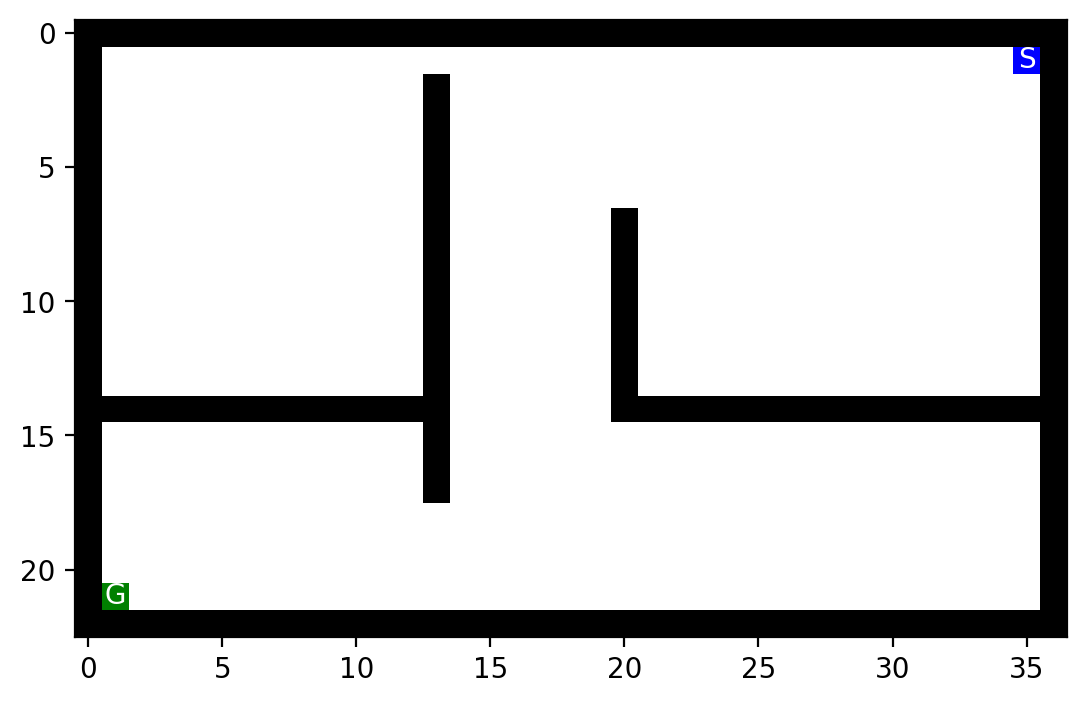

(1, 35)
(21, 1)
size: 294
optimal; depth: 68
max depth: 68
max bf: 4
Frontier Size: 155
Max Nodes in Memory: 155
Path found:
Action and Updated Postion: (South, (2, 35)), (South, (3, 35)), (South, (4, 35)), (South, (5, 35)), (South, (6, 35)), (South, (7, 35)), (South, (8, 35)), (South, (9, 35)), (South, (10, 35)), (South, (11, 35)), (South, (12, 35)), (South, (13, 35)), (East, (13, 34)), (East, (13, 33)), (East, (13, 32)), (East, (13, 31)), (East, (13, 30)), (East, (13, 29)), (East, (13, 28)), (East, (13, 27)), (East, (13, 26)), (East, (13, 25)), (East, (13, 24)), (East, (13, 23)), (East, (13, 22)), (East, (13, 21)), (North, (12, 21)), (North, (11, 21)), (North, (10, 21)), (North, (9, 21)), (North, (8, 21)), (North, (7, 21)), (North, (6, 21)), (East, (6, 20)), (East, (6, 19)), (South, (7, 19)), (South, (8, 19)), (South, (9, 19)), (South, (10, 19)), (South, (11, 19)), (South, (12, 19)), (South, (13, 19)), (South, (14, 19)), (South, (15, 19)), (South, (16, 19)), (South, (17, 19)), (South

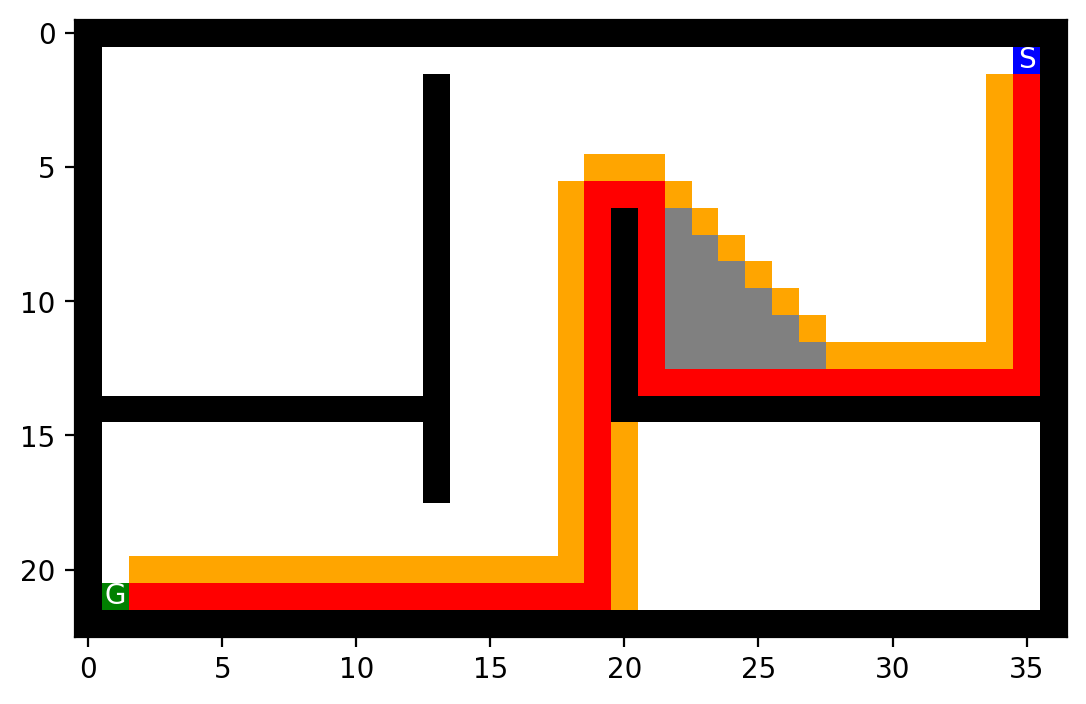

wall_maze.txt


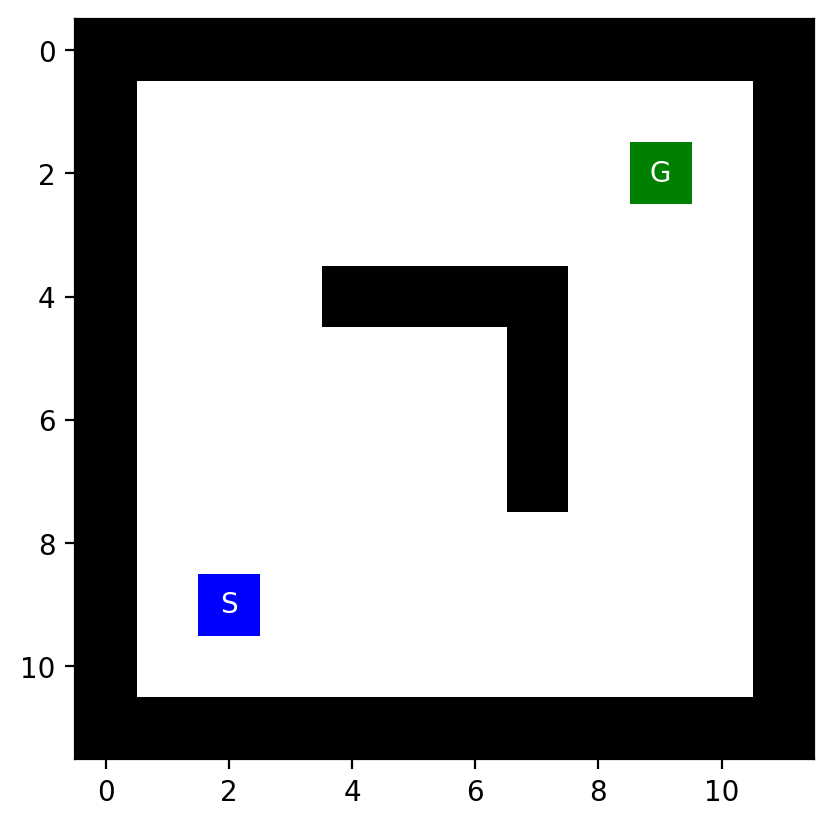

(9, 2)
(2, 9)
size: 57
optimal; depth: 14
max depth: 14
max bf: 4
Frontier Size: 43
Max Nodes in Memory: 43
Path found:
Action and Updated Postion: (North, (8, 2)), (North, (7, 2)), (North, (6, 2)), (North, (5, 2)), (North, (4, 2)), (North, (3, 2)), (North, (2, 2)), (West, (2, 3)), (West, (2, 4)), (West, (2, 5)), (West, (2, 6)), (West, (2, 7)), (West, (2, 8)), (West, (2, 9))


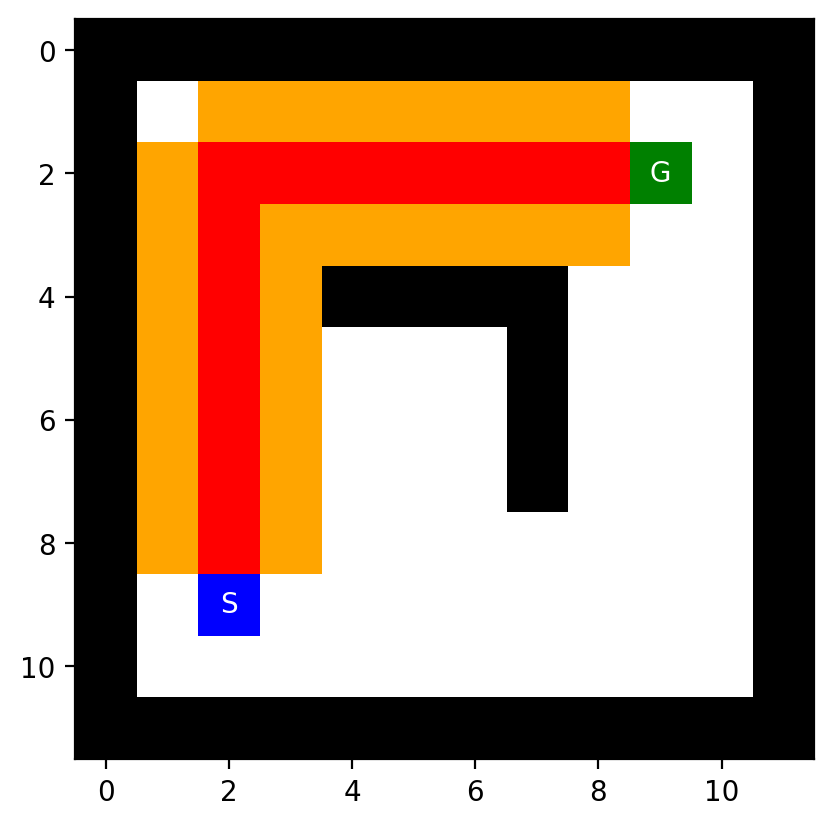

In [101]:
# Your code goes here
mazeSizes = ["small_maze.txt","medium_maze.txt","large_maze.txt","empty_maze.txt","empty_2_maze.txt","loops_maze.txt","open_maze.txt","wall_maze.txt"]
for mazes in mazeSizes:
    print(mazes)
    with open(mazes, "r") as f:
        maze_str = f.read()
    maze = mh.parse_maze(maze_str)
    mh.show_maze(maze)
    start = mh.find_pos(maze, what="S")
    goal = mh.find_pos(maze, what="G")
    print(start)
    print(goal)
    root = Node(start, None, None, 0)
    path,n, d, m, b, frontier_size,max_nodes_in_memory = uniform_greedy_cost_search(maze, root, goal)
    print('size:',n)
    print('optimal; depth:',d)
    print('max depth:',m)
    print('max bf:',b)
    print('Frontier Size:', frontier_size)
    print('Max Nodes in Memory:',max_nodes_in_memory)

    if path:
        df_stats = df_stats.append({'Algorithm': 'GBS',
                            'Maze': mazes,
                            'Size': n,
                            'Optimal_Depth': d,
                            'Max_Depth': m,
                            'Max_Branching_Factor': b,
                            'Frontier_Size': frontier_size,
                            'Max_Nodes_in_Memory': max_nodes_in_memory}, ignore_index=True)
        print("Path found:")
        actions_and_positions = []
        for i, node in enumerate(path):
            if i == 0:
                continue  # Skip the first node as it is the starting position
            action = node.action
            current_position = node.pos
            actions_and_positions.append((action, current_position))
            if node.pos != start and node.pos != goal:
                maze[node.pos[0]][node.pos[1]] = "P"
        print("Action and Updated Postion:", ", ".join([f"({action}, {current_position})" for action, current_position in actions_and_positions]))
    else:
        print("No path found")
    mh.show_maze(maze)

In [102]:
#A*
from queue import PriorityQueue

def a_cost_search(maze, root, goal):
  return a_star_search(maze, root, goal, lambda node: node.estimated_cost_distance(goal))

def a_star_search(maze, root, goal, h, debug = False):
  n = 1
  d = 0
  m = 0
  b = 0
  frontier = PriorityQueue()
  frontier.put((h(root) + 0, root))
  reached = {root.pos: root}
  frontier_size = 1
  max_nodes_in_memory = 1
  while frontier:
    priority, node = frontier.get()
    m = max(m, node.cost)
    if reached_goal(node.pos, goal):
      d = node.cost #depth of optimal solution
      return node.get_path_from_root(), n, d, m, b, frontier_size, max_nodes_in_memory

    branches = len(valid_moves(node.pos, maze))
    b = max(b, branches)

    for child_pos, direction in valid_moves(node.pos, maze).items():
      child_cost = node.cost + 1
      child = Node(child_pos, node, direction, child_cost)
      n += 1
      if child_pos not in reached or child.cost < reached[child_pos].cost: #Check if the current_path cost is less than the existing one
        priority = h(child) + child.cost
        frontier.put((priority,child)) #Add the cost associated with each child action as well to Frontier
        reached[child_pos] = child
        frontier_size += 1
        max_nodes_in_memory = max(max_nodes_in_memory, frontier_size)
        if node.pos != root.pos and node.pos != goal and child.pos != goal:
            maze[node.pos[0]][node.pos[1]] = "."
            maze[child.pos[0]][child.pos[1]] = "F"
            if debug: mh.show_maze(maze)
  return None


small_maze.txt


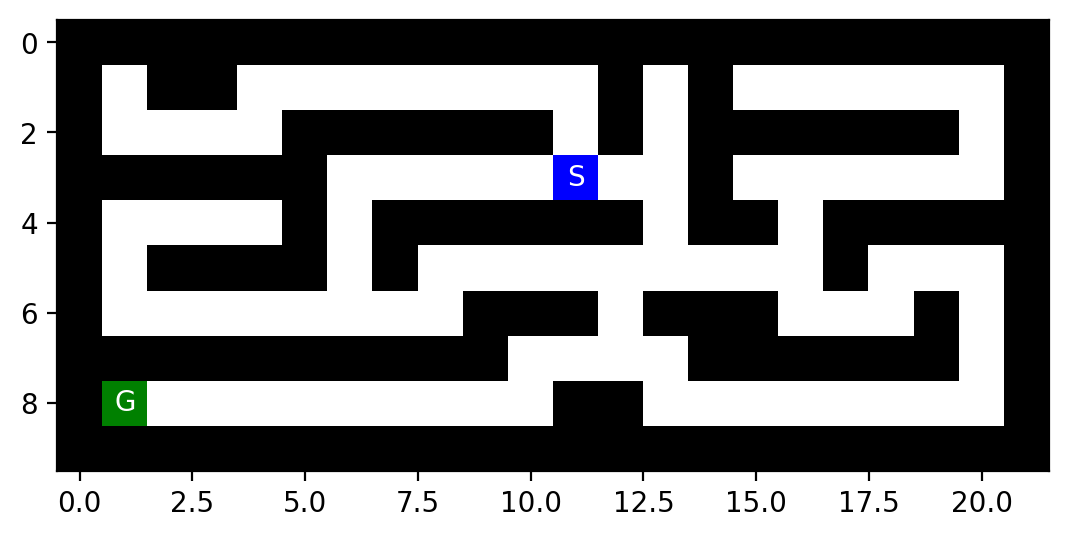

Start Position: (3, 11)
Goal Position: (8, 1)
size: 113
optimal depth: 19
max depth: 19
max bf: 3
Frontier Size: 59
Max nodes in Memory: 59
Path found:
Move and Updated Postion: (West, (3, 12)), (West, (3, 13)), (South, (4, 13)), (South, (5, 13)), (East, (5, 12)), (South, (6, 12)), (South, (7, 12)), (East, (7, 11)), (East, (7, 10)), (South, (8, 10)), (East, (8, 9)), (East, (8, 8)), (East, (8, 7)), (East, (8, 6)), (East, (8, 5)), (East, (8, 4)), (East, (8, 3)), (East, (8, 2)), (East, (8, 1))


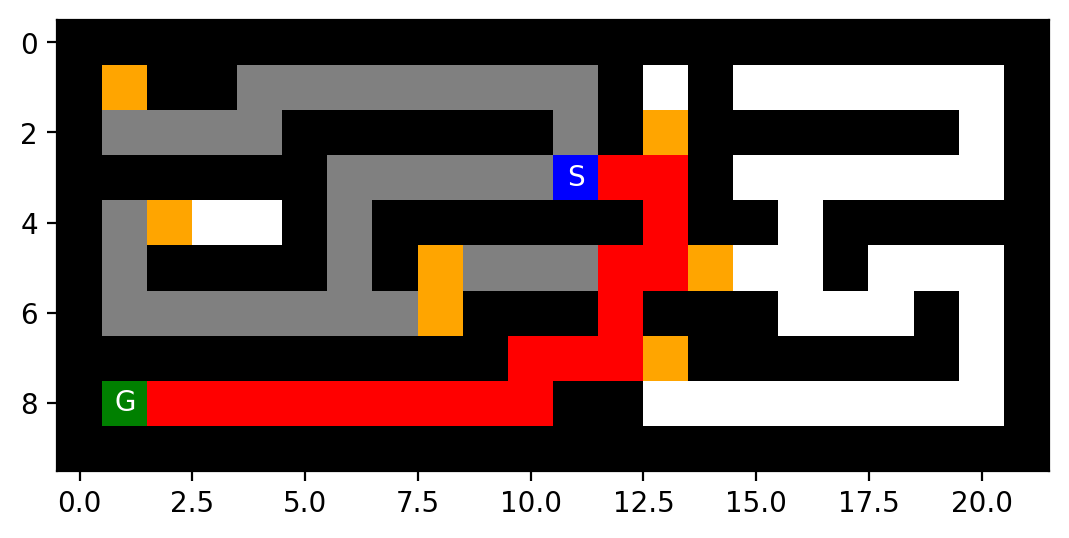

medium_maze.txt


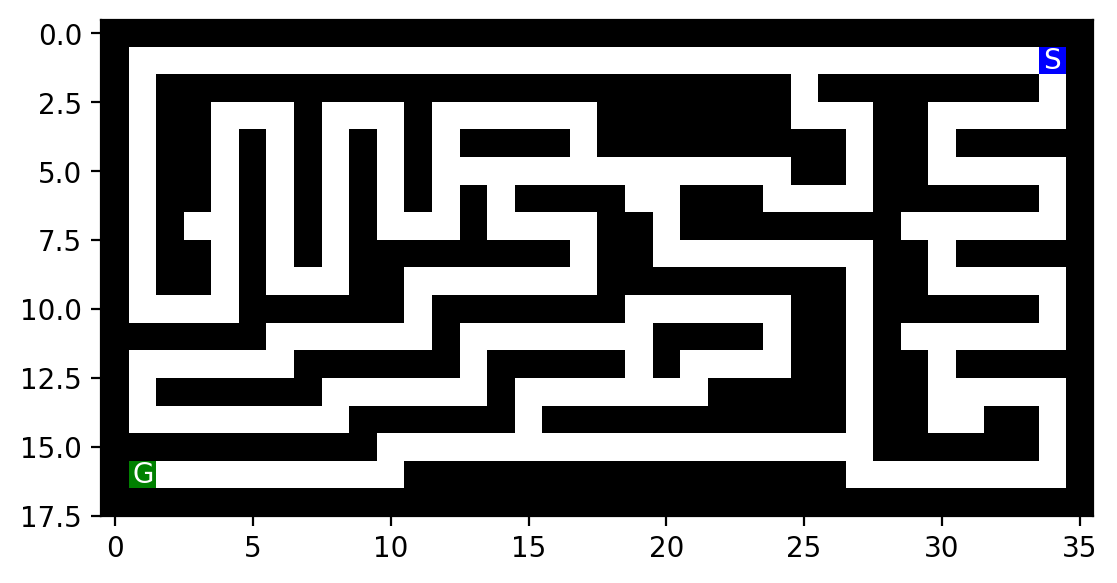

Start Position: (1, 34)
Goal Position: (16, 1)
size: 454
optimal depth: 68
max depth: 68
max bf: 3
Frontier Size: 228
Max nodes in Memory: 228
Path found:
Move and Updated Postion: (East, (1, 33)), (East, (1, 32)), (East, (1, 31)), (East, (1, 30)), (East, (1, 29)), (East, (1, 28)), (East, (1, 27)), (East, (1, 26)), (East, (1, 25)), (South, (2, 25)), (South, (3, 25)), (West, (3, 26)), (West, (3, 27)), (South, (4, 27)), (South, (5, 27)), (South, (6, 27)), (East, (6, 26)), (East, (6, 25)), (East, (6, 24)), (North, (5, 24)), (East, (5, 23)), (East, (5, 22)), (East, (5, 21)), (East, (5, 20)), (South, (6, 20)), (South, (7, 20)), (South, (8, 20)), (West, (8, 21)), (West, (8, 22)), (West, (8, 23)), (West, (8, 24)), (West, (8, 25)), (West, (8, 26)), (West, (8, 27)), (South, (9, 27)), (South, (10, 27)), (South, (11, 27)), (South, (12, 27)), (South, (13, 27)), (South, (14, 27)), (South, (15, 27)), (East, (15, 26)), (East, (15, 25)), (East, (15, 24)), (East, (15, 23)), (East, (15, 22)), (East, (15

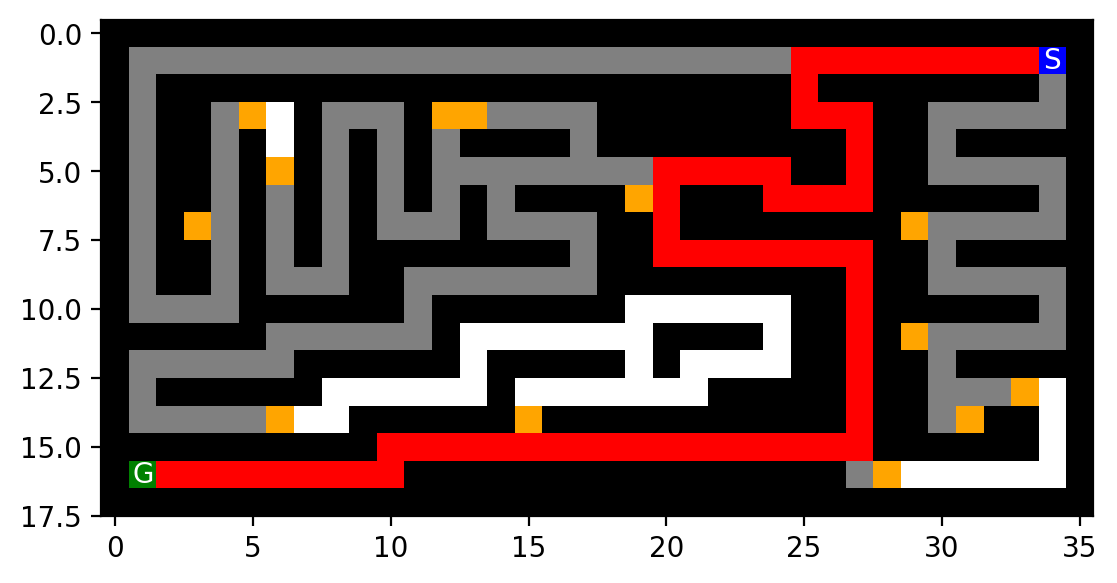

large_maze.txt


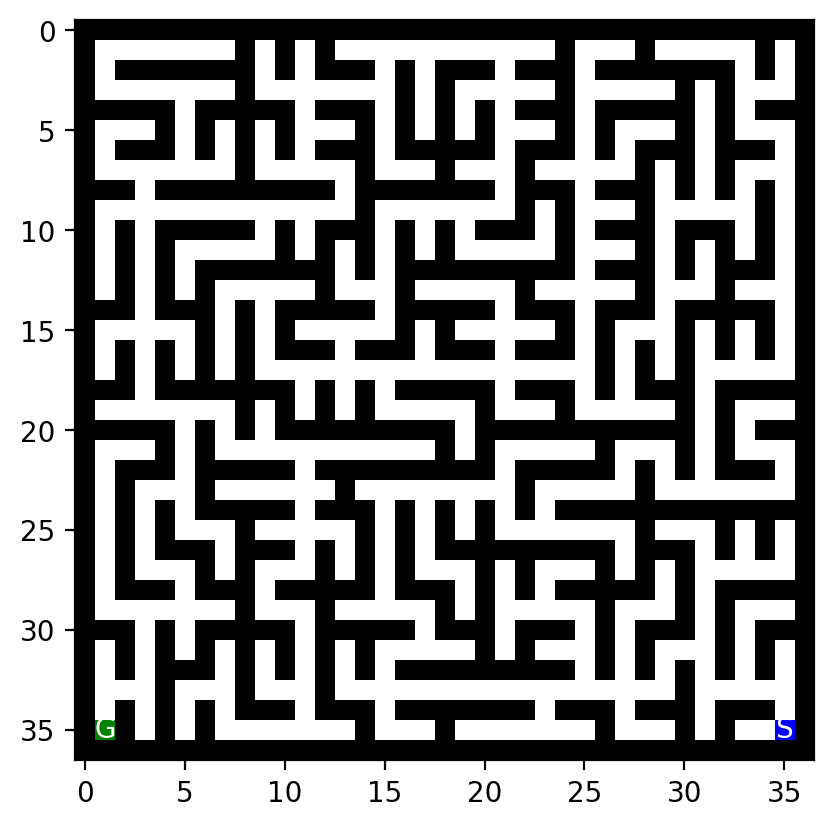

Start Position: (35, 35)
Goal Position: (35, 1)
size: 1105
optimal depth: 210
max depth: 210
max bf: 4
Frontier Size: 557
Max nodes in Memory: 557
Path found:
Move and Updated Postion: (North, (34, 35)), (North, (33, 35)), (East, (33, 34)), (East, (33, 33)), (East, (33, 32)), (East, (33, 31)), (North, (32, 31)), (North, (31, 31)), (East, (31, 30)), (East, (31, 29)), (South, (32, 29)), (South, (33, 29)), (East, (33, 28)), (East, (33, 27)), (East, (33, 26)), (East, (33, 25)), (East, (33, 24)), (East, (33, 23)), (East, (33, 22)), (East, (33, 21)), (East, (33, 20)), (East, (33, 19)), (East, (33, 18)), (East, (33, 17)), (East, (33, 16)), (East, (33, 15)), (North, (32, 15)), (North, (31, 15)), (West, (31, 16)), (West, (31, 17)), (North, (30, 17)), (North, (29, 17)), (East, (29, 16)), (East, (29, 15)), (North, (28, 15)), (North, (27, 15)), (North, (26, 15)), (North, (25, 15)), (North, (24, 15)), (North, (23, 15)), (West, (23, 16)), (West, (23, 17)), (West, (23, 18)), (West, (23, 19)), (West, 

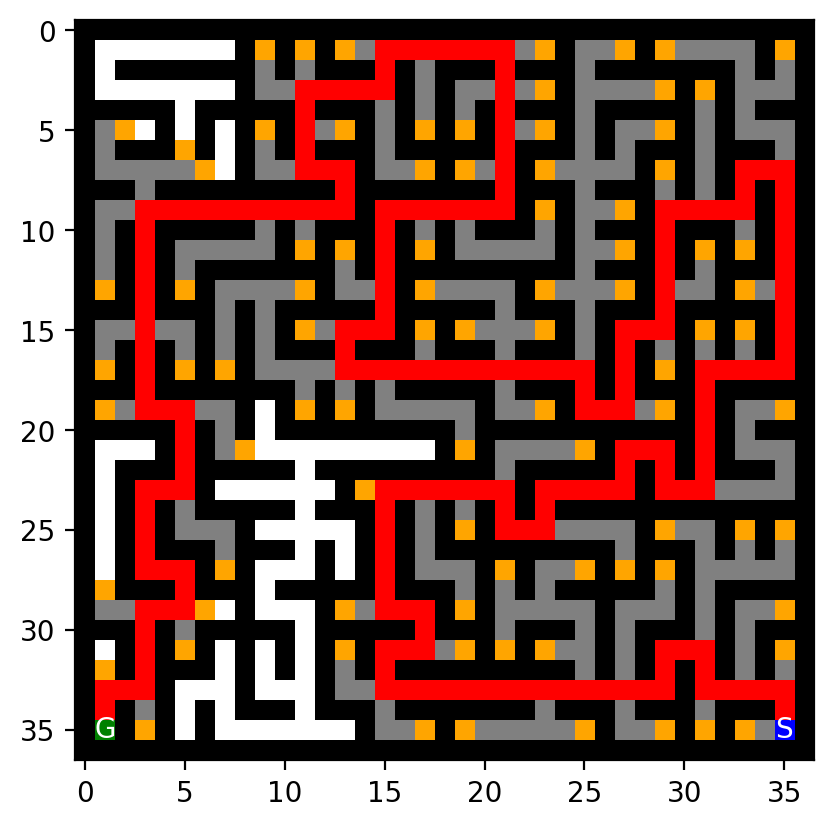

empty_maze.txt


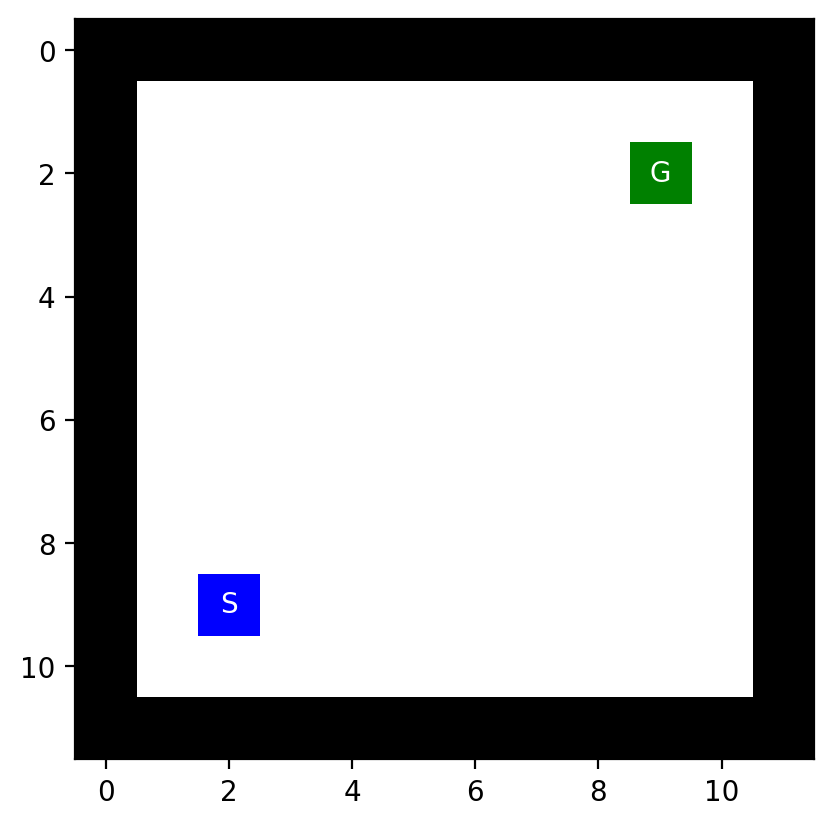

Start Position: (9, 2)
Goal Position: (2, 9)
size: 253
optimal depth: 14
max depth: 14
max bf: 4
Frontier Size: 94
Max nodes in Memory: 94
Path found:
Move and Updated Postion: (North, (8, 2)), (North, (7, 2)), (North, (6, 2)), (North, (5, 2)), (North, (4, 2)), (North, (3, 2)), (West, (3, 3)), (North, (2, 3)), (West, (2, 4)), (West, (2, 5)), (West, (2, 6)), (West, (2, 7)), (West, (2, 8)), (West, (2, 9))


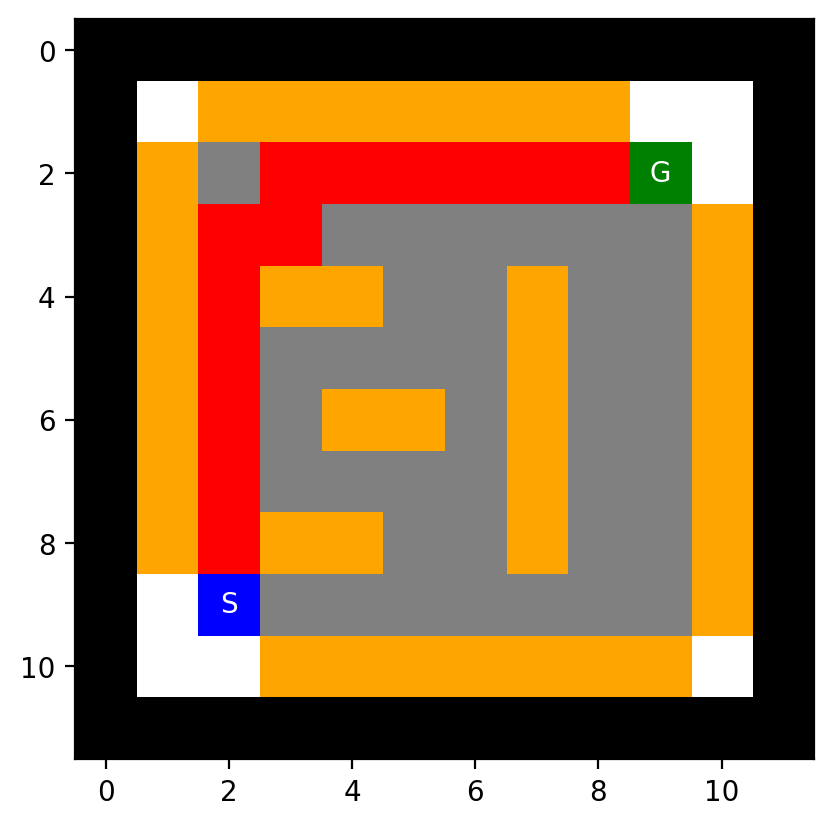

empty_2_maze.txt


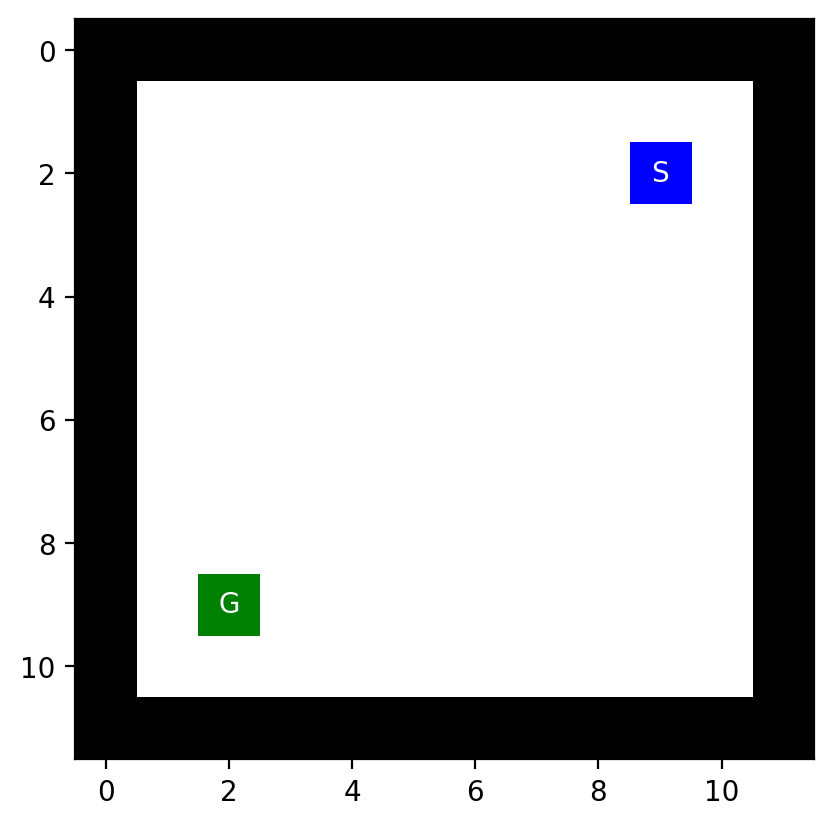

Start Position: (2, 9)
Goal Position: (9, 2)
size: 253
optimal depth: 14
max depth: 14
max bf: 4
Frontier Size: 94
Max nodes in Memory: 94
Path found:
Move and Updated Postion: (South, (3, 9)), (South, (4, 9)), (South, (5, 9)), (South, (6, 9)), (South, (7, 9)), (South, (8, 9)), (South, (9, 9)), (East, (9, 8)), (East, (9, 7)), (East, (9, 6)), (East, (9, 5)), (East, (9, 4)), (East, (9, 3)), (East, (9, 2))


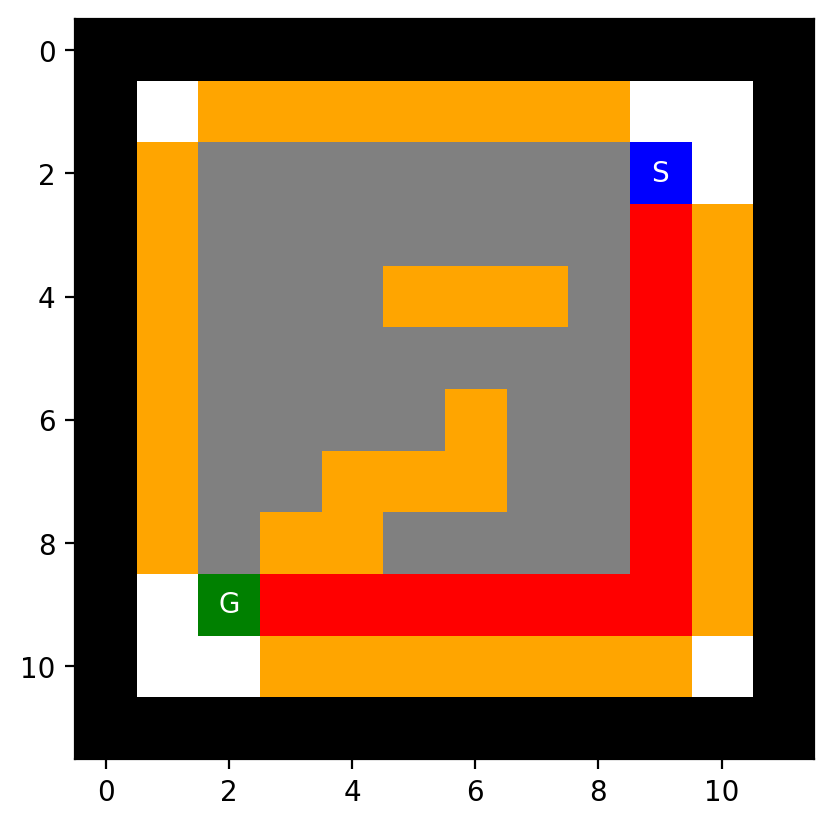

loops_maze.txt


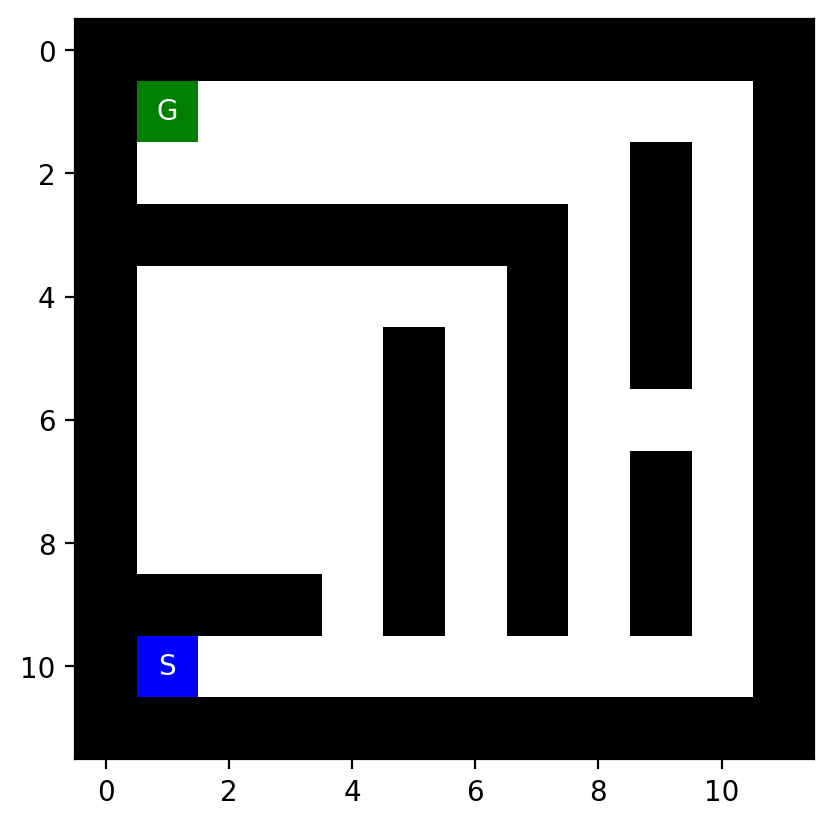

Start Position: (10, 1)
Goal Position: (1, 1)
size: 158
optimal depth: 23
max depth: 23
max bf: 4
Frontier Size: 62
Max nodes in Memory: 62
Path found:
Move and Updated Postion: (West, (10, 2)), (West, (10, 3)), (West, (10, 4)), (West, (10, 5)), (West, (10, 6)), (West, (10, 7)), (West, (10, 8)), (North, (9, 8)), (North, (8, 8)), (North, (7, 8)), (North, (6, 8)), (North, (5, 8)), (North, (4, 8)), (North, (3, 8)), (North, (2, 8)), (North, (1, 8)), (East, (1, 7)), (East, (1, 6)), (East, (1, 5)), (East, (1, 4)), (East, (1, 3)), (East, (1, 2)), (East, (1, 1))


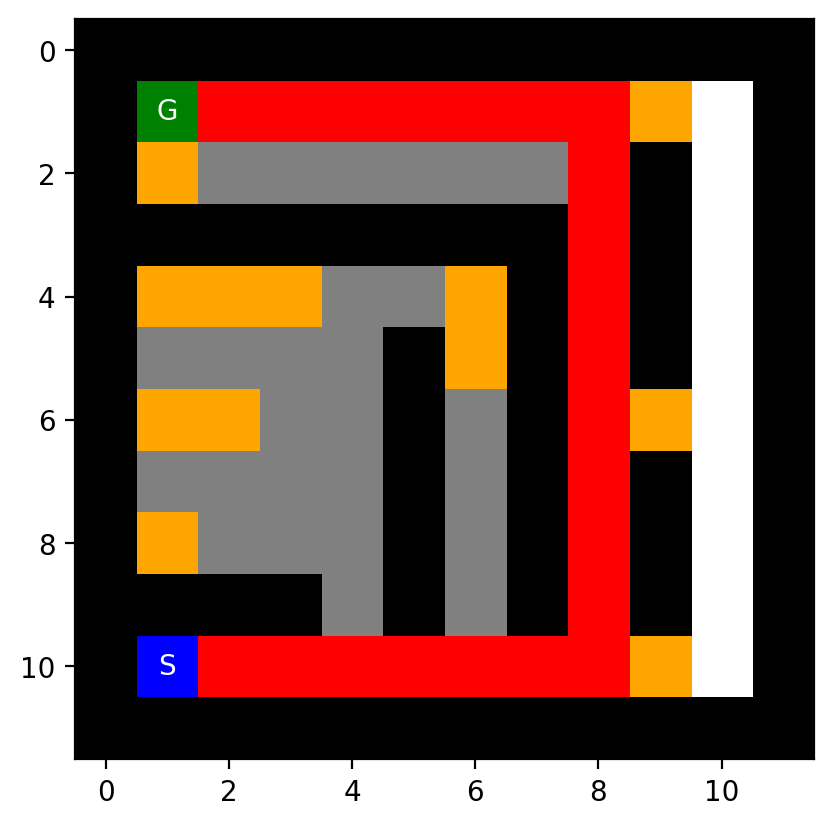

open_maze.txt


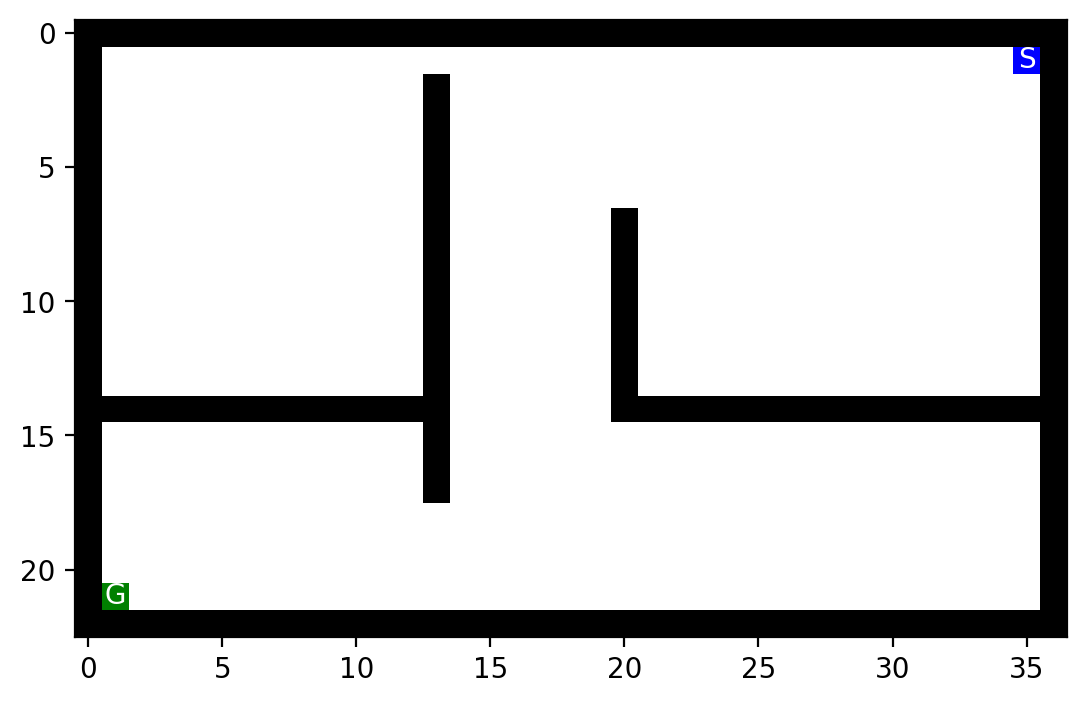

Start Position: (1, 35)
Goal Position: (21, 1)
size: 1986
optimal depth: 54
max depth: 54
max bf: 4
Frontier Size: 555
Max nodes in Memory: 555
Path found:
Move and Updated Postion: (South, (2, 35)), (South, (3, 35)), (South, (4, 35)), (East, (4, 34)), (East, (4, 33)), (South, (5, 33)), (South, (6, 33)), (East, (6, 32)), (East, (6, 31)), (East, (6, 30)), (East, (6, 29)), (East, (6, 28)), (East, (6, 27)), (East, (6, 26)), (East, (6, 25)), (East, (6, 24)), (East, (6, 23)), (East, (6, 22)), (East, (6, 21)), (East, (6, 20)), (East, (6, 19)), (East, (6, 18)), (East, (6, 17)), (East, (6, 16)), (East, (6, 15)), (East, (6, 14)), (South, (7, 14)), (South, (8, 14)), (South, (9, 14)), (South, (10, 14)), (South, (11, 14)), (South, (12, 14)), (South, (13, 14)), (South, (14, 14)), (South, (15, 14)), (South, (16, 14)), (South, (17, 14)), (South, (18, 14)), (East, (18, 13)), (East, (18, 12)), (East, (18, 11)), (East, (18, 10)), (East, (18, 9)), (East, (18, 8)), (East, (18, 7)), (East, (18, 6)), (East,

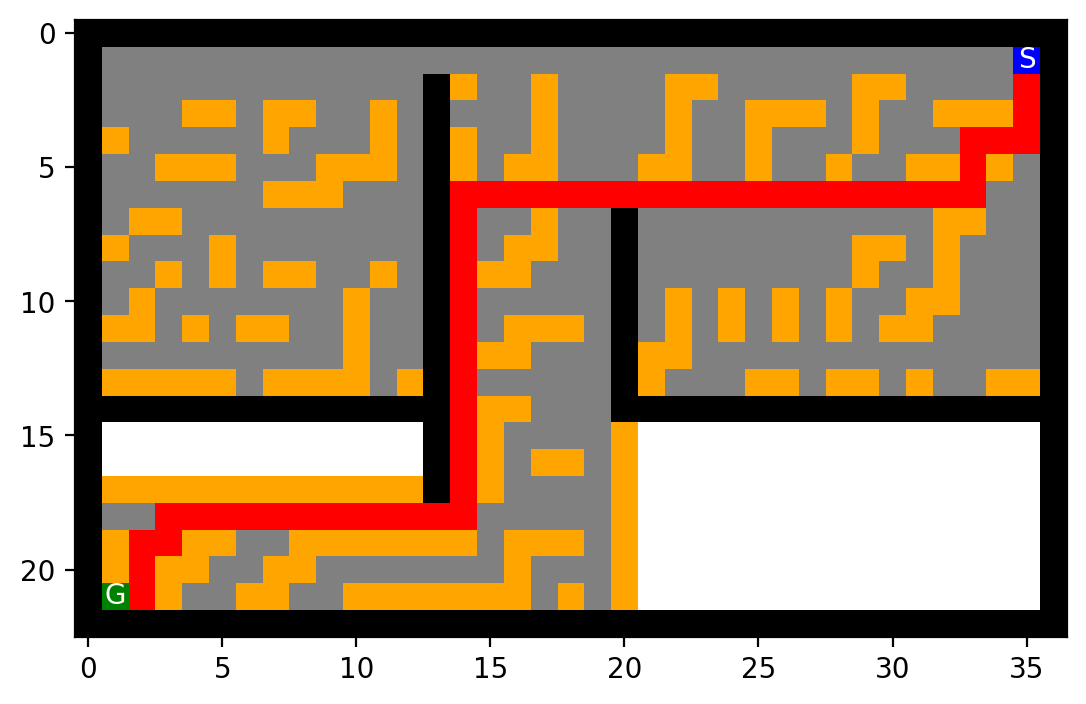

wall_maze.txt


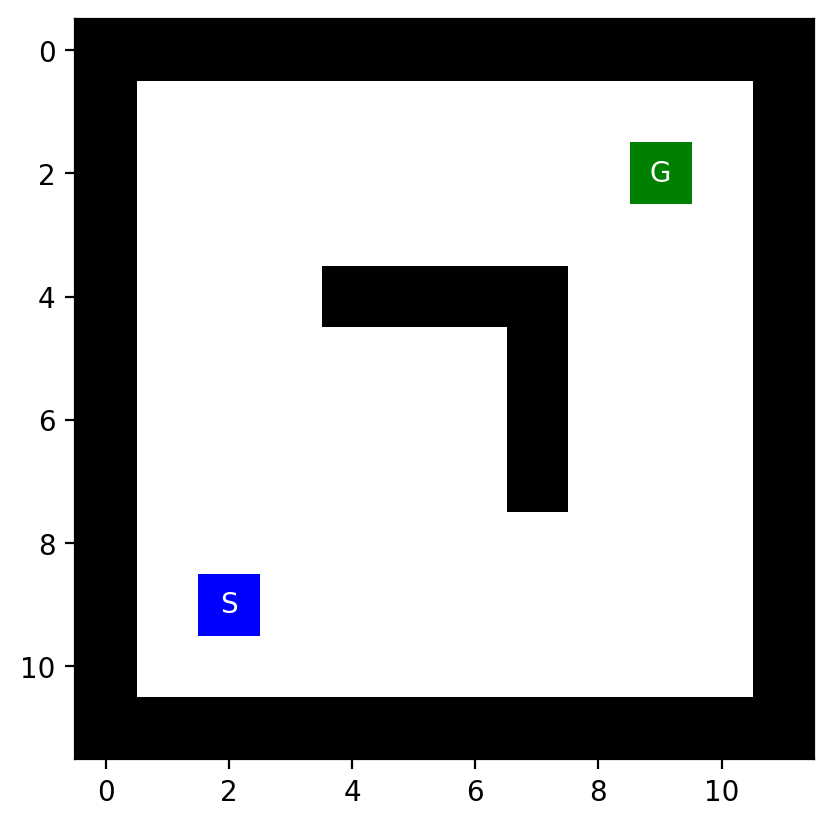

Start Position: (9, 2)
Goal Position: (2, 9)
size: 209
optimal depth: 14
max depth: 14
max bf: 4
Frontier Size: 87
Max nodes in Memory: 87
Path found:
Move and Updated Postion: (North, (8, 2)), (North, (7, 2)), (North, (6, 2)), (North, (5, 2)), (North, (4, 2)), (North, (3, 2)), (West, (3, 3)), (West, (3, 4)), (West, (3, 5)), (North, (2, 5)), (West, (2, 6)), (West, (2, 7)), (West, (2, 8)), (West, (2, 9))


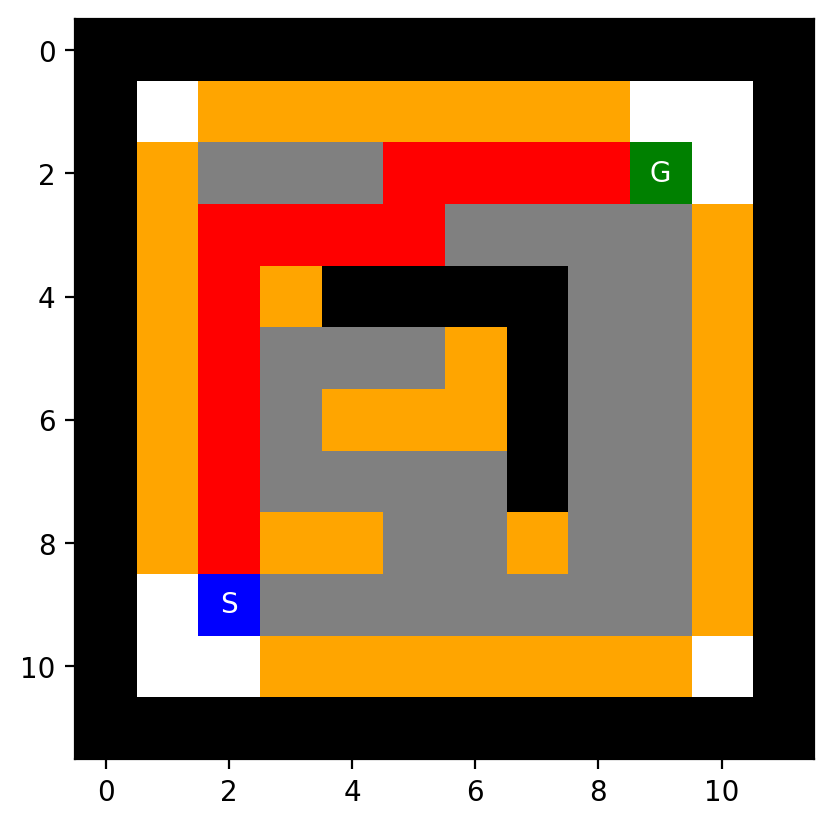

In [103]:
mazeSizes = ["small_maze.txt","medium_maze.txt","large_maze.txt","empty_maze.txt","empty_2_maze.txt","loops_maze.txt","open_maze.txt","wall_maze.txt"]
for mazes in mazeSizes:
    print(mazes)
    with open(mazes, "r") as f:
        maze_str = f.read()
    maze = mh.parse_maze(maze_str)
    mh.show_maze(maze)
    start = mh.find_pos(maze, what="S")
    goal = mh.find_pos(maze, what="G")
    print("Start Position:", start)
    print("Goal Position:", goal)
    root = Node(start, None, None, 0)
    path, n, d, m, b, frontier_size, max_nodes_in_memory = a_cost_search(maze, root, goal)
    print('size:', n)
    print('optimal depth:', d)
    print('max depth:', m)
    print('max bf:', b)
    print('Frontier Size:', frontier_size)
    print('Max nodes in Memory:', max_nodes_in_memory)
    if path:
        df_stats = df_stats.append({'Algorithm': 'A*',
                            'Maze': mazes,
                            'Size': n,
                            'Optimal_Depth': d,
                            'Max_Depth': m,
                            'Max_Branching_Factor': b,
                            'Frontier_Size': frontier_size,
                            'Max_Nodes_in_Memory':max_nodes_in_memory}, ignore_index=True)
        print("Path found:")
        actions_and_positions = []
        for i, node in enumerate(path):
            if i == 0:
                continue  # Skip the first node as it is the starting position
            action = node.action
            current_position = node.pos
            actions_and_positions.append((action, current_position))
            if node.pos != start and node.pos != goal:
                maze[node.pos[0]][node.pos[1]] = "P"
        print("Move and Updated Postion:", ", ".join([f"({action}, {current_position})" for action, current_position in actions_and_positions]))
    else:
        print("No path found")
    mh.show_maze(maze)


Are your implementations complete and optimal? What is the time and space complexity?


Both Greedy Best First Search and A\* have heuristic functions defined and utilized. For GBS, the heuristic is calculated as the manhatten distance the from the current node to the Goal whereas, the A\*, the heuristic is calculated as sum of the distance until the current node and manhatten distance from current node to the goal. Thus, A\* gives a broader picture and thus finds the optimal path.

The Greedy Best First Search and A\* run for all the mazes given in the problem. They follow the approach as given in the pseudocode (slides).

d - depth of optimal solution
m - max depth of tree
b - branch factor

Space Complexity:
1. GBS: O(b^m)
2. A*: O(b^d)


Time Complexity:
1. GBS: O(b^m)
2. A*: O(b^d)

Though, the the worst case for A\* shows up as O(b^d), given the heuristic function is accurate, we can say that the time and space complexities of
A\* < O(b^d).


## Task 4: Comparison and discussion [20 Points]

Run experiments to compare the implemented algorithms.

How to deal with issues:

* Your implementation returns unexpected results: Try to debug and fix the code. Visualizing the maze, the current path and the frontier after every step is very helpful. If the code still does not work, then mark the result with an asterisk (*) and describe the issue below the table.

* Your implementation cannot consistently solve a specific maze and ends up in an infinite loop:
    Debug. If it is a shortcoming of the algorithm/implementation, then put "N/A*" in the results table and describe why this is happening.

BFS, DFS, GBS and A\* run for all the mazes with exception for the following case:
1. DFS on Open Maze: My DFS implementation always ensures that the current node is not already present in the path and only then adds the node to the path. However, the code runs into the room and and is unable to exit and thus, gets stuck in an infinte loop in case of an open maze.

In [104]:
# Add code
df_stats

,Algorithm,Maze,Size,Optimal_Depth,Max_Depth,Max_Branching_Factor,Frontier_Size,Max_Nodes_in_Memory
0,BFS,small_maze.txt,189,19,20,3,94,94
1,BFS,medium_maze.txt,552,68,69,3,272,272
2,BFS,large_maze.txt,1241,210,210,4,623,623
3,BFS,empty_maze.txt,346,14,15,4,98,98
4,BFS,empty_2_maze.txt,346,14,15,4,98,98
5,BFS,loops_maze.txt,185,23,23,4,72,72
6,BFS,open_maze.txt,2519,54,54,4,684,684
7,BFS,wall_maze.txt,302,14,15,4,91,91
8,DFS,small_maze.txt,151,49,49,3,79,79
9,DFS,medium_maze.txt,302,130,130,3,155,155


Complete the following table for each maze.

__Small maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |           |                |                |               |                   |
| DFS       |           |                |                |               |                   |
| GBS       |           |                |                |               |                   |
| A*        |           |                |                |               |                   |

__Medium Maze__

...

Present the results as using charts (see [Python Code Examples/charts and tables](../HOWTOs/charts_and_tables.ipynb)).

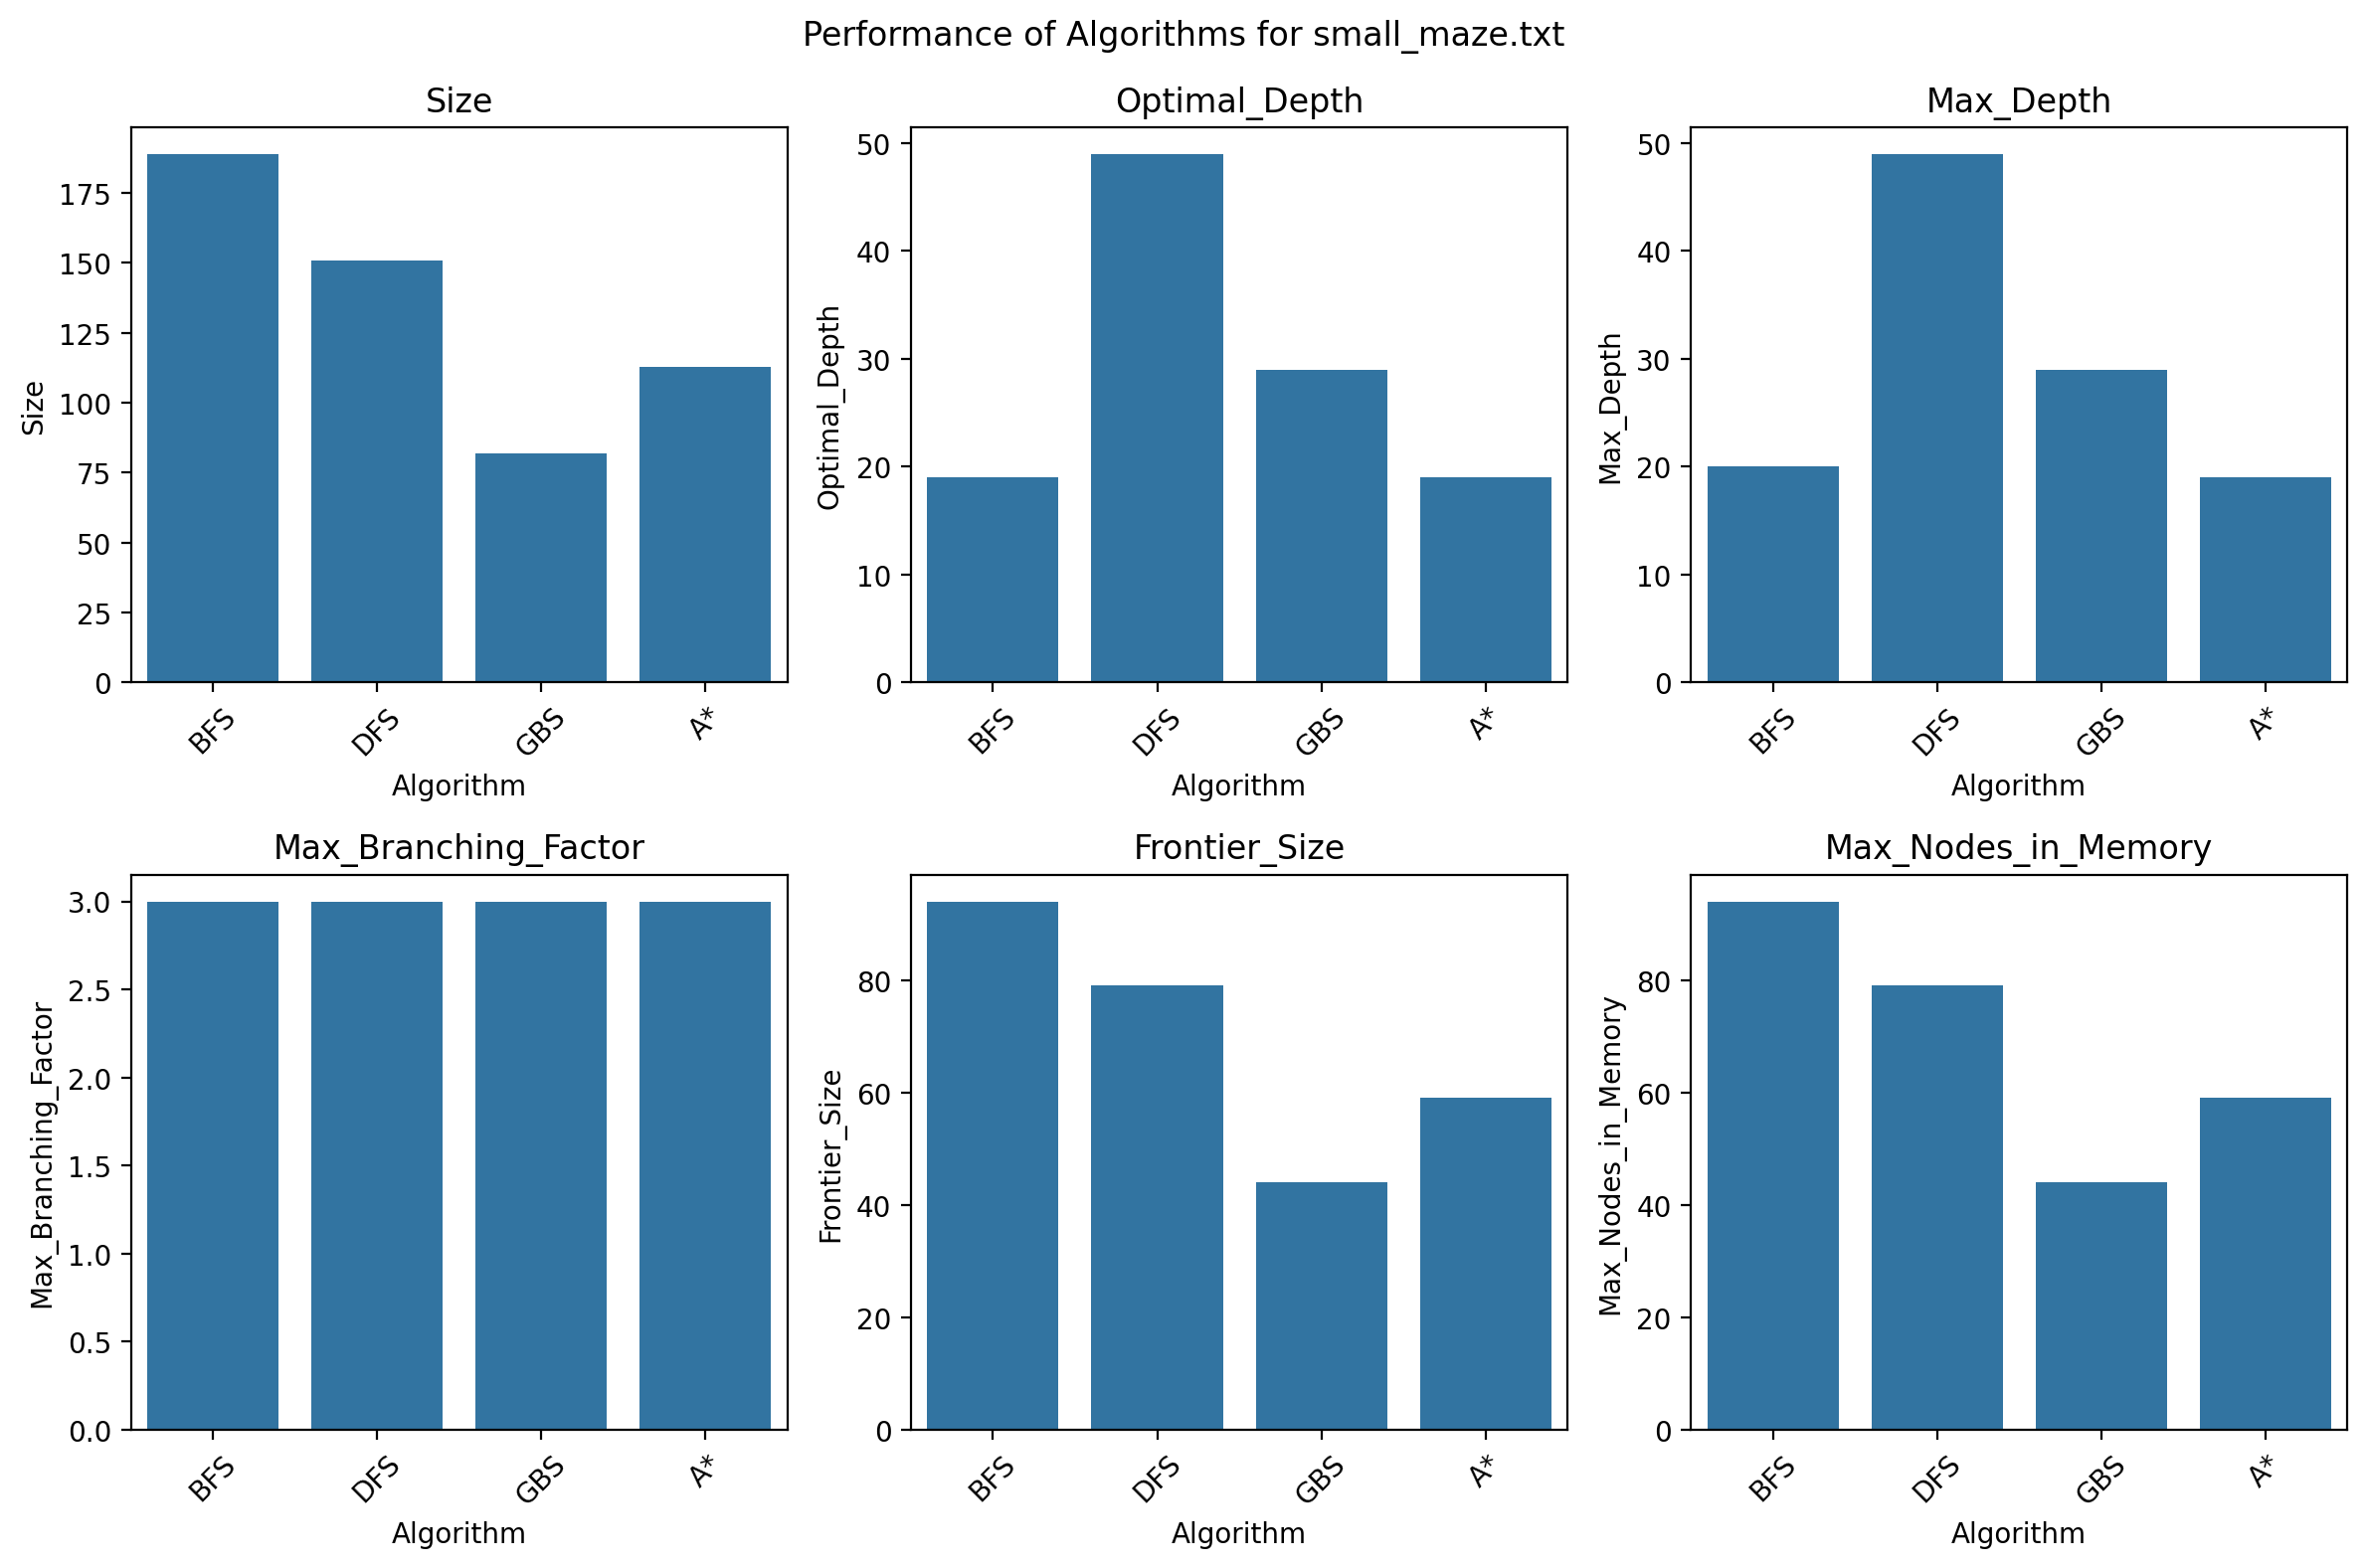

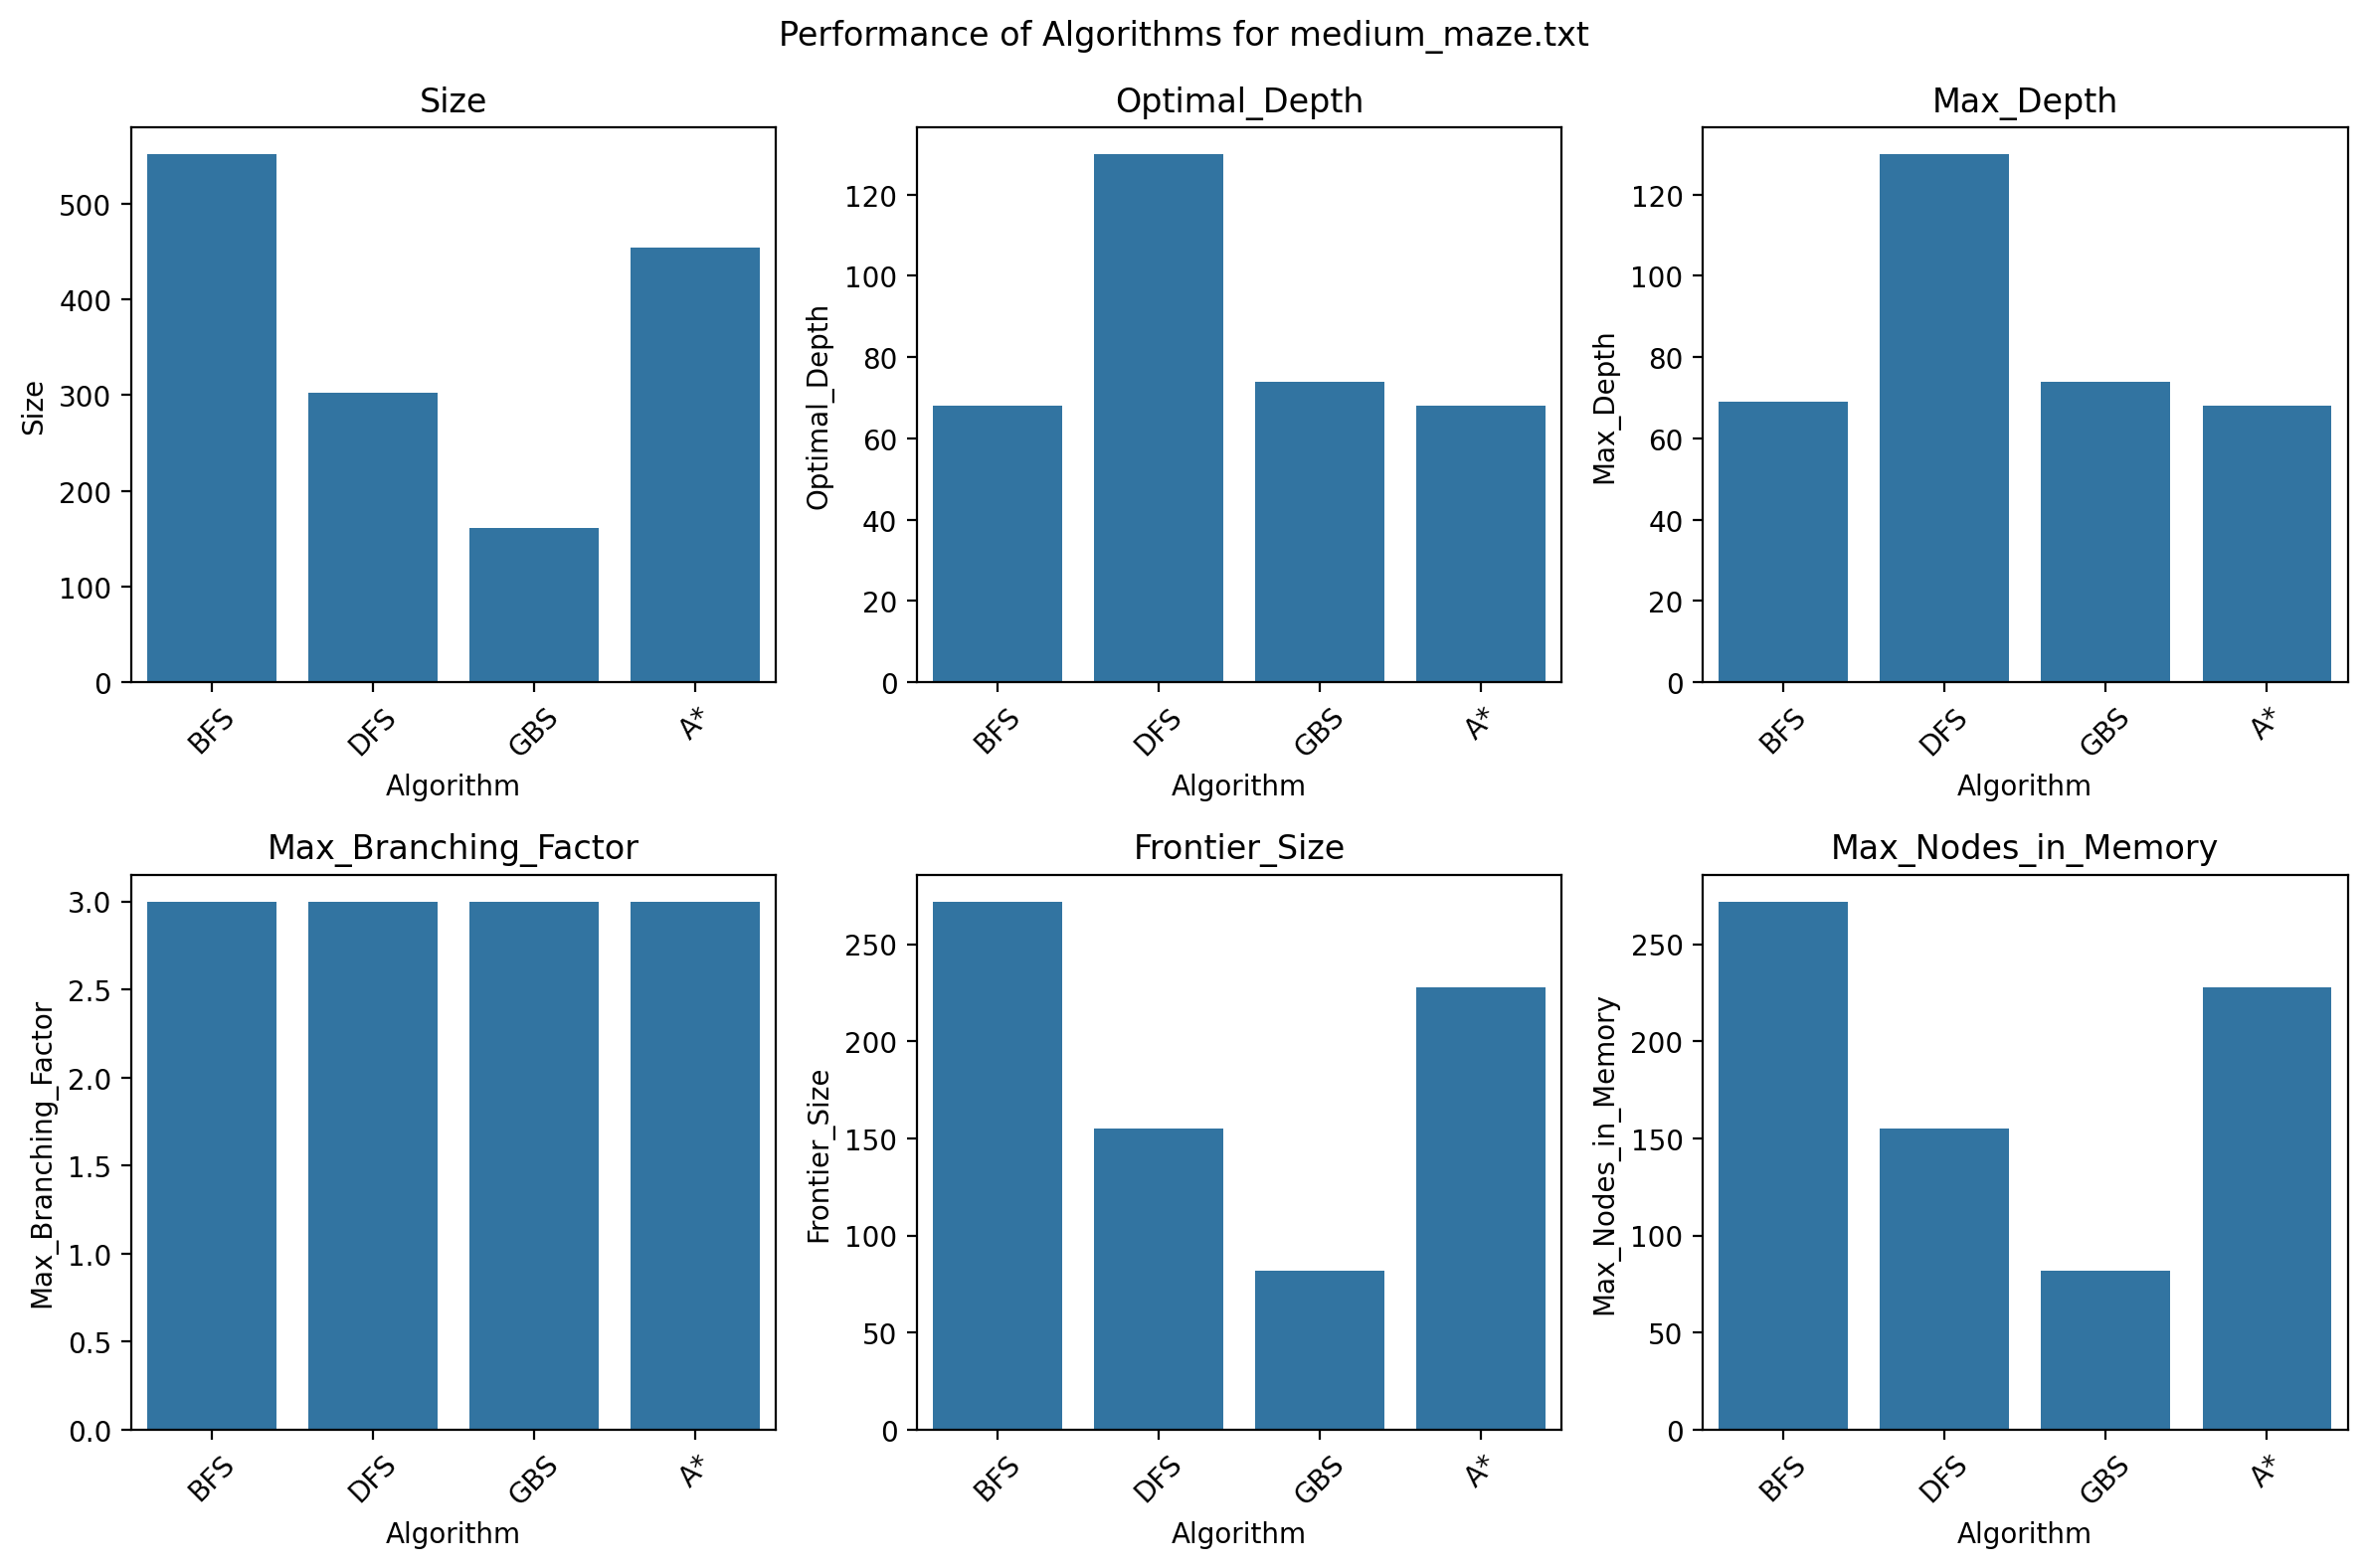

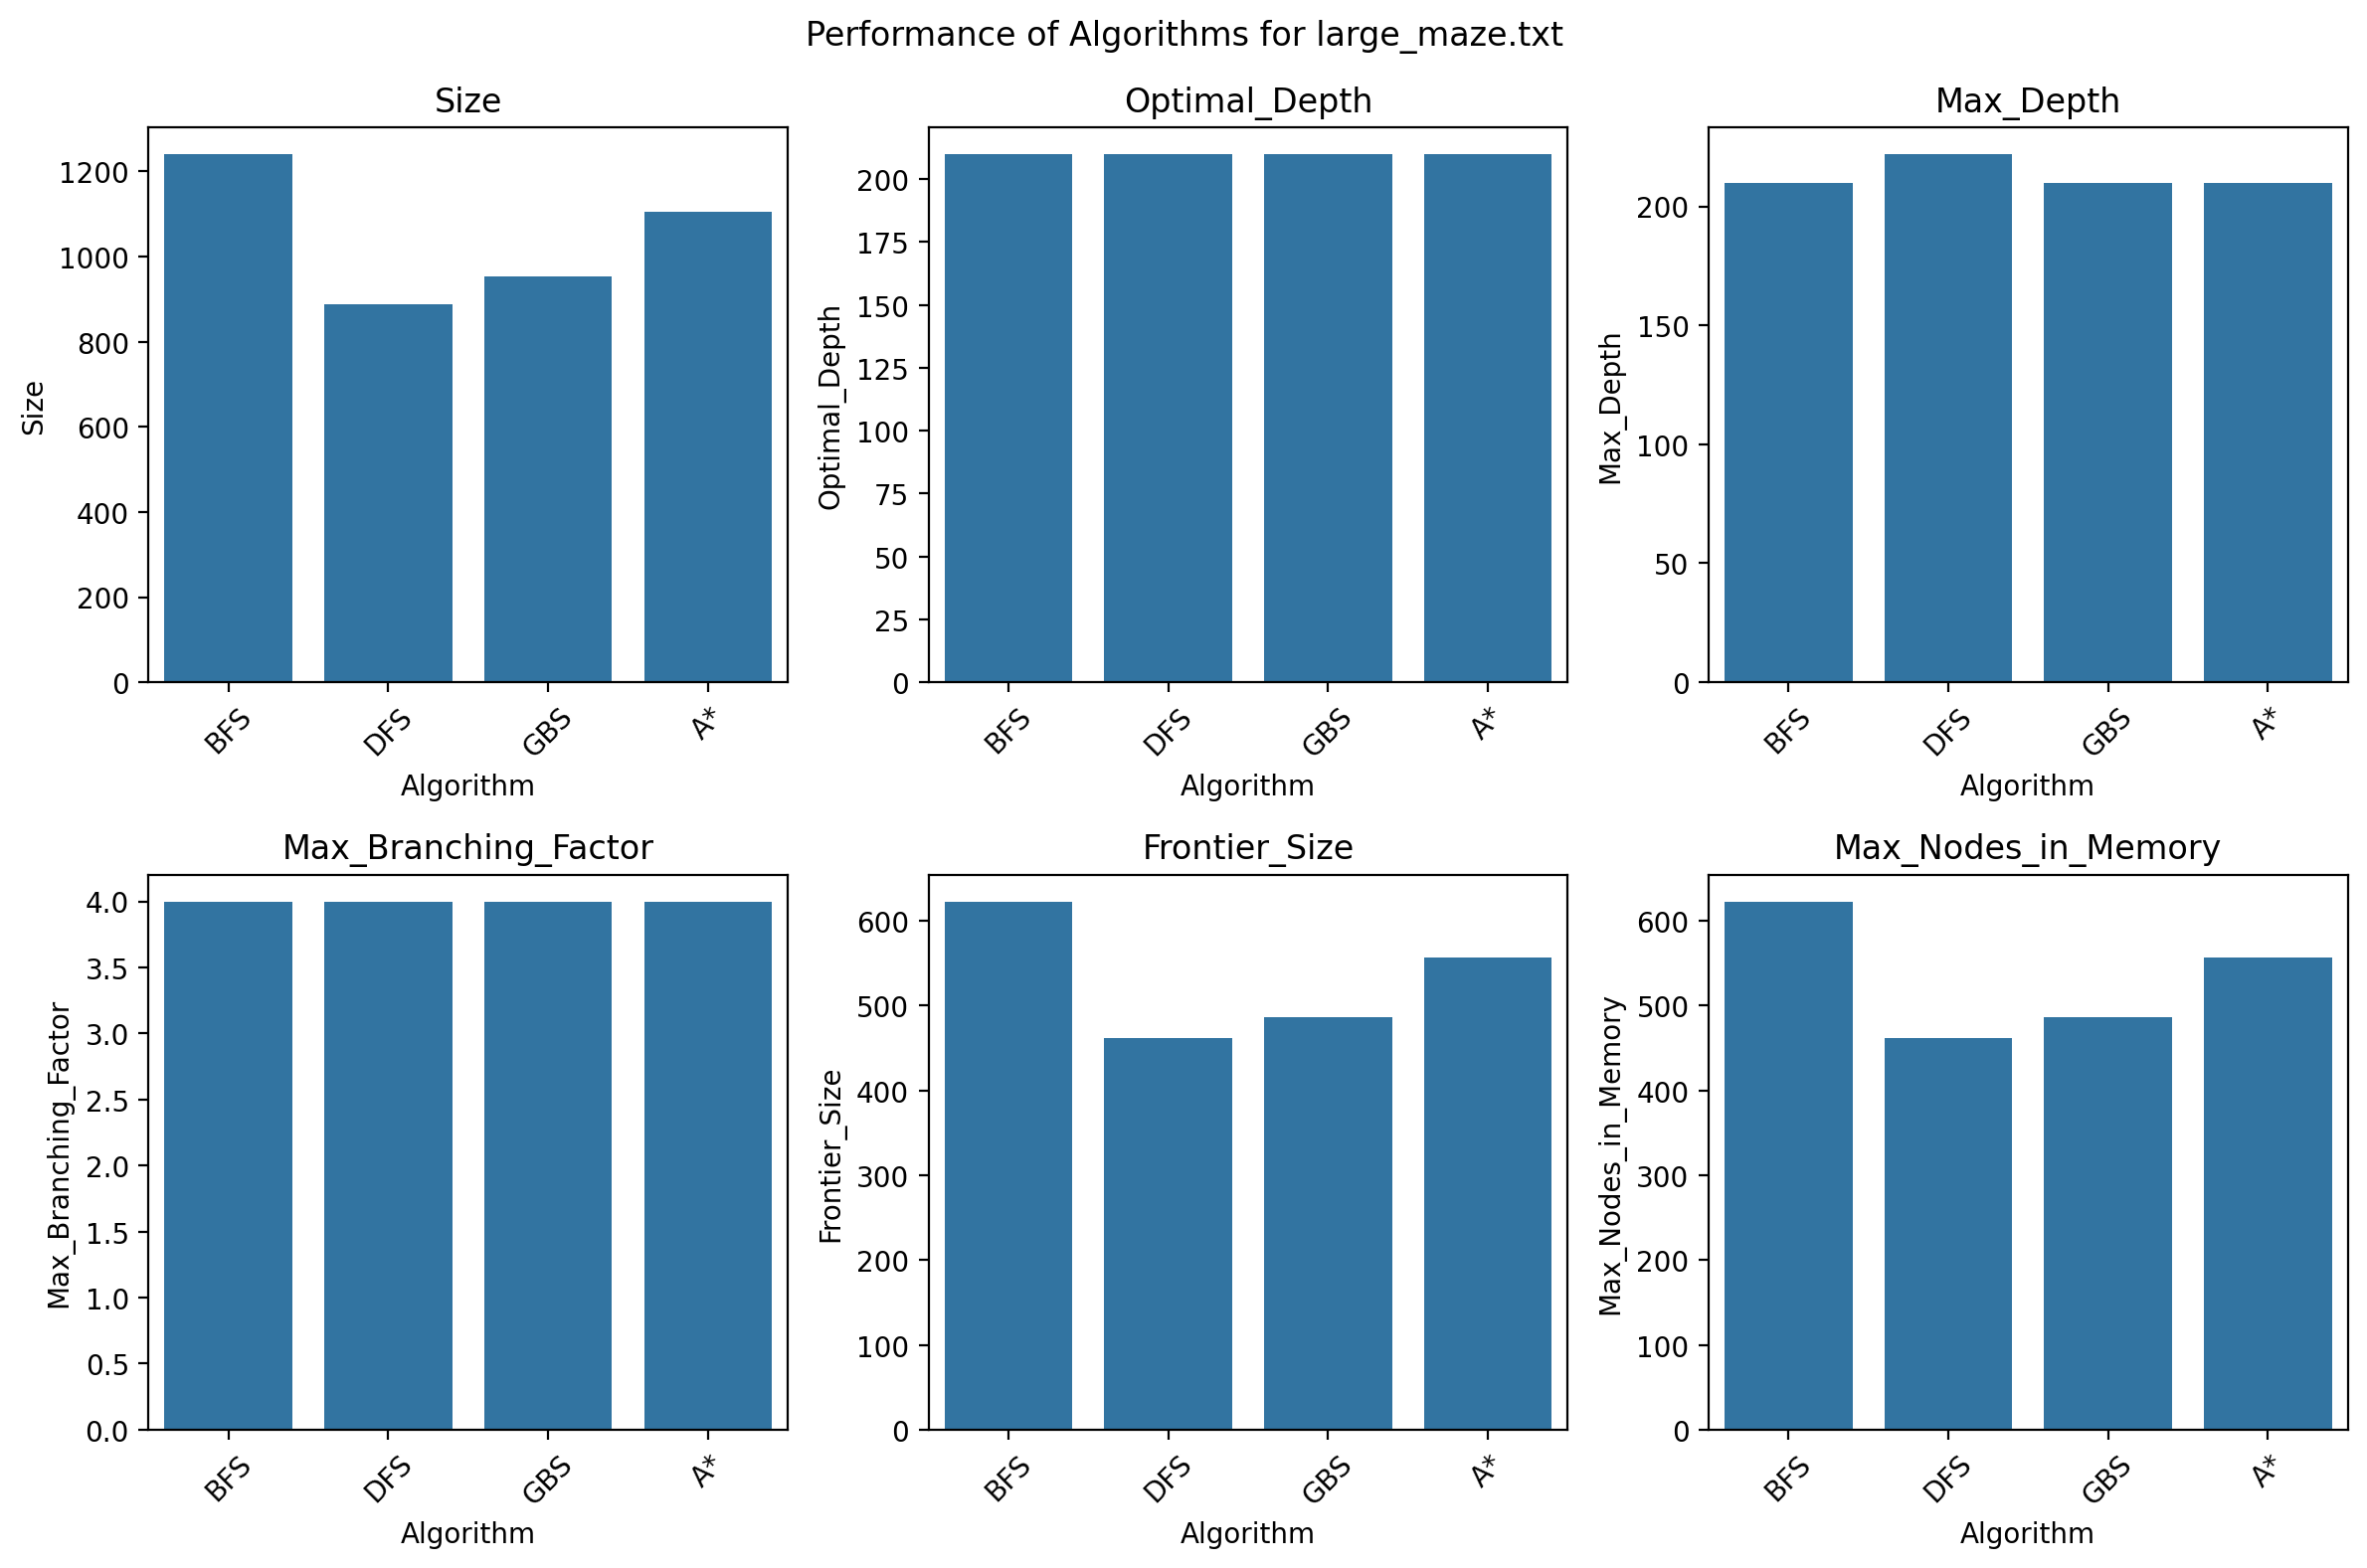

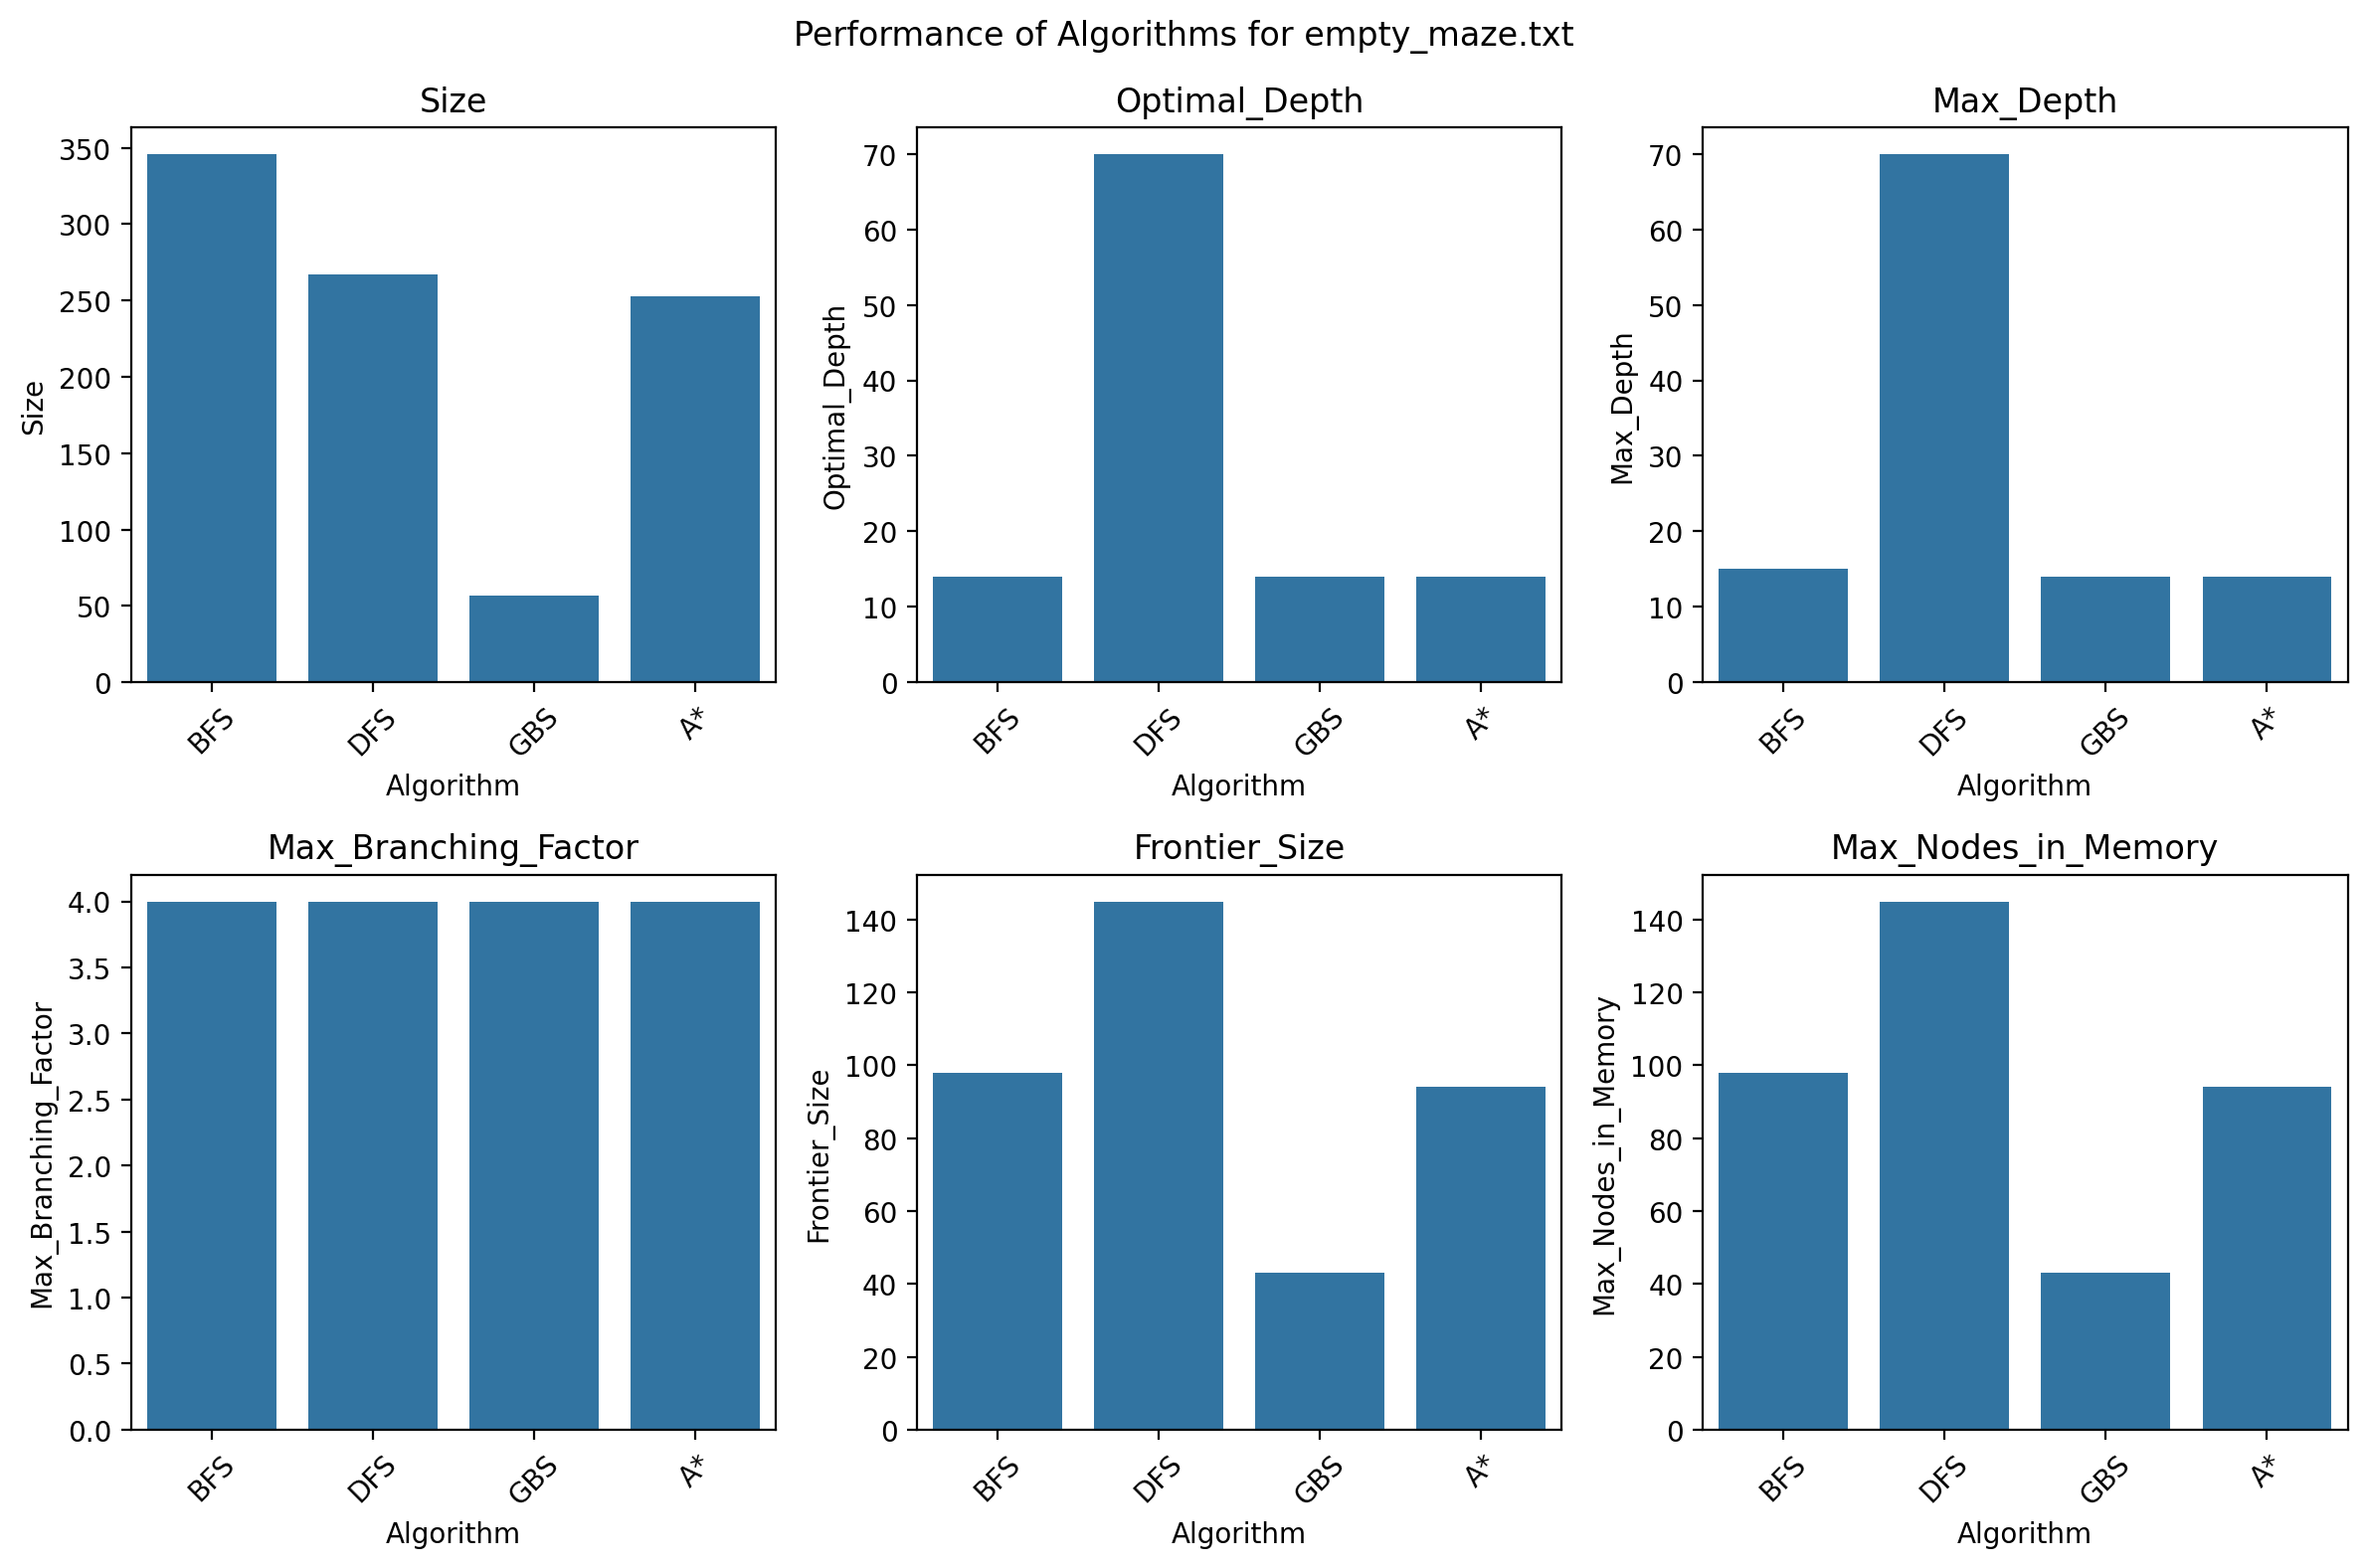

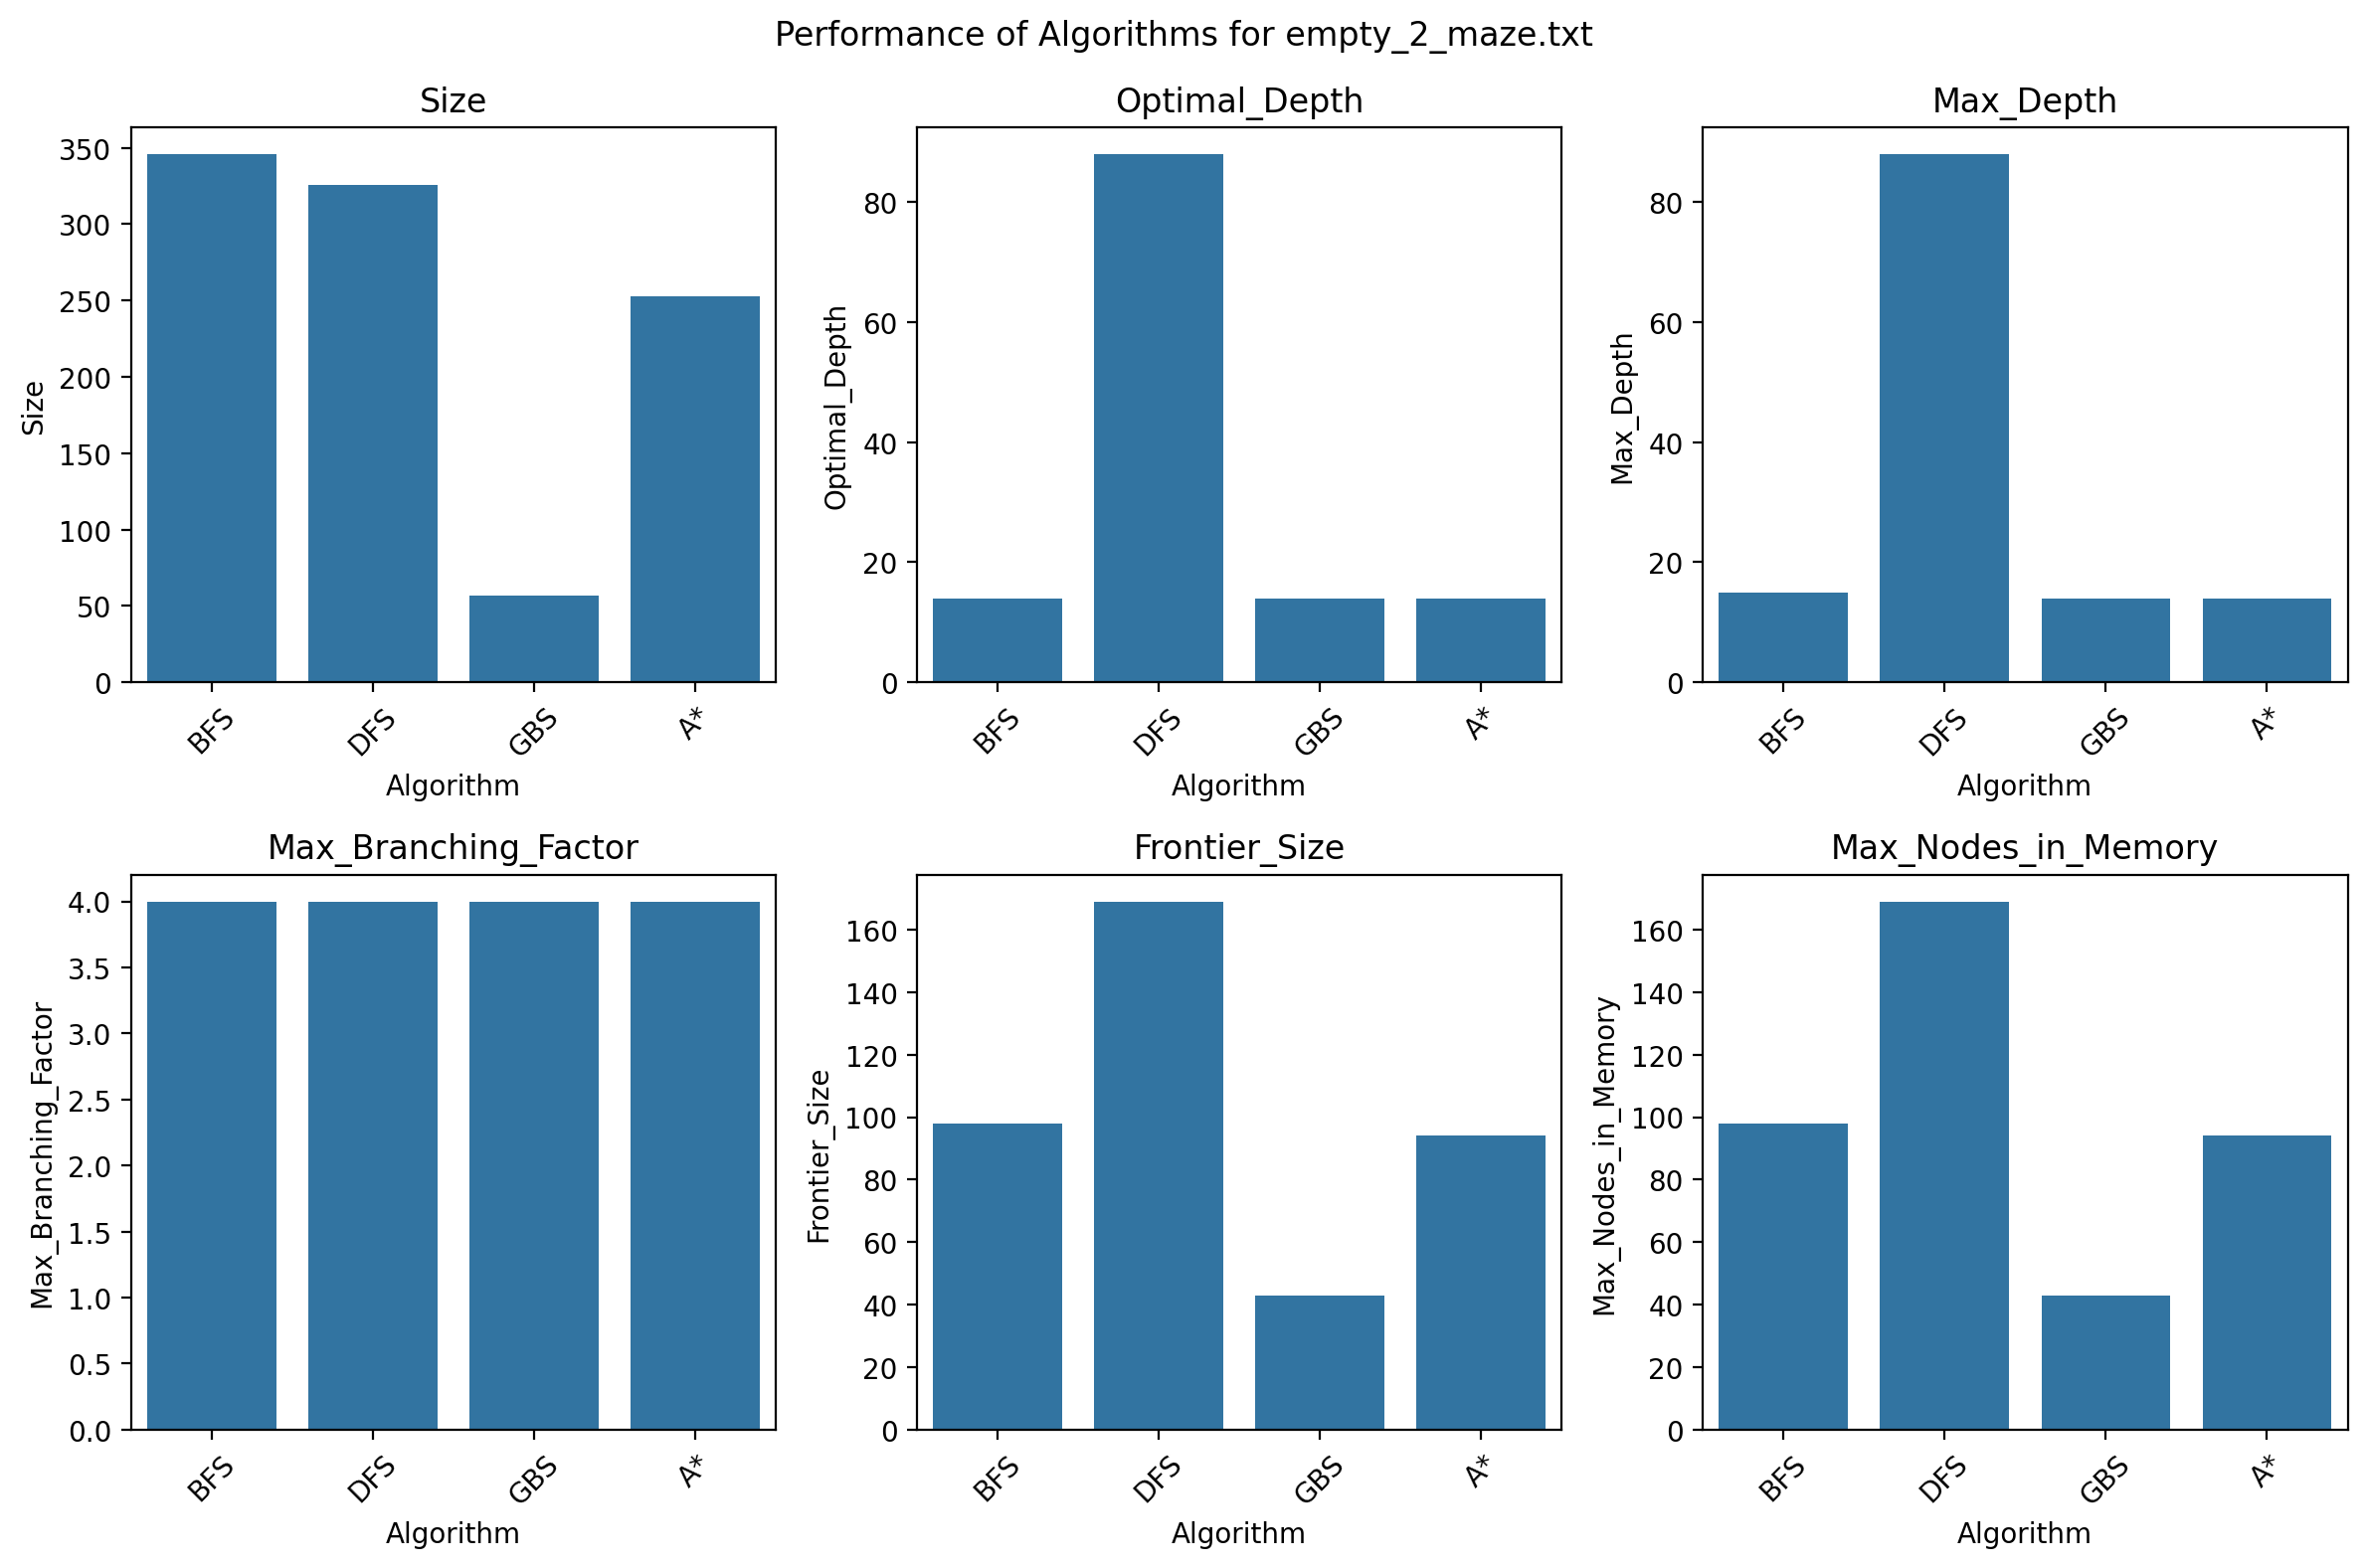

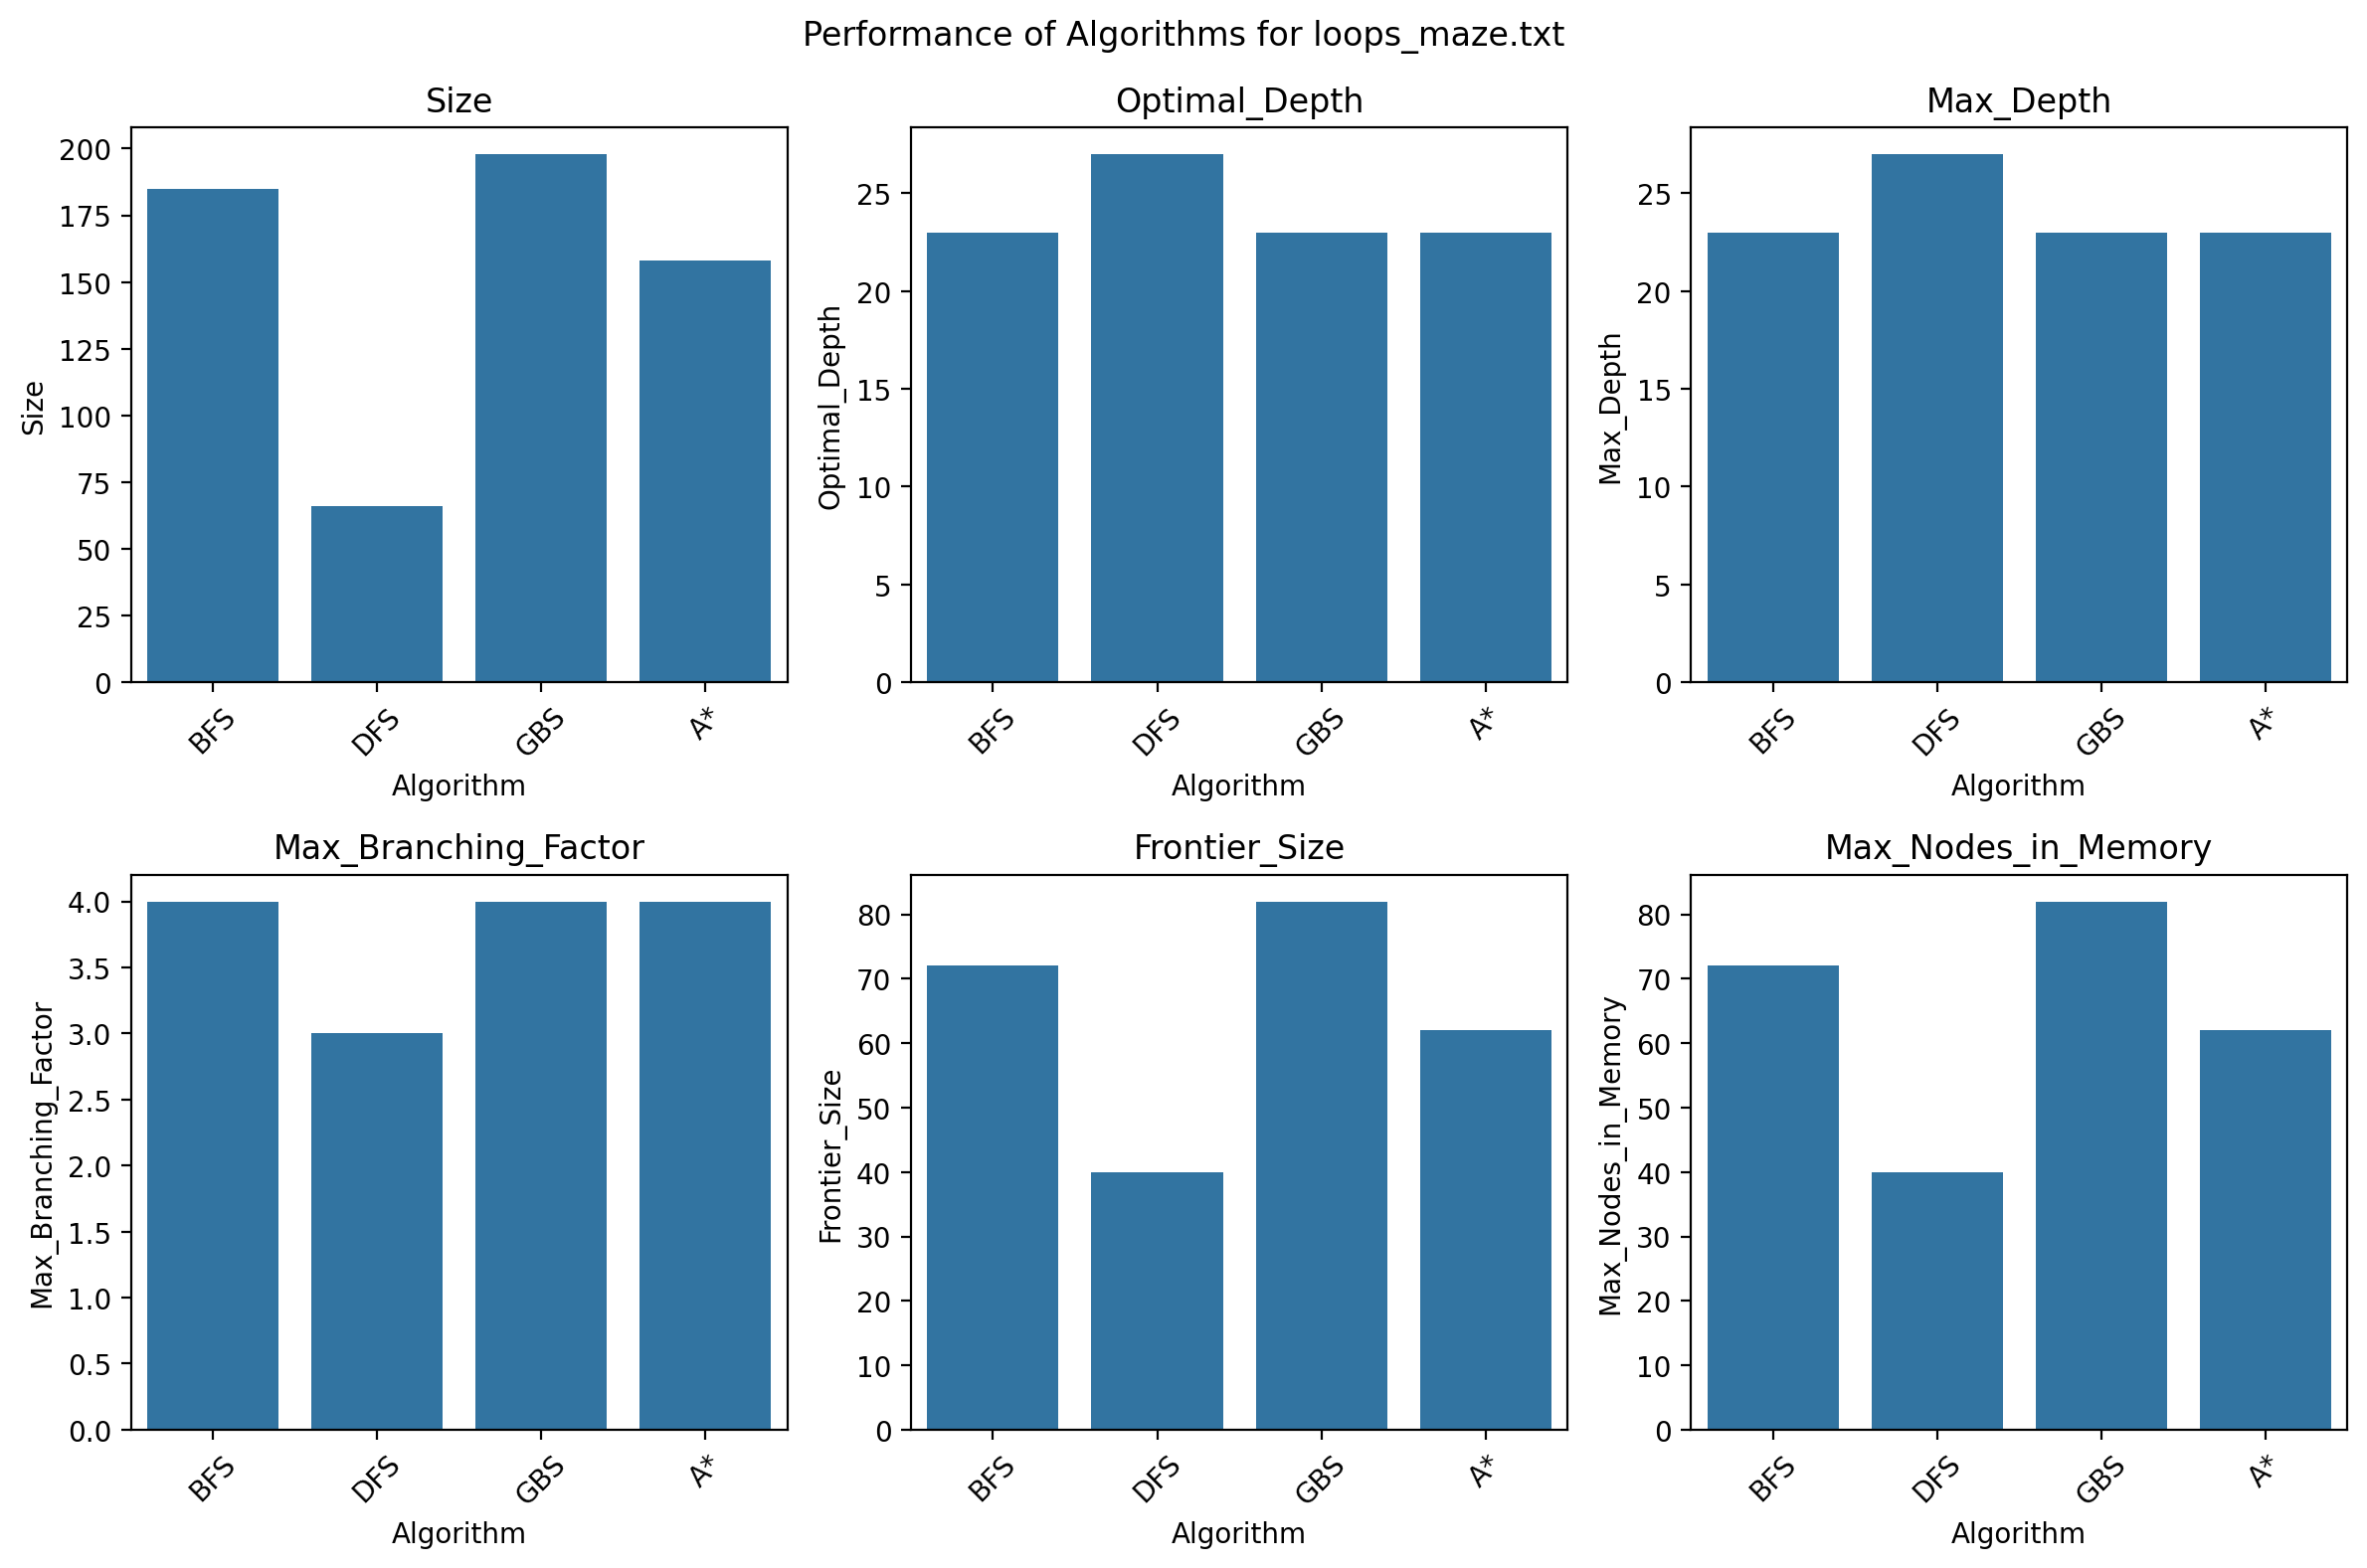

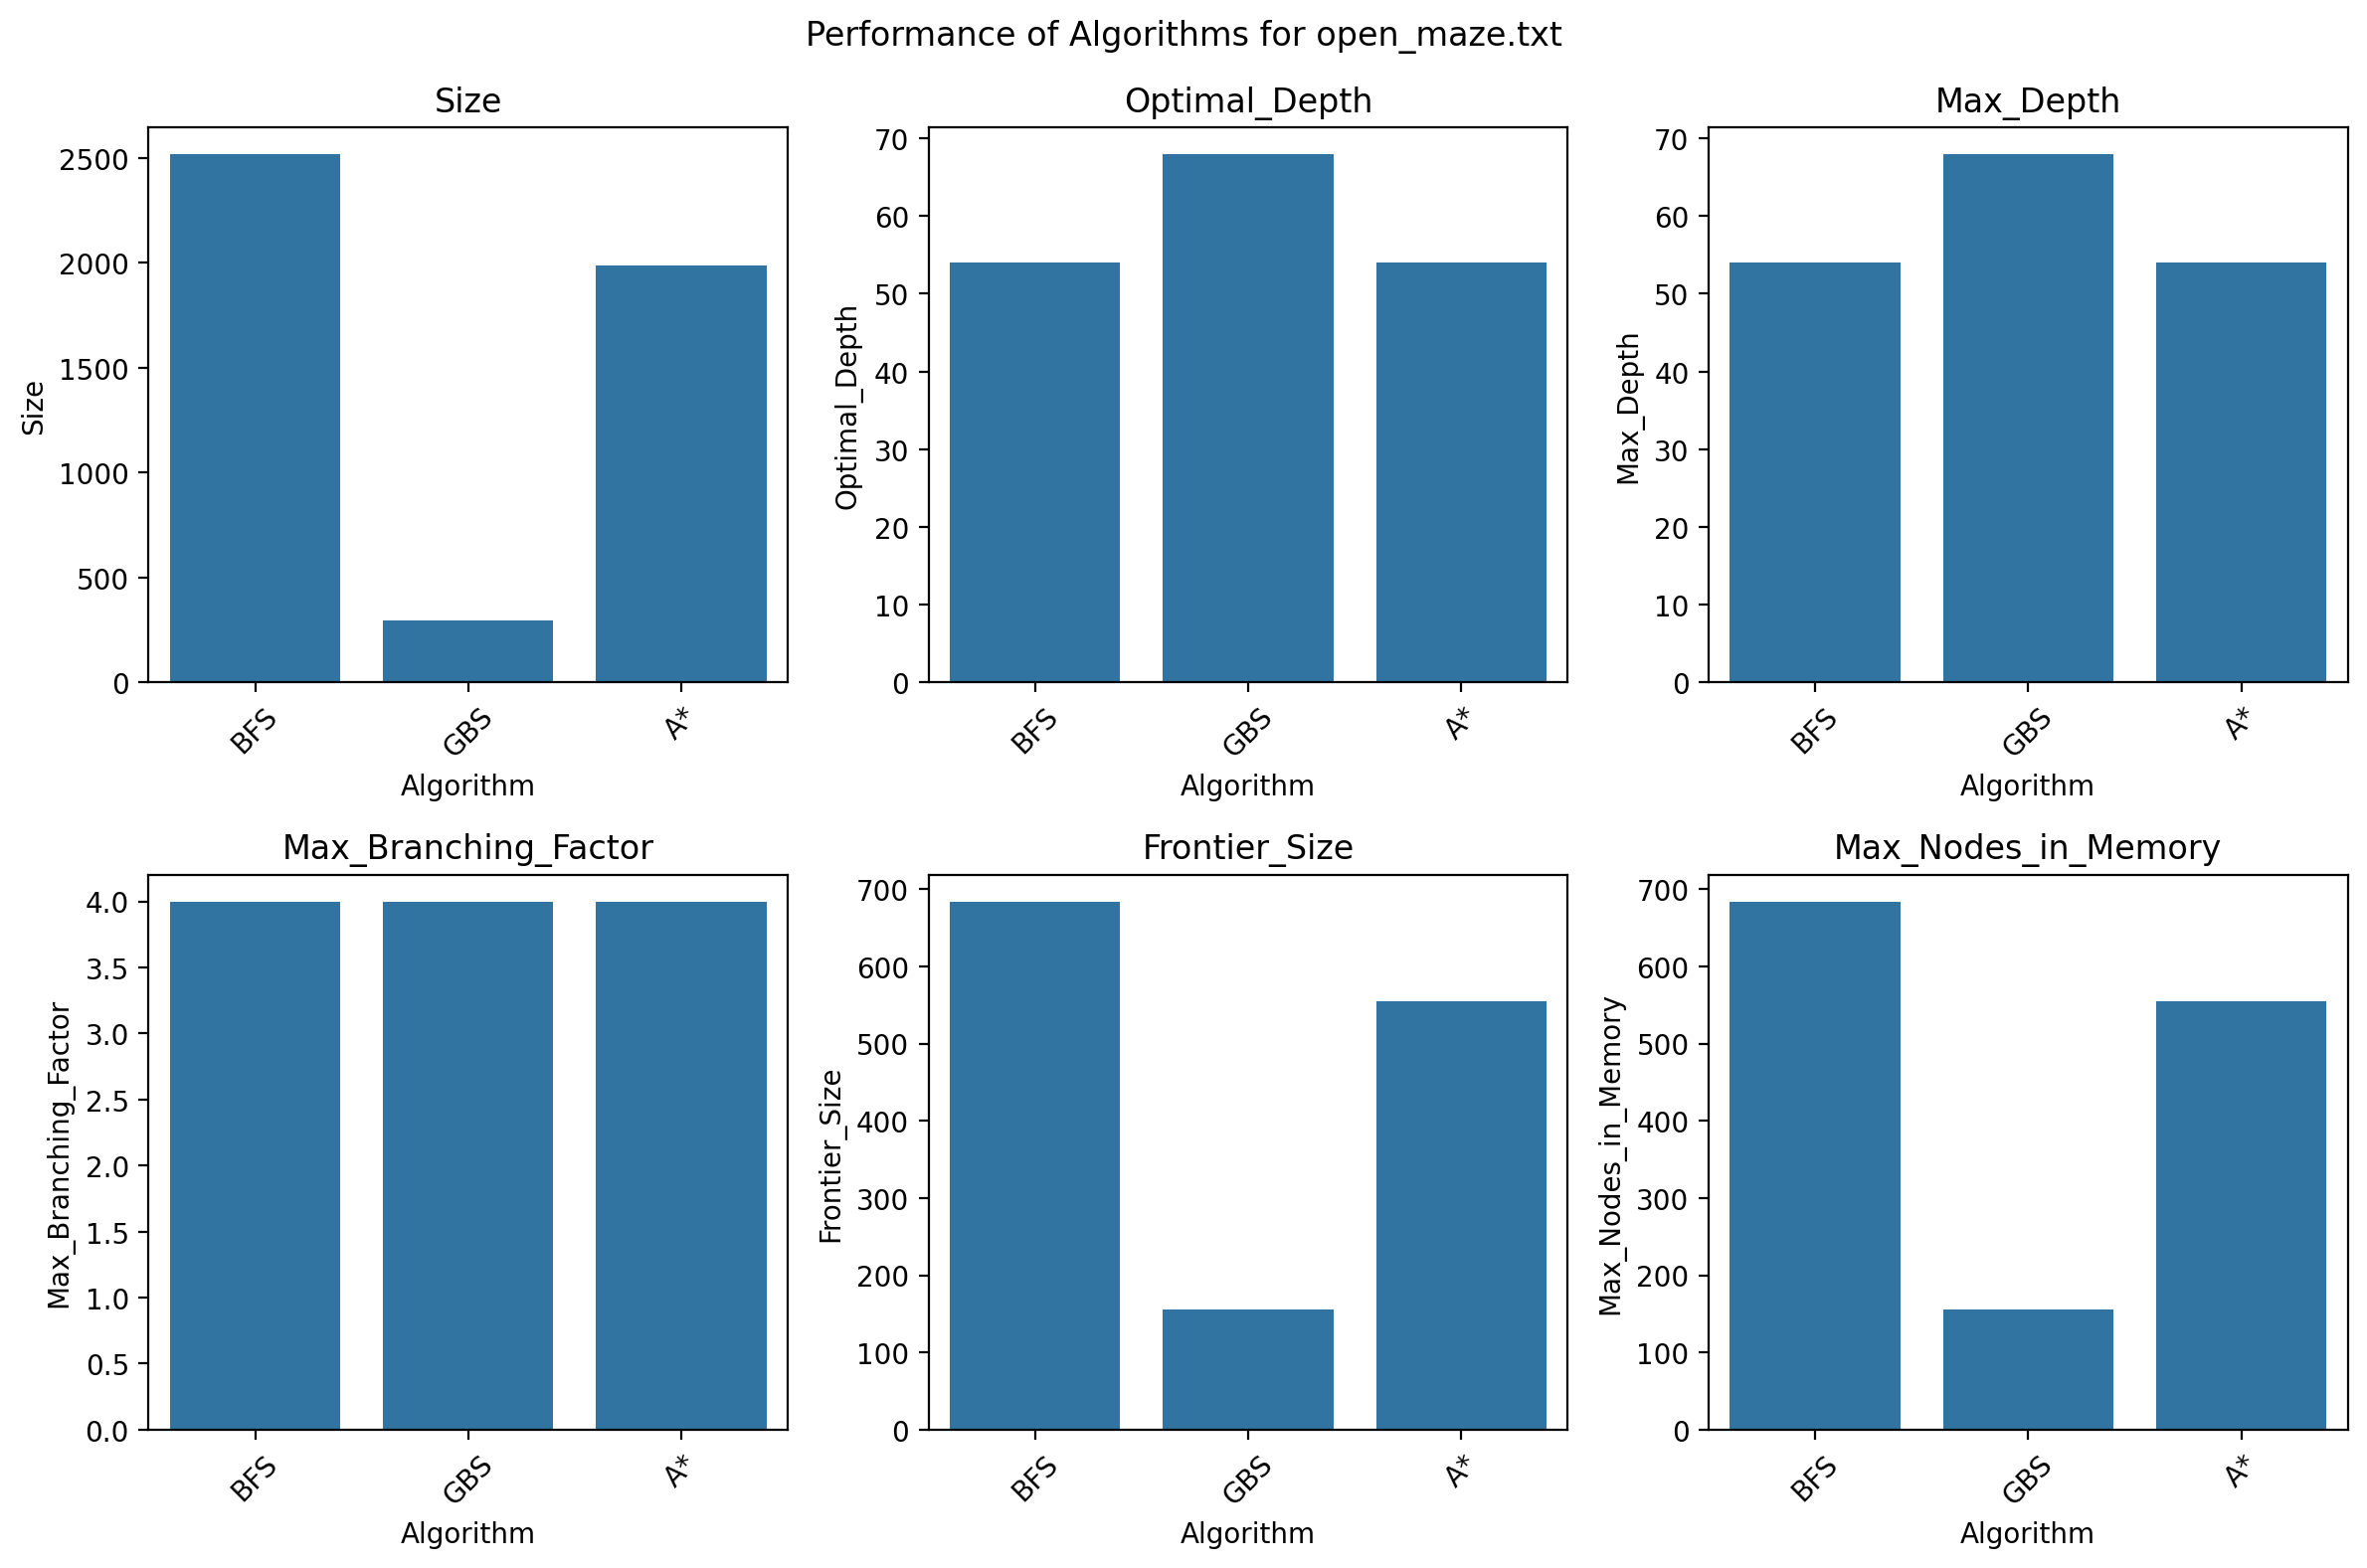

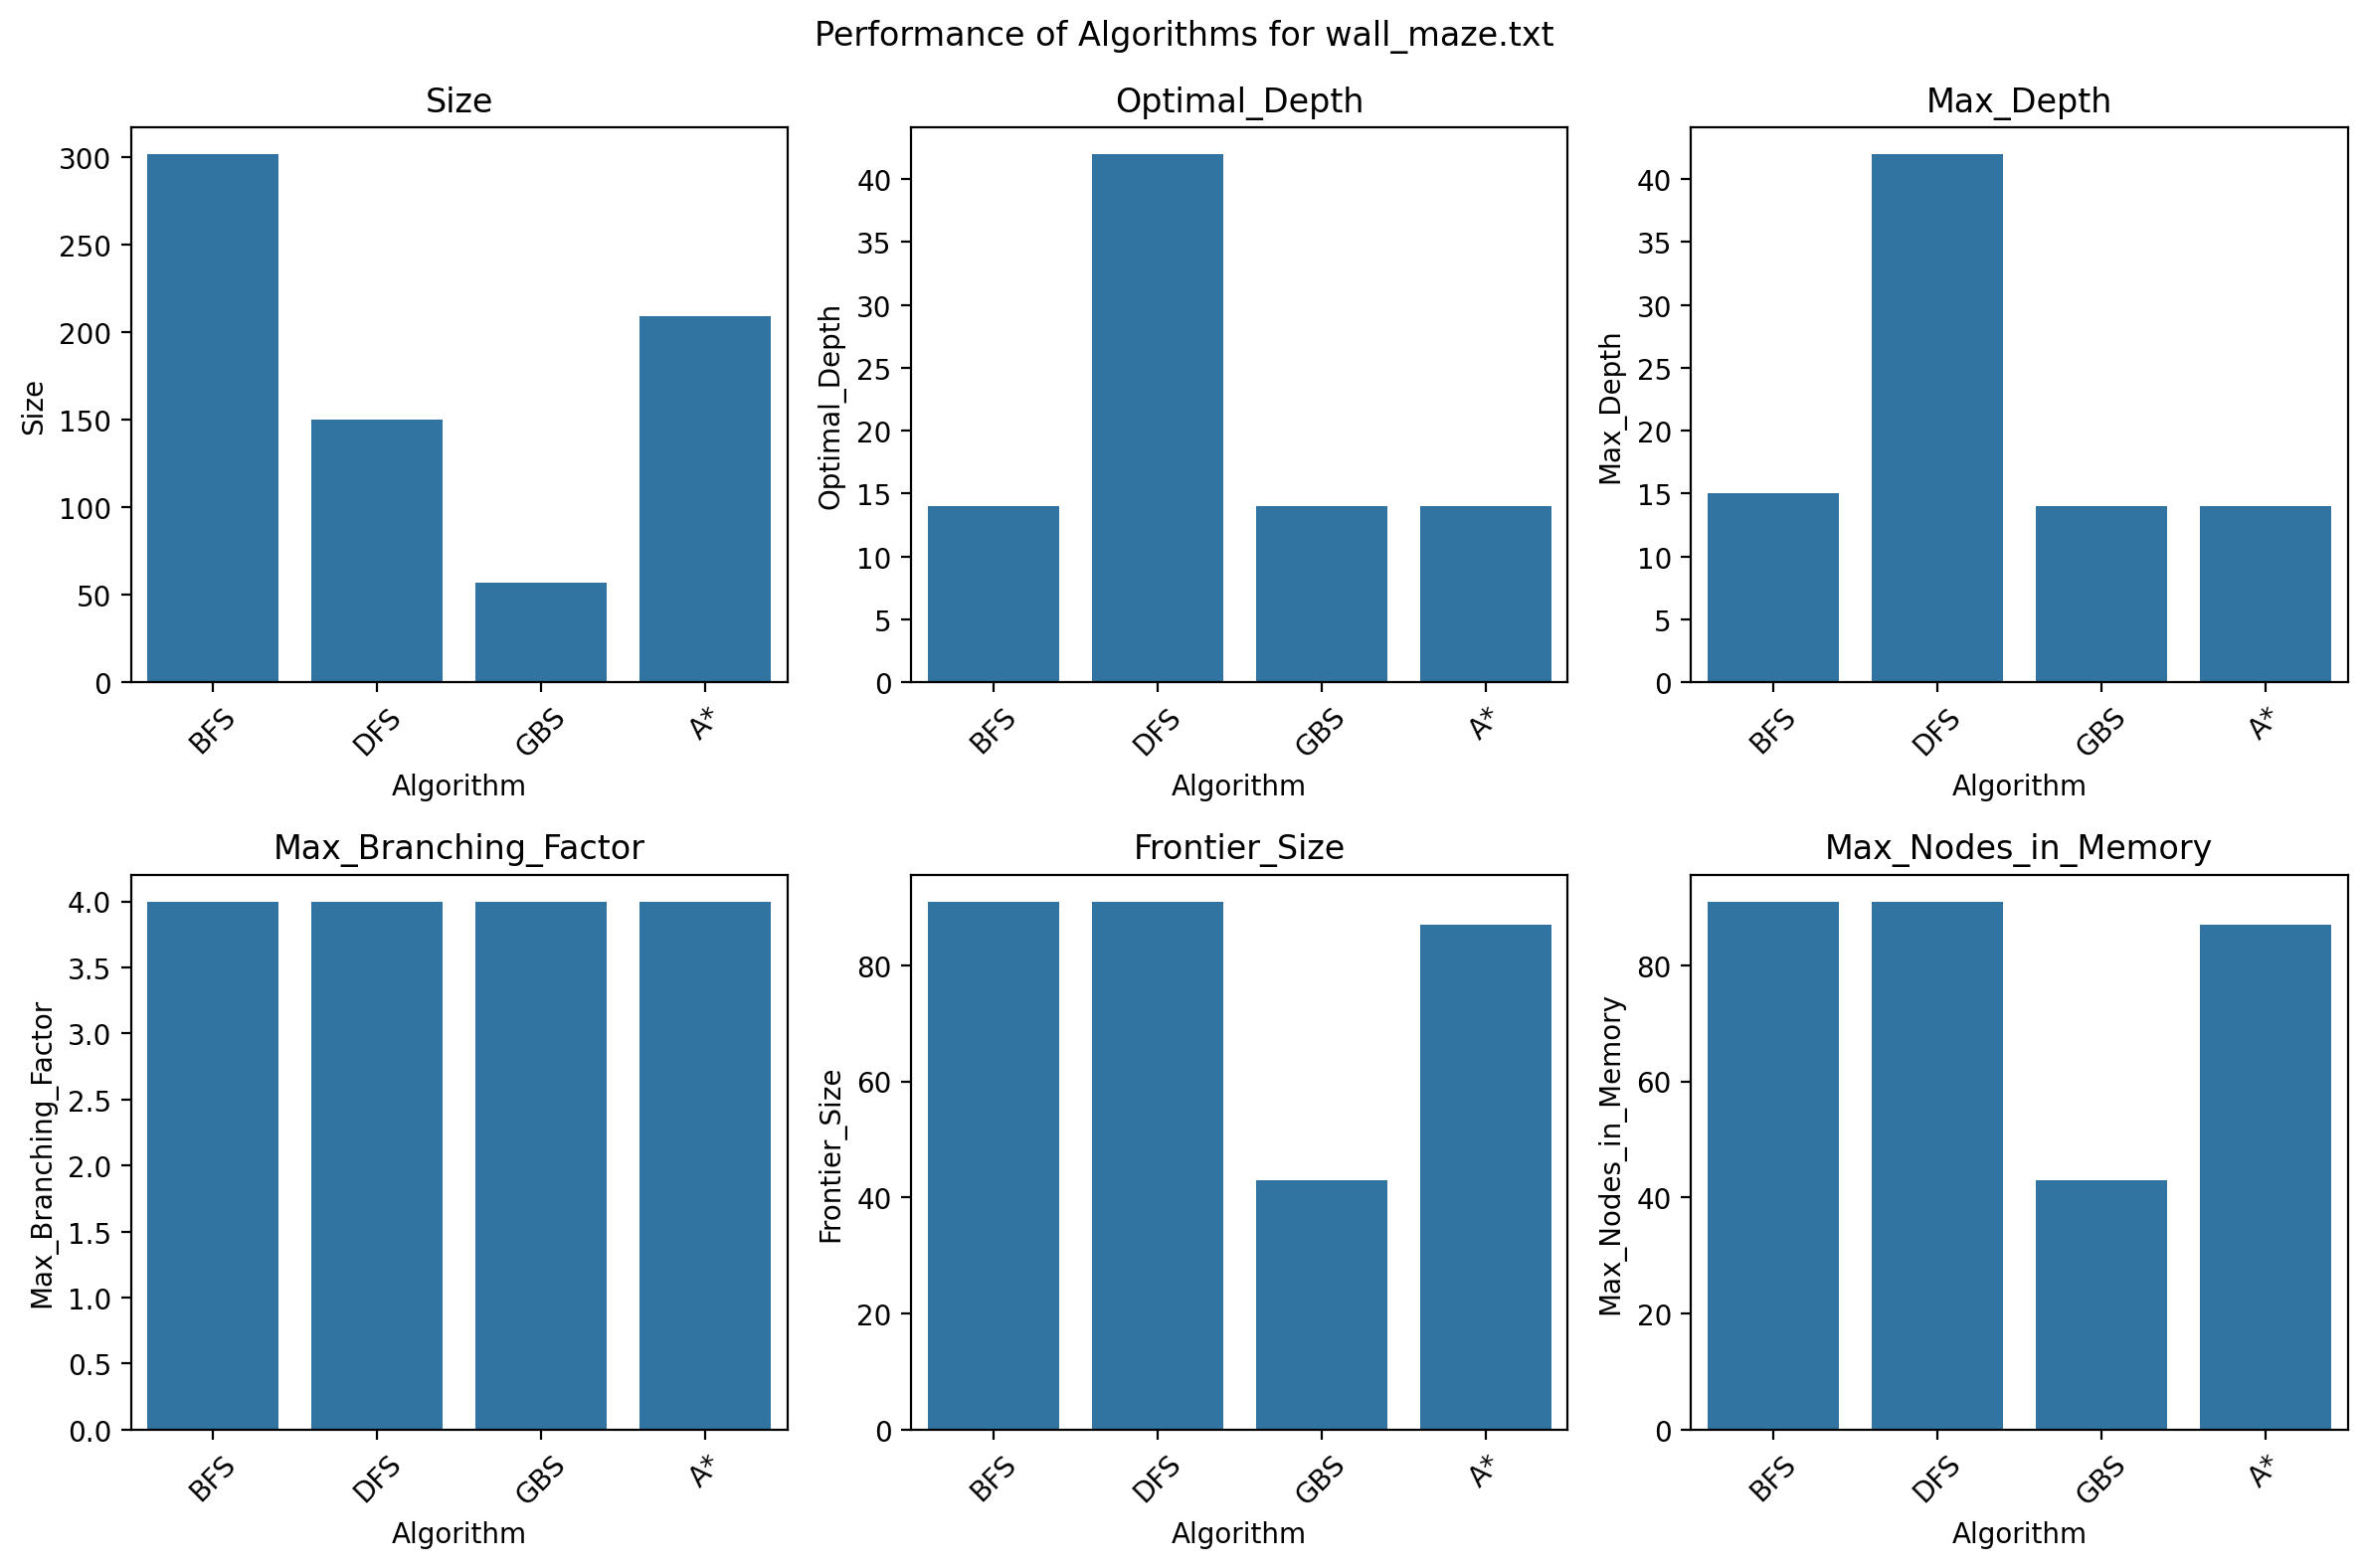

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

mazes = df_stats['Maze'].unique() #All unique maze files

factors = ['Size', 'Optimal_Depth', 'Max_Depth', 'Max_Branching_Factor', 'Frontier_Size', 'Max_Nodes_in_Memory'] #Evaluating Factors

#For each maze file, print visuals to comapare all the algorithm, parameter by parameter
for maze in mazes:
    maze_data = df_stats[df_stats['Maze'] == maze]

    if not maze_data.empty:
        plt.figure(figsize=(12, 8))
        plt.suptitle(f'Performance of Algorithms for {maze}')

        for i, factor in enumerate(factors, start=1):
            plt.subplot(2, 3, i)
            sns.barplot(x='Algorithm', y=factor, data=maze_data)
            plt.title(factor)
            plt.xticks(rotation=45)
            plt.tight_layout()

        plt.show()
    else:
        print(f"No data available for {maze}")


Discuss the most important lessons you have learned from implementing the different search strategies.

In this search exercise, we implemented BFS, DFS, GBS and A* search for various mazes. Various interesting observation were made during this process:

1. The path cost (optimal depth) of A* and BFS are almost the same with A* generally giving the results in much more faster and smaller in terms of number of nodes expanded, memory used and size of frontier. The heuristic used in A* propels this functionality to reduce the memory usage and number nodes visited to get the optimal path. On an average, A* outperforms other algorithms across parameters

2. In certain mazes, given the hueristic function is on point, GBS could even outperform A* and give the most optimal solution in terms of cost, space and time. However, it can also be far off from optimal solution.

3. DFS finds the right solution the fastest, but the node cost is not ideal in this case. It is far from the optimal path cost though. In terms of memory as there is no overhead of maintaining any pointers, it can outperform the others in certain cases though there is no sureity.

Thus, it can be concluded that given start and goal nodes are known, and it is possible to establish a solid heuristic function to reach the desired destination, A* must always be the preferred algorithm for implementation as it assures an optimal solution with optimal running time and memory usage.



## Advanced task: IDS and Multiple goals

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

1. Implement IDS (iterative deepening search using DFS)

2. Create a few mazes with multiple goals by adding one or two more goals to the medium size maze.
Solve the maze with your implementations for DFS, BFS, and IDS. Run experiments to show which implementations find the optimal solution and which do not. Discuss why that is the case.

In [106]:
# Your code/answer goes here
#IDS

def depth_limit_search(maze, root, goal, l, debug = False):
  frontier = [root]
  frontier_size = 1
  max_nodes_in_memory = 1

  n = 1
  d=0
  m=0
  b = 0

  while(frontier):
    node = frontier.pop() #Pop from end
    path = node.get_path_from_root()
    if path is not None and len(path) != len(set(path)):
      print('Cycle Detected!!')
      continue

    if reached_goal(node.pos, goal):
      d = node.cost
      return node.get_path_from_root(),n,d,m,b,frontier_size,max_nodes_in_memory

    if node.cost > l:
      continue #return None, n, d, m, b

    branches = len(valid_moves(node.pos, maze))
    b = max(b, branches)
    for child_pos, direction in valid_moves(node.pos, maze).items():
      n +=1
      if child_pos not in (i.pos for i in path):
        child = Node(child_pos, node, direction, node.cost + 1)
        frontier.append(child)

        m = max(m, child.cost)
        frontier_size +=1
        max_nodes_in_memory = max(max_nodes_in_memory, frontier_size)
        if node.pos != root.pos and node.pos != goal and child.pos != goal:
          maze[node.pos[0]][node.pos[1]] = "."
          maze[child.pos[0]][child.pos[1]] = "F"
          if debug: mh.show_maze(maze)

  #print("No Path Found")
  return None, n, d, m, b,frontier_size,max_nodes_in_memory



def iterative_deepening_search(maze, root, goal):
    depth_limit = 0
    while True:
        result, n, d, m, b, frontier_size,max_nodes_in_memory = depth_limit_search(maze, root, goal, depth_limit)
        if result is not None:
            return result, n, d, m, b, frontier_size,max_nodes_in_memory
        depth_limit += 1


small_maze.txt


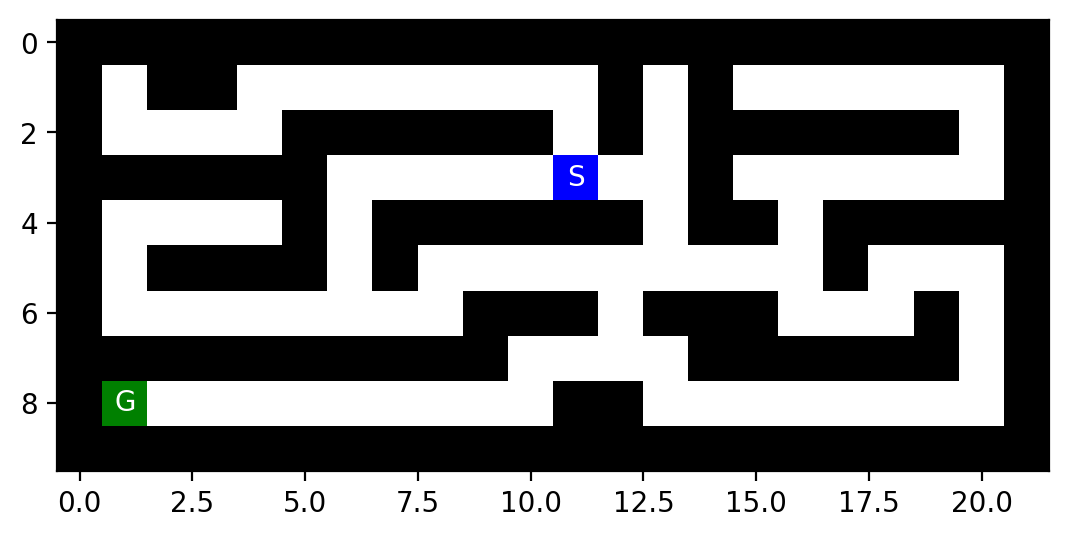

(3, 11)
(8, 1)
size: 158
optimal; depth: 19
max depth: 19
max bf: 3
Frontier Size 85
Max Nodes in Memory 85
Path found:


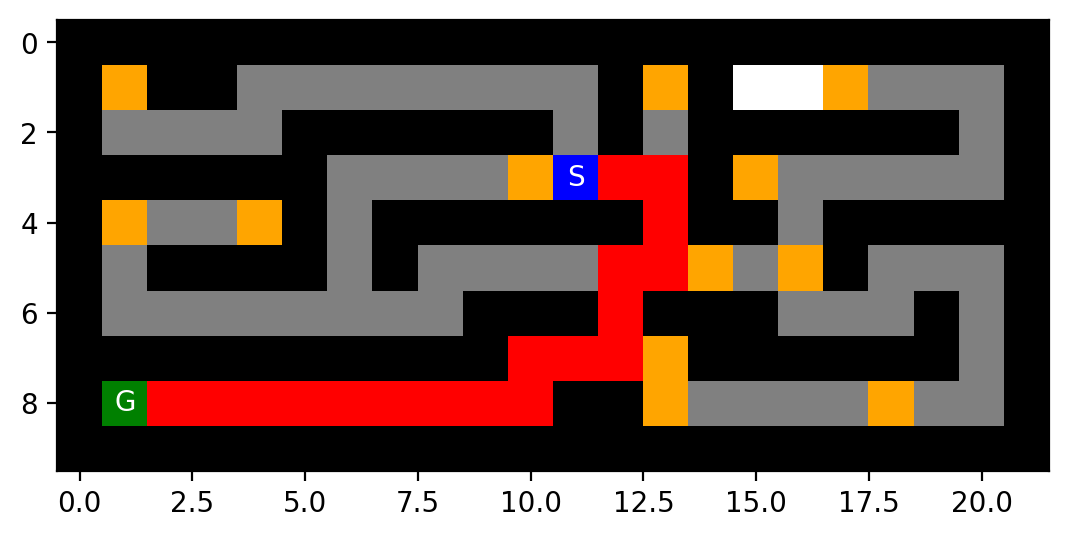

medium_maze.txt


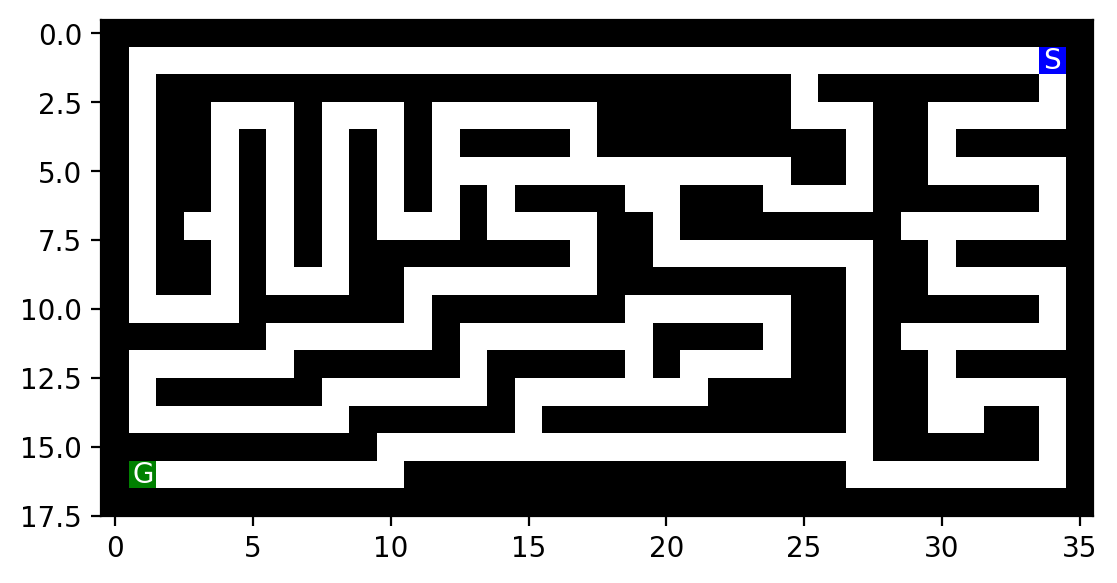

(1, 34)
(16, 1)
size: 1120
optimal; depth: 68
max depth: 68
max bf: 3
Frontier Size 566
Max Nodes in Memory 566
Path found:


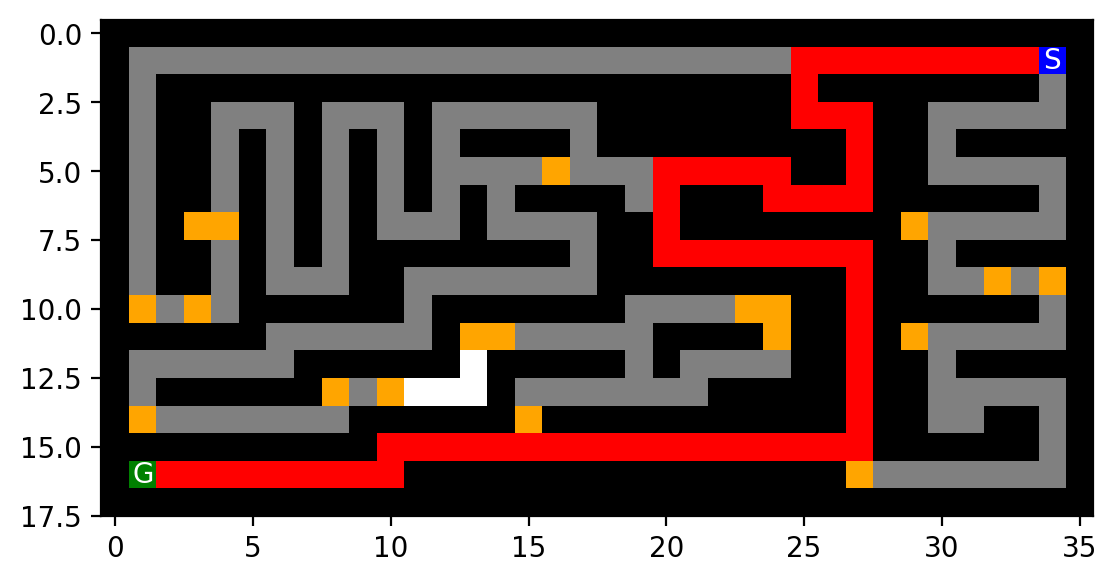

large_maze.txt


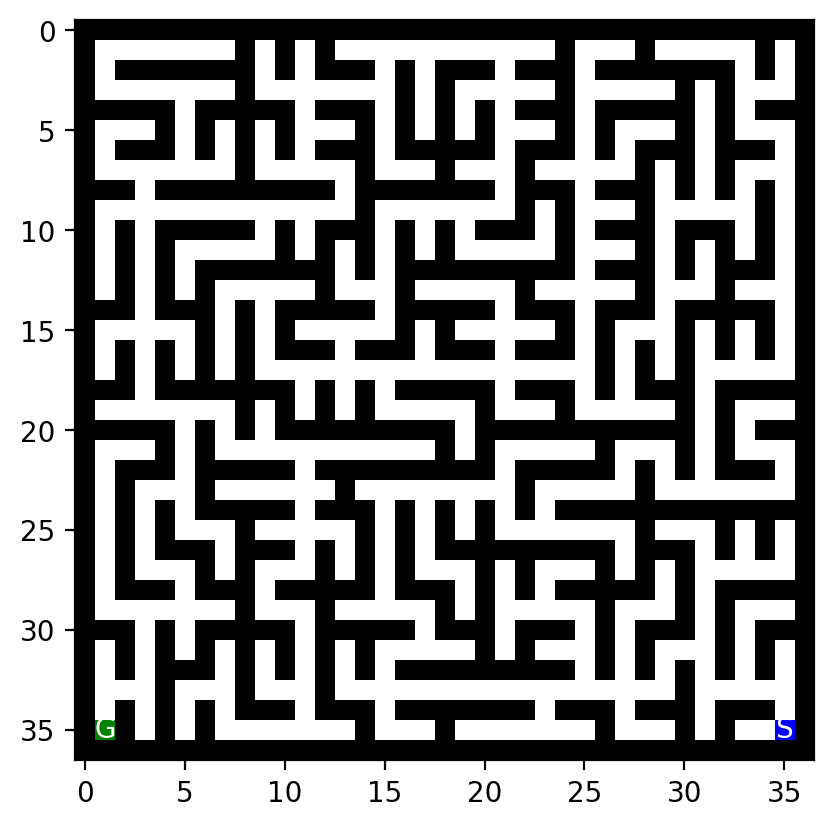

(35, 35)
(35, 1)
size: 836
optimal; depth: 210
max depth: 210
max bf: 4
Frontier Size 438
Max Nodes in Memory 438
Path found:


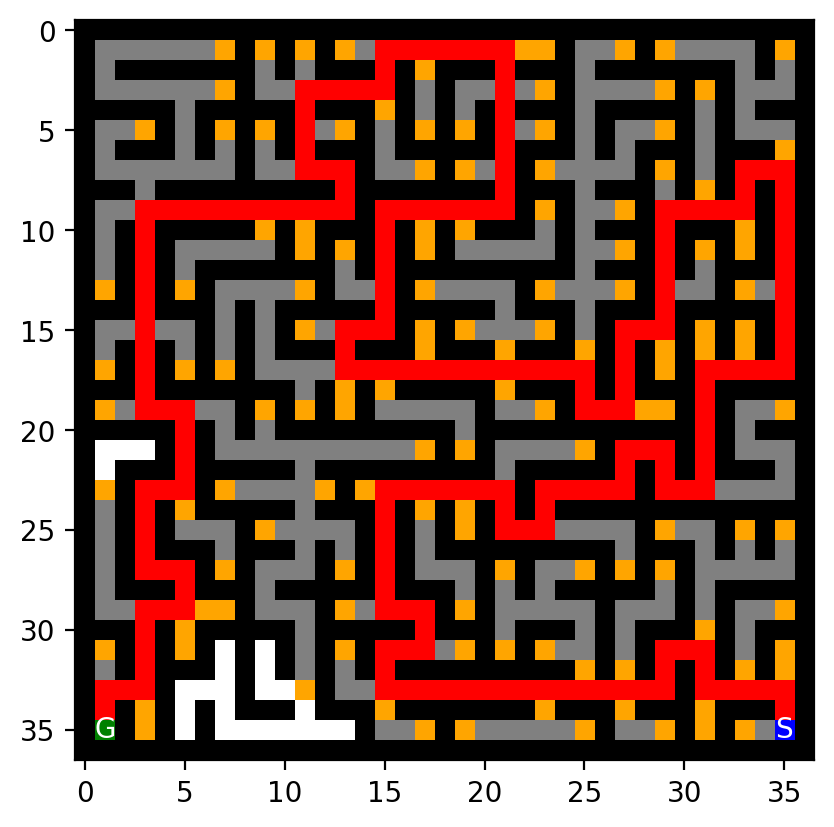

empty_maze.txt


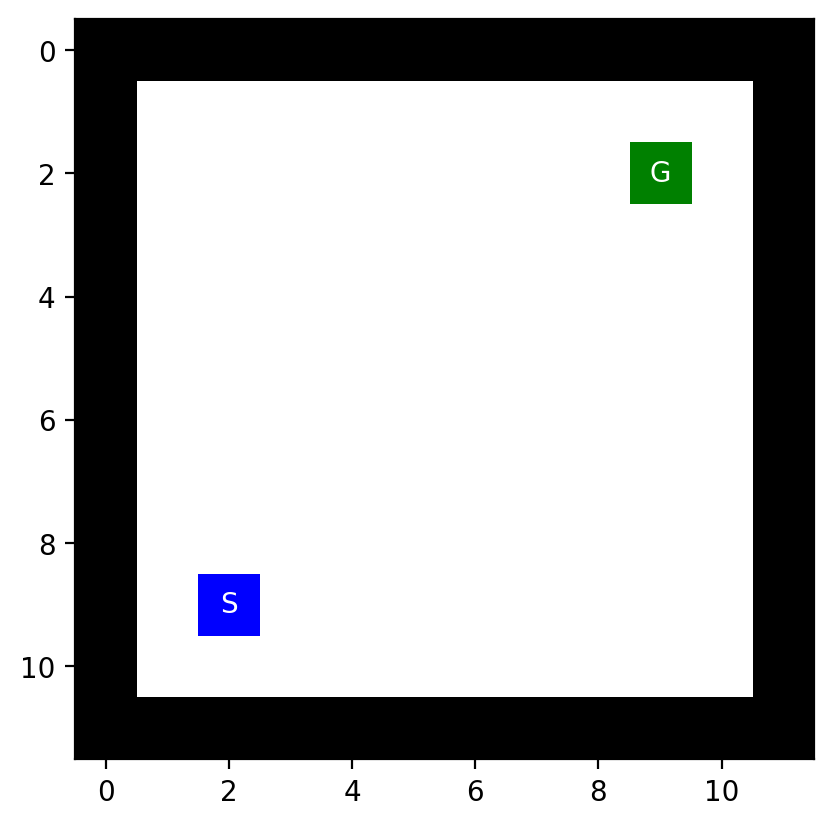

(9, 2)
(2, 9)
size: 137893
optimal; depth: 14
max depth: 14
max bf: 4
Frontier Size 90087
Max Nodes in Memory 90087
Path found:


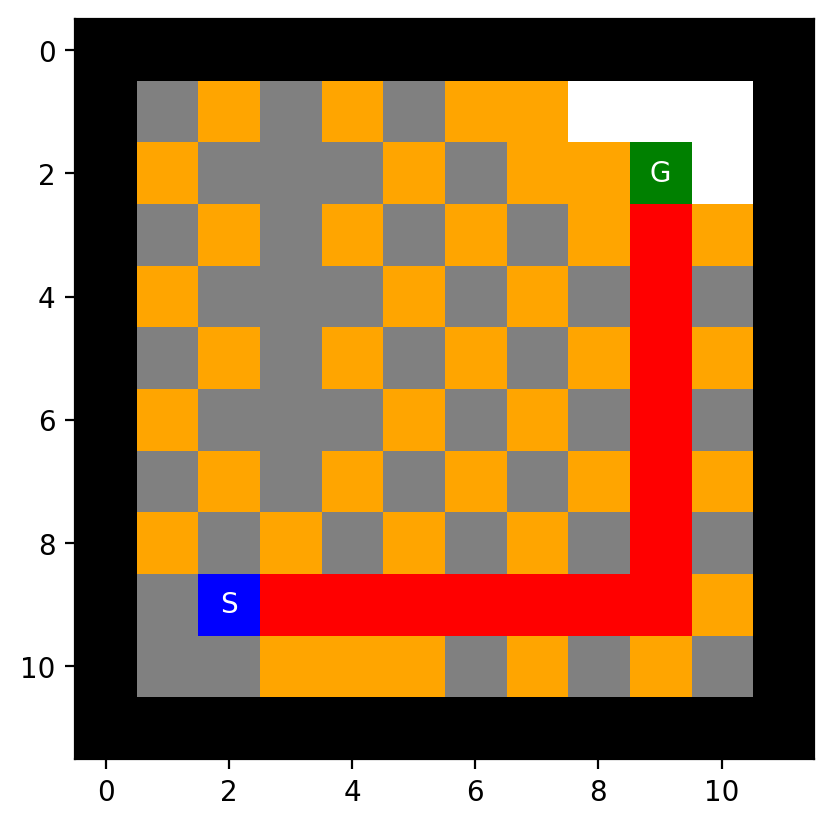

empty_2_maze.txt


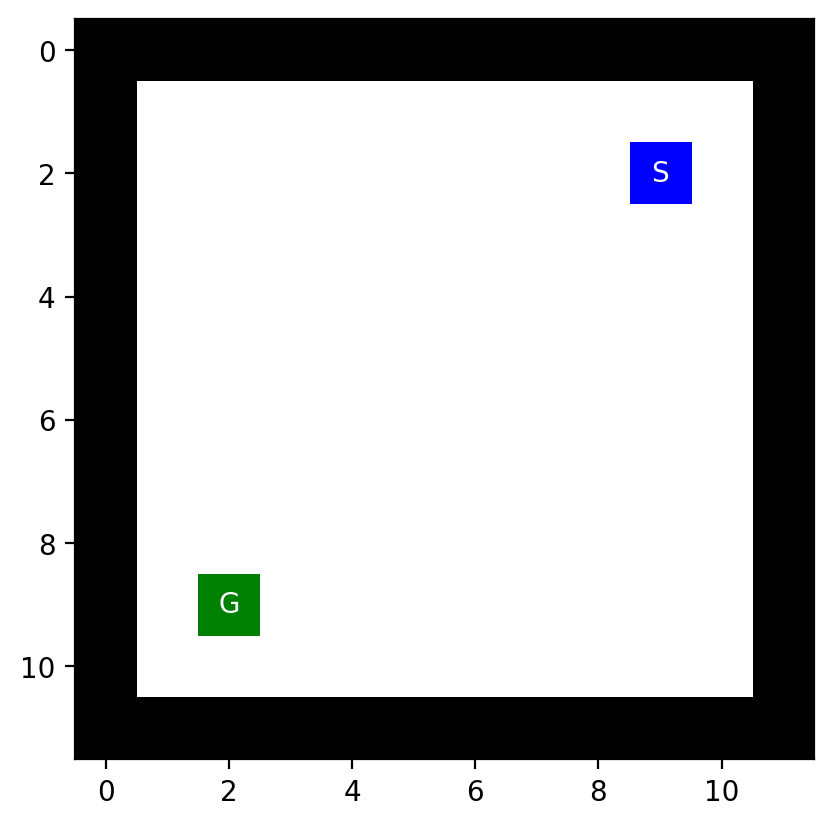

(2, 9)
(9, 2)
size: 823
optimal; depth: 14
max depth: 14
max bf: 4
Frontier Size 521
Max Nodes in Memory 521
Path found:


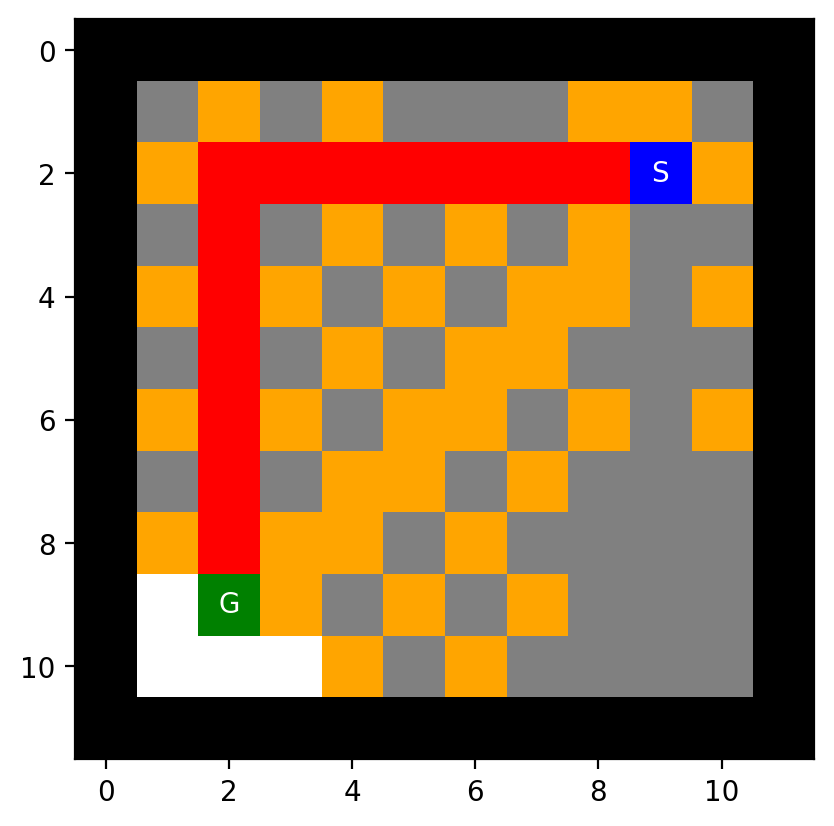

loops_maze.txt


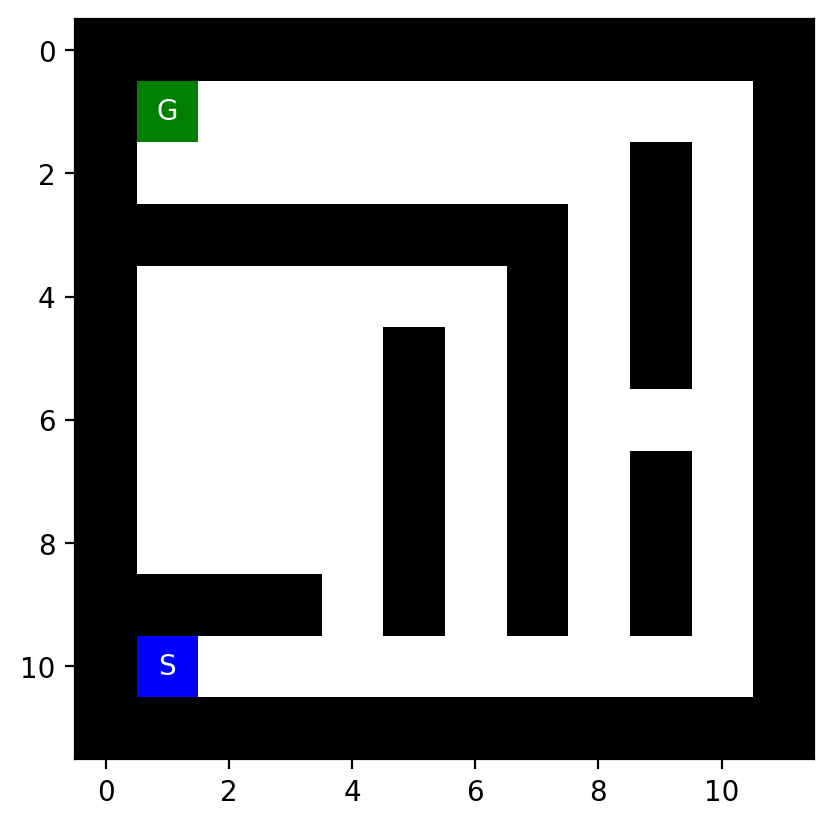

(10, 1)
(1, 1)
size: 206
optimal; depth: 23
max depth: 23
max bf: 3
Frontier Size 119
Max Nodes in Memory 119
Path found:


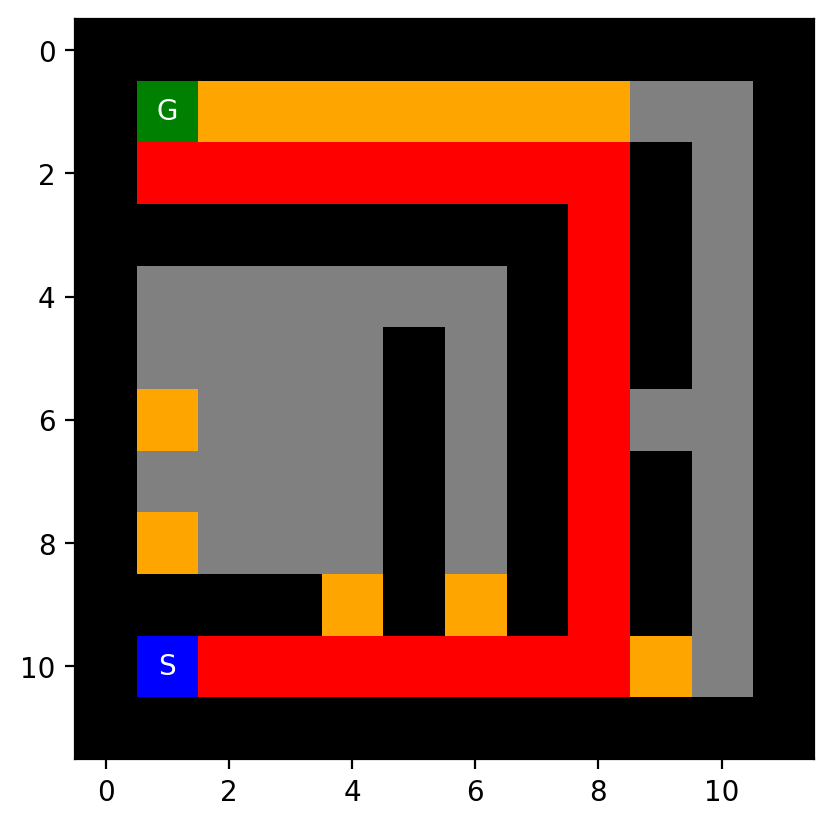

wall_maze.txt


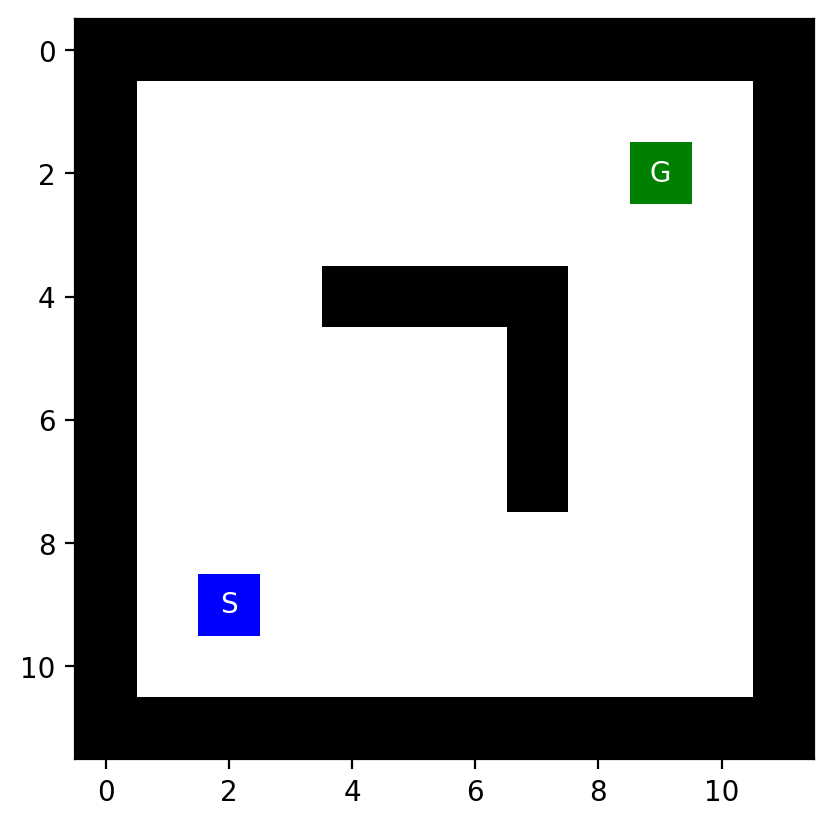

(9, 2)
(2, 9)
size: 77386
optimal; depth: 14
max depth: 14
max bf: 4
Frontier Size 46966
Max Nodes in Memory 46966
Path found:


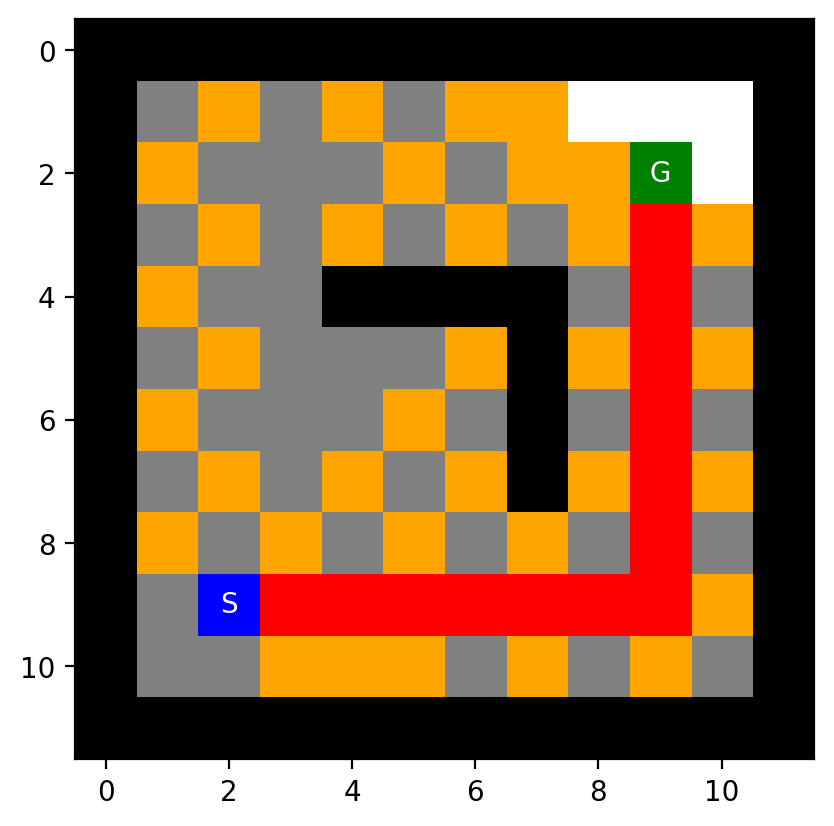

In [107]:
mazeSizes = ["small_maze.txt","medium_maze.txt","large_maze.txt","empty_maze.txt","empty_2_maze.txt","loops_maze.txt","wall_maze.txt"] #"open_maze.txt"
for mazes in mazeSizes:
    print(mazes)
    with open(mazes, "r") as f:
        maze_str = f.read()
    maze = mh.parse_maze(maze_str)
    mh.show_maze(maze)
    start = mh.find_pos(maze, what="S")
    goal = mh.find_pos(maze, what="G")
    print(start)
    print(goal)
    root = Node(start, None, None, 0)
    path,n, d, m, b, frontier_size, max_nodes_in_memory = iterative_deepening_search(maze, root, goal)
    print('size:',n)
    print('optimal; depth:',d)
    print('max depth:',m)
    print('max bf:',b)
    print('Frontier Size', frontier_size)
    print('Max Nodes in Memory', max_nodes_in_memory)
    if path:
      df_stats = df_stats.append({'Algorithm': 'IDS',
              'Maze': mazes,
              'Size': n,
              'Optimal_Depth': d,
              'Max_Depth': m,
              'Max_Branching_Factor': b,
              'Frontier_Size': frontier_size,
              'Max_Nodes_in_Memory':max_nodes_in_memory}, ignore_index=True)
      print("Path found:")
      for node in path:
        if(node.pos !=start and node.pos!=goal):
          maze[node.pos[0]][node.pos[1]] = "P"
    else:
        print("No path found")
    mh.show_maze(maze)

In [108]:
df_compare = pd.DataFrame(columns=['Algorithm', 'Maze','Optimal_Depth']) # Store all the stats to a data frame for comparison

medium_maze_2.txt


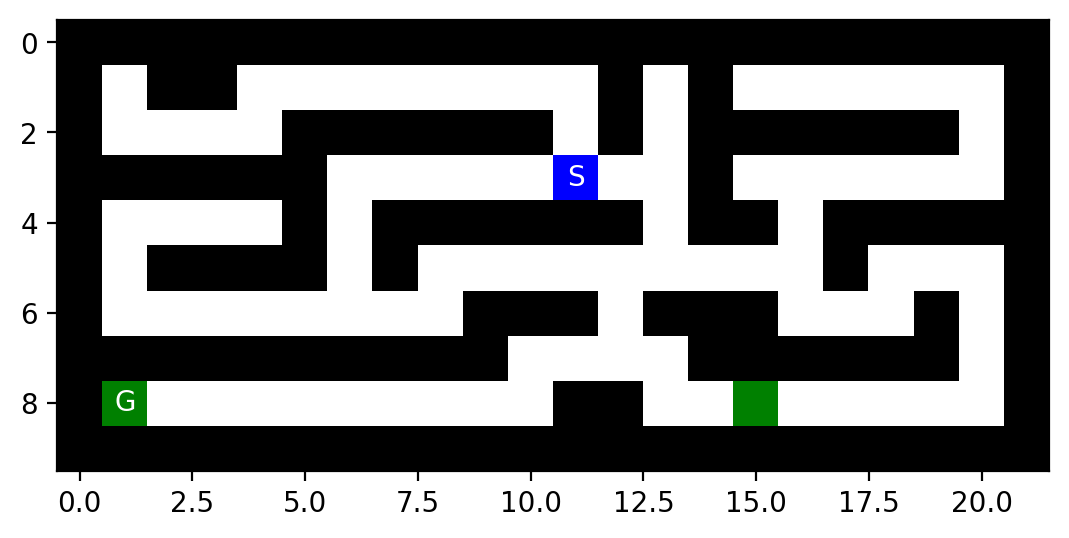

Start: (3, 11)
Goals: [(8, 1), (8, 15)]
For Goal: (8, 1)
size: 158
optimal depth: 19
max depth: 19
max bf: 3
Frontier Size: 85
Max Nodes in Memory: 85
For Goal: (8, 15)
size: 72
optimal depth: 11
max depth: 11
max bf: 3
Frontier Size: 40
Max Nodes in Memory: 40
Path found:
Optimal Path cost is:  11


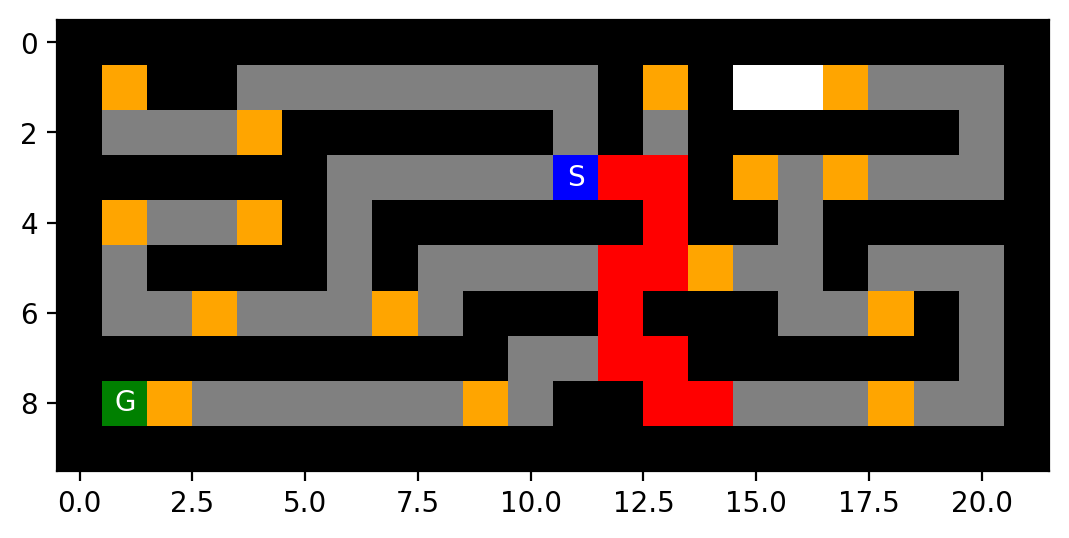

medium_maze_3.txt


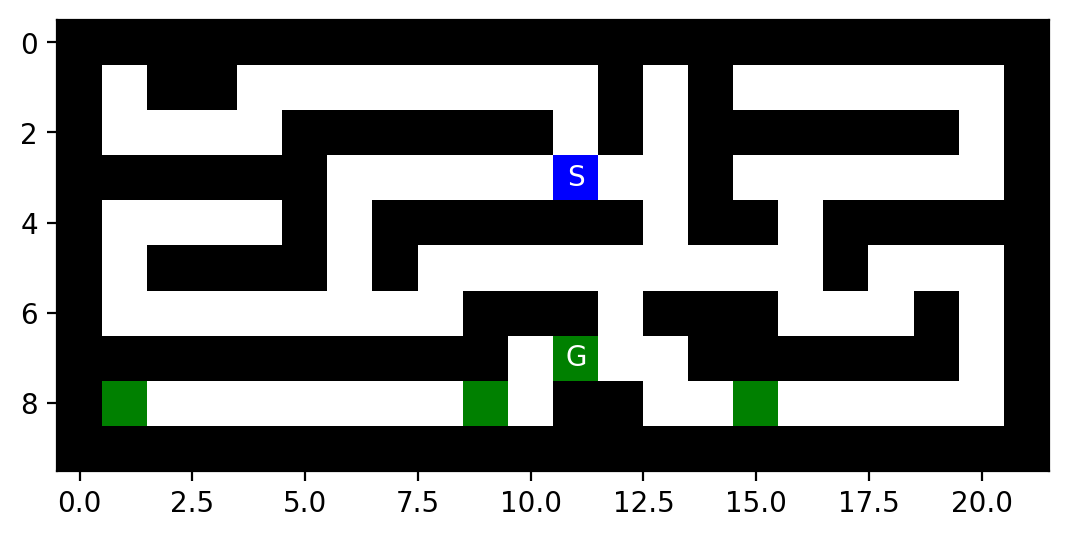

Start: (3, 11)
Goals: [(7, 11), (8, 1), (8, 9), (8, 15)]
For Goal: (7, 11)
size: 43
optimal depth: 8
max depth: 8
max bf: 3
Frontier Size: 25
Max Nodes in Memory: 25
For Goal: (8, 1)
size: 158
optimal depth: 19
max depth: 19
max bf: 3
Frontier Size: 85
Max Nodes in Memory: 85
For Goal: (8, 9)
size: 66
optimal depth: 11
max depth: 11
max bf: 3
Frontier Size: 37
Max Nodes in Memory: 37
For Goal: (8, 15)
size: 72
optimal depth: 11
max depth: 11
max bf: 3
Frontier Size: 40
Max Nodes in Memory: 40
Path found:
Optimal Path cost is:  8


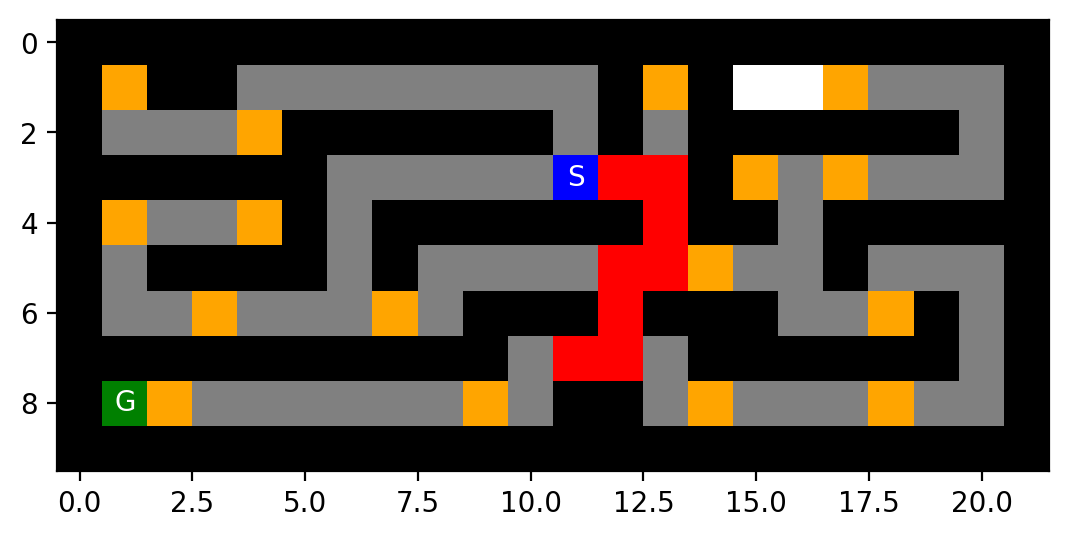

In [109]:
#IDS
mazeSizes = ["medium_maze_2.txt", "medium_maze_3.txt"]

for mazes in mazeSizes:
    print(mazes)
    with open(mazes, "r") as f:
        maze_str = f.read()
    maze = mh.parse_maze(maze_str)
    mh.show_maze(maze)
    start = mh.find_pos(maze, what="S")

    goals = []
    for i in range(len(maze)):
        for j in range(len(maze[i])):
            if maze[i][j] == 'G':
                goals.append((i, j))

    print("Start:", start)
    print("Goals:", goals)

    min_path = None
    min_depth = float('inf')

    for goal in goals:
        root = Node(start, None, None, 0)
        path, n, d, m, b, frontier_size, max_nodes_in_memory = iterative_deepening_search(maze, root, goal)
        print('For Goal:', goal)
        print('size:', n)
        print('optimal depth:', d)
        print('max depth:', m)
        print('max bf:', b)
        print('Frontier Size:', frontier_size)
        print('Max Nodes in Memory:', max_nodes_in_memory)

        if path and d < min_depth:
            min_depth = d
            min_path = path

    if min_path:
        print("Path found:")
        print('Optimal Path cost is: ', min_depth)
        df_compare = df_compare.append({'Algorithm': 'IDS',
              'Maze': mazes,
              'Optimal_Depth': min_depth }, ignore_index=True)
        for node in min_path:
            if node.pos != start and node.pos != goal:
                maze[node.pos[0]][node.pos[1]] = "P"
    else:
        print("No path found")

    mh.show_maze(maze)


medium_maze_2.txt


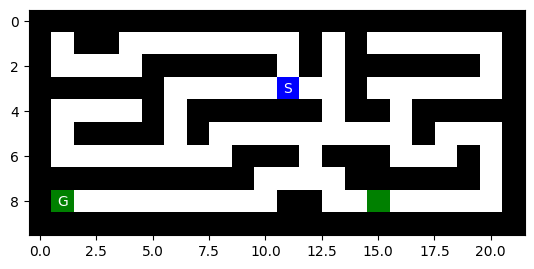

Start: (3, 11)
Goals: [(8, 1), (8, 15)]
For Goal: (8, 1)
size: 151
optimal depth: 49
max depth: 49
max bf: 3
Frontier Size: 79
Max Nodes in Memory: 79
For Goal: (8, 15)
size: 118
optimal depth: 33
max depth: 33
max bf: 3
Frontier Size: 62
Max Nodes in Memory: 62
Path found:
Optimal Path cost is:  33


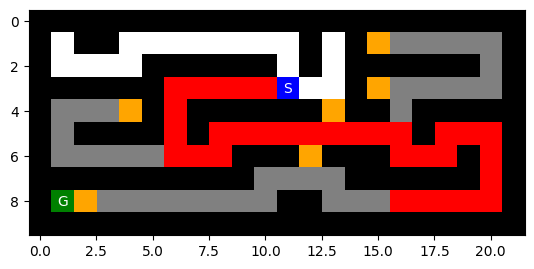

medium_maze_3.txt


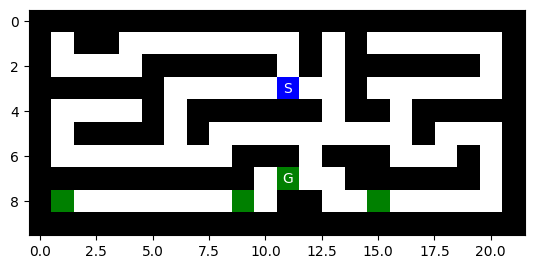

Start: (3, 11)
Goals: [(7, 11), (8, 1), (8, 9), (8, 15)]
For Goal: (7, 11)
size: 129
optimal depth: 38
max depth: 38
max bf: 3
Frontier Size: 68
Max Nodes in Memory: 68
For Goal: (8, 1)
size: 151
optimal depth: 49
max depth: 49
max bf: 3
Frontier Size: 79
Max Nodes in Memory: 79
For Goal: (8, 9)
size: 135
optimal depth: 41
max depth: 41
max bf: 3
Frontier Size: 71
Max Nodes in Memory: 71
For Goal: (8, 15)
size: 118
optimal depth: 33
max depth: 33
max bf: 3
Frontier Size: 62
Max Nodes in Memory: 62
Path found:
Optimal Path cost is:  33


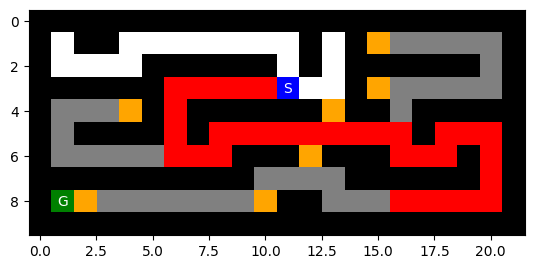

In [ ]:
#DFS
mazeSizes = ["medium_maze_2.txt", "medium_maze_3.txt"]

for mazes in mazeSizes:
    print(mazes)
    with open(mazes, "r") as f:
        maze_str = f.read()
    maze = mh.parse_maze(maze_str)
    mh.show_maze(maze)
    start = mh.find_pos(maze, what="S")

    goals = []
    for i in range(len(maze)):
        for j in range(len(maze[i])):
            if maze[i][j] == 'G':
                goals.append((i, j))

    print("Start:", start)
    print("Goals:", goals)

    min_path = None
    min_depth = float('inf')

    for goal in goals:
        root = Node(start, None, None, 0)
        path,n,d,m,b, frontier_size,max_nodes_in_memory = depth_first_search(maze, root, goal, 100000)
        print('For Goal:', goal)
        print('size:', n)
        print('optimal depth:', d)
        print('max depth:', m)
        print('max bf:', b)
        print('Frontier Size:', frontier_size)
        print('Max Nodes in Memory:', max_nodes_in_memory)

        if path and d < min_depth:
            min_depth = d
            min_path = path

    if min_path:
        print("Path found:")
        print('Optimal Path cost is: ', min_depth)
        df_compare = df_compare.append({'Algorithm': 'DFS',
              'Maze': mazes,
              'Optimal_Depth': min_depth }, ignore_index=True)
        for node in min_path:
            if node.pos != start and node.pos != goal:
                maze[node.pos[0]][node.pos[1]] = "P"
    else:
        print("No path found")

    mh.show_maze(maze)


medium_maze_2.txt


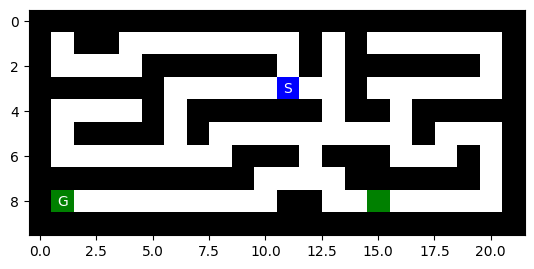

Start: (3, 11)
Goals: [(8, 1), (8, 15)]
For Goal: (8, 1)
size: 189
optimal depth: 19
max depth: 20
max bf: 3
Frontier Size: 94
Max Nodes in Memory: 94
For Goal: (8, 15)
size: 117
optimal depth: 11
max depth: 12
max bf: 3
Frontier Size: 61
Max Nodes in Memory: 61
Path found:
Optimal Path cost is:  11


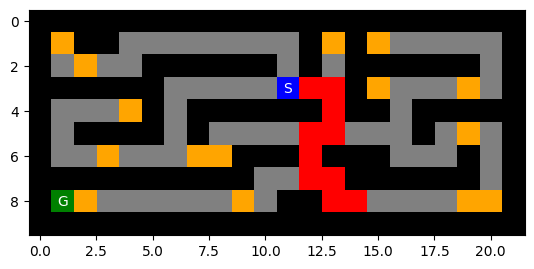

medium_maze_3.txt


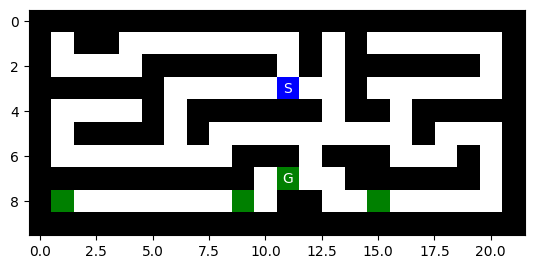

Start: (3, 11)
Goals: [(7, 11), (8, 1), (8, 9), (8, 15)]
For Goal: (7, 11)
size: 72
optimal depth: 8
max depth: 9
max bf: 3
Frontier Size: 40
Max Nodes in Memory: 40
For Goal: (8, 1)
size: 189
optimal depth: 19
max depth: 20
max bf: 3
Frontier Size: 94
Max Nodes in Memory: 94
For Goal: (8, 9)
size: 119
optimal depth: 11
max depth: 12
max bf: 3
Frontier Size: 62
Max Nodes in Memory: 62
For Goal: (8, 15)
size: 117
optimal depth: 11
max depth: 12
max bf: 3
Frontier Size: 61
Max Nodes in Memory: 61
Path found:
Optimal Path cost is:  8


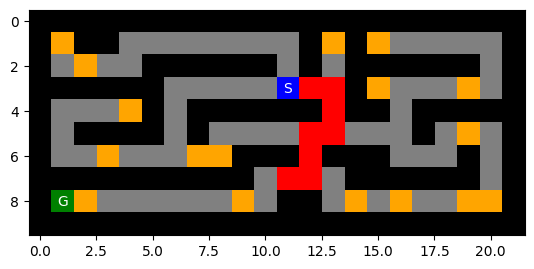

In [ ]:
#BFS
mazeSizes = ["medium_maze_2.txt", "medium_maze_3.txt"]

for mazes in mazeSizes:
    print(mazes)
    with open(mazes, "r") as f:
        maze_str = f.read()
    maze = mh.parse_maze(maze_str)
    mh.show_maze(maze)
    start = mh.find_pos(maze, what="S")

    goals = []
    for i in range(len(maze)):
        for j in range(len(maze[i])):
            if maze[i][j] == 'G':
                goals.append((i, j))

    print("Start:", start)
    print("Goals:", goals)

    min_path = None
    min_depth = float('inf')

    for goal in goals:
        root = Node(start, None, None, 0)
        path,n, d, m, b, frontier_size, max_nodes_in_memory = breadth_first_search(maze, root, goal)
        print('For Goal:', goal)
        print('size:', n)
        print('optimal depth:', d)
        print('max depth:', m)
        print('max bf:', b)
        print('Frontier Size:', frontier_size)
        print('Max Nodes in Memory:', max_nodes_in_memory)

        if path and d < min_depth:
            min_depth = d
            min_path = path

    if min_path:
        print("Path found:")
        print('Optimal Path cost is: ', min_depth)
        df_compare = df_compare.append({'Algorithm': 'BFS',
              'Maze': mazes,
              'Optimal_Depth': min_depth }, ignore_index=True)
        for node in min_path:
            if node.pos != start and node.pos != goal:
                maze[node.pos[0]][node.pos[1]] = "P"
    else:
        print("No path found")

    mh.show_maze(maze)


In [ ]:
df_compare

,Algorithm,Maze,Optimal_Depth
0,IDS,medium_maze_2.txt,11
1,IDS,medium_maze_3.txt,8
2,DFS,medium_maze_2.txt,33
3,DFS,medium_maze_3.txt,33
4,BFS,medium_maze_2.txt,11
5,BFS,medium_maze_3.txt,8


All the three algorithm; BFS, DFS and IDS run on the mazes with multiple goals.

medium_maze_2.txt - 2 Goals states

medium_maze_3.txt = 4 Goal States

When compared on these 2 multi-goal mazes, both IDS and BFS were giving the optimal solution for the maze. DFS far off from off from the finding the closest goal. DFS by its nature, would expand depth wise irrespective of a goal nearby. Thus, it tends to reach the goal node further off then the closer goal node. However, both BFS and IDS (DFS at each depth level) successfully chose the nearest goal state and gave the optimal path as expected

## More advanced tasks to think about

Instead of defining each square as a state, use only intersections as states. Now the storage requirement is reduced, but the path length between two intersections can be different. If we use total path length measured as the number of squares as path cost, how can we make sure that BFS and iterative deepening search is optimal? Change the code to do so.

In [ ]:
# Your code/answer goes here

Modify your A* search to add weights (see text book) and explore how different weights influence the result.

In [ ]:
# Your code/answer goes here

What happens if the agent does not know the layout of the maze in advance (i.e., faces an unkown, only partially observable environment)? How does the environment look then (PEAS description)? How would you implement a rational agent to solve the maze? What if the agent still has a GPS device to tell the distance to the goal?

In [ ]:
# Your code/answer goes here

In [120]:
from google.colab import drive

!jupyter nbconvert --to html /content/drive/MyDrive/Colab\ Notebooks/FinalMaze  .ipynb


[NbConvertApp] WARNING | pattern '.ipynb' matched no files
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/FinalMaze.ipynb to html
[NbConvertApp] Writing 4419010 bytes to /content/drive/MyDrive/Colab Notebooks/FinalMaze.html
